In [1]:
# State the parameters of the pipeline

disk = '/mnt/pre_epi_seizures/'
baseline_files = 'h5_files/processing_datasets/baseline_datasets_new'
seizure_files = 'h5_files/processing_datasets/seizure_datasets_new'


# Exploratory Data Analysis
from classification.load_for_class import *
import convertpandas as cv_pd
import pandas as pd
import sklearn.preprocessing as pp
from sklearn.kernel_approximation import RBFSampler
from interim_processing import *
import iopes

# Set parameters of analyssis
feature_slot = 'hrv_time_features'

# Chose hyper-parameters of acquisition (ix of saved files)
hyper_param = 0


patient_list = [5]
lead_list = ['ECG-']
scaler = pp.StandardScaler()
rbf_feature = RBFSampler(gamma=1, random_state=1)
interim_processing = [scaler]
hist_bins = None
dist = None
flag_hist = True
flag_andrews = True
flag_series = True
flag_box = True
flag_pair = True
assign_baseline = 'assign_equal_baseline_seizure'
label_struct = {
                        'inter_ictal':{
                            'label': 'Inter-Ictal Data Points',
                            'color': 'blue',
                            'intervals_samples': [(1000 * 0 * 60, 1000 * 0 * 60 )]
                                     },
                        'pre_ictal':{
                            'label': 'Pre-Ictal data points',
                            'color': 'yellow',
                            'intervals_samples': [(1000 * 20 * 60, 1000 * 49 * 60 )]
                                     },
                        'ictal':{
                            'label': 'Ictal data points',
                            'color': 'red',
                            'intervals_samples': [(1000 * 50 * 60, 1000 * 55 * 60 )]
                                 },
                        }
baseline_label_struct = {
                         'baseline':{
                            'label': 'Baseline Data Points',
                            'color': 'green',
                            'intervals_samples': [(0, 1000 * 120 * 60 )]
                                    },
                        }

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
eda_dir = 'EDAnalysis/'

eda_id = iopes.get_eda_params_path(disk=disk,
                                    eda_dir=eda_dir,
                                    patient_list = patient_list,
                                    lead_list = lead_list,
                                    scaler = scaler,
                                    interim_processing = interim_processing,
                                    hist_bins = hist_bins,
                                    dist = dist,
                                    flag_hist = flag_hist,
                                    flag_andrews = flag_andrews,
                                    flag_series = flag_series,
                                    flag_box = flag_box,
                                    assign_baseline = assign_baseline,
                                    label_struct = label_struct,
                                    baseline_label_struct = baseline_label_struct)
path = disk + eda_dir + eda_id + '/'

('flag_box', True)('flag_series', True)('dist', None)('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))('lead_list', ['ECG-'])('interim_processing', [StandardScaler(copy=True, with_mean=True, with_std=True)])('flag_hist', True)('assign_baseline', 'assign_equal_baseline_seizure')('label_struct', {'pre_ictal': {'color': 'yellow', 'intervals_samples': [(1200000, 2940000)], 'label': 'Pre-Ictal data points'}, 'inter_ictal': {'color': 'blue', 'intervals_samples': [(0, 0)], 'label': 'Inter-Ictal Data Points'}, 'ictal': {'color': 'red', 'intervals_samples': [(3000000, 3300000)], 'label': 'Ictal data points'}})('baseline_label_struct', {'baseline': {'color': 'green', 'intervals_samples': [(0, 7200000)], 'label': 'Baseline Data Points'}})('flag_andrews', True)('patient_list', [5])('hist_bins', None)


/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['params', 'id']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [3]:
if not os.path.exists(path):
    os.mkdir(path)

In [4]:
# Ingest Seizure Data
path_to_load = disk + seizure_files + '.h5'
path_to_map = disk + seizure_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[hyper_param]

print feature_name


seizure_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, label_struct)
seizure_data

/3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_


[2018-04-12 02:18:58.240091]:get_signal:20:Loading [signal: 5_FA7773TC_ECG-_2016-08-23 08:24:24.000000_0][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-12 02:18:58.252500]:get_signal:20:Loading [signal: 5_FA7773TT_ECG-_2016-08-24 13:48:00.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwi

[2018-04-12 02:18:58.263471]:get_signal:20:Loading [signal: 5_FA7773U3_ECG-_2016-08-25 05:44:46.000000_3][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-12 02:18:58.264345]:get_signal:20:Loading [signal: 5_FA7773U4_ECG-_2016-08-25 07:44:59.000000_4][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwi

[2018-04-12 02:18:58.273846]:get_signal:20:Loading [signal: window_5_FA7773U5_ECG-_2016-08-25 09:45:14.000000_6][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-12 02:18:58.274899]:get_signal:20:Loading [signal: window_5_FA7773U6_ECG-_2016-08-25 11:45:26.000000_7][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_re

closed
closed
closed
data
5
0
data
5
1
data
5
2
data
5
3
data
5
4
data
5
5
data
5
6
data
5
7
Empty data passed with indices specified.


mean_NN     SD_NN    p_NN50    var_NN        LF        HF     LF_HF  \
0    0.915065  0.020648  120000.0  0.000426  0.013522  0.021210  0.637502   
1    0.908796  0.020616  120000.0  0.000425  0.020291  0.018579  1.092145   
2    0.909683  0.021085  120000.0  0.000445  0.018868  0.018929  0.996783   
3    0.907721  0.021716  120000.0  0.000472  0.018091  0.020427  0.885664   
4    0.906587  0.021711  120000.0  0.000471  0.013385  0.021525  0.621833   
5    0.907309  0.022712  120000.0  0.000516  0.011762  0.021723  0.541469   
6    0.903538  0.021329  120000.0  0.000455  0.006374  0.020759  0.307020   
7    0.901897  0.021071  120000.0  0.000444  0.006304  0.018417  0.342277   
8    0.905165  0.022483  120000.0  0.000505  0.007901  0.017804  0.443769   
9    0.900358  0.022620  120000.0  0.000512  0.003772  0.016304  0.231372   
10   0.898472  0.022450  120000.0  0.000504  0.002779  0.016100  0.172609   
11   0.903812  0.024787  120000.0  0.000614  0.008744  0.016348  0.534853   
12   0.900156  0.023715  120000.0  0.000562  0.008258  0.014766  0.559258   
13   0.905491  0.022398  120000.0  0.000502  0.012208  0.016763  0.728294   
14   0.907354  0.021554  120000.0  0.000465  0.010426  0.019114  0.545452   
15   0.905905  0.019896  120000.0  0.000396  0.006963  0.019023  0.366018   
16   0.905395  0.019302  120000.0  0.000373  0.008782  0.020415  0.430165   
17   0.904476  0.020055  120000.0  0.000402  0.008747  0.016868  0.518563   
18   0.905309  0.019954  120000.0  0.000398  0.007953  0.015840  0.502097   
19   0.901862  0.020541  120000.0  0.000422  0.007495  0.016173  0.463394   
20   0.903754  0.021501  120000.0  0.000462  0.008945  0.016777  0.533167   
21   0.901937  0.020415  120000.0  0.000417  0.007317  0.016388  0.446508   
22   0.945671  0.325325  118512.0  0.105837  6.363114  3.588385  1.773253   
23   0.946916  0.325151  118512.0  0.105723  6.338251  3.576491  1.772198   
24   0.945843  0.325232  118512.0  0.105776  6.314913  3.575910  1.765960   
25   0.946124  0.325245  118512.0  0.105784  6.332512  3.573692  1.771981   
26   0.898984  0.018953  120000.0  0.000359  0.010791  0.015443  0.698738   
27   0.898791  0.018923  120000.0  0.000358  0.013615  0.012668  1.074709   
28   0.896656  0.018817  120000.0  0.000354  0.015378  0.012883  1.193713   
29   0.895273  0.018881  120000.0  0.000356  0.010272  0.014862  0.691152   
..        ...       ...       ...       ...       ...       ...       ...   
110  0.619081  0.372319  118836.0  0.138621  7.071799  6.533151  1.082448   
111  0.636071  0.379337  118836.0  0.143897  7.497986  7.045346  1.064247   
112  0.594553  0.195955  120000.0  0.038398  1.544615  1.843390  0.837921   
113  0.576419  0.193101  120000.0  0.037288  1.558434  1.662542  0.937380   
114  0.546037  0.140512  120000.0  0.019744  0.625755  0.848203  0.737742   
115  0.538552  0.129861  120000.0  0.016864  0.332643  0.814726  0.408288   
116  0.540311  0.153437  120000.0  0.023543  0.429026  1.094559  0.391962   
117  0.549296  0.195791  120000.0  0.038334  0.378592  1.293966  0.292583   
118  0.560493  0.198756  120000.0  0.039504  0.513817  1.326657  0.387302   
119  0.566323  0.198846  120000.0  0.039540  0.537094  1.356196  0.396030   
120  0.563902  0.176578  120000.0  0.031180  0.405675  0.940041  0.431550   
121  0.576036  0.134016  120000.0  0.017960  0.473635  0.938429  0.504710   
122  0.570707  0.122637  120000.0  0.015040  0.375239  0.763641  0.491382   
123  0.565699  0.113724  120000.0  0.012933  0.280669  0.719134  0.390288   
124  0.569967  0.119962  120000.0  0.014391  0.332507  0.823760  0.403646   
125  0.568901  0.118334  120000.0  0.014003  0.373235  0.795992  0.468893   
126  0.562703  0.110949  120000.0  0.012310  0.322403  0.681458  0.473107   
127  0.549197  0.113525  120000.0  0.012888  0.301814  0.626244  0.481944   
128  0.529483  0.101259  120000.0  0.010253  0.211724  0.408351  0.518484   
129  0.505005  0.074832  120000.0  0.005600  0.084311  0.175061  0.481608   
13

In [5]:
# Ingest Baseline Data

# set Labeling structure
path_to_load = disk + baseline_files + '.h5'
path_to_map = disk + baseline_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[0]

print feature_name

baseline_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, baseline_label_struct)

baseline_data

/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_


[2018-04-12 02:18:58.545420]:get_signal:20:Loading [signal: 5_FA7773TA_ECG-_2016-08-23 04:23:59.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-12 02:18:58.555241]:get_signal:20:Loading [signal: 5_FA7773TB_ECG-_2016-08-23 06:24:12.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__fin

closed
closed
closed
data
5
0
data
5
0


mean_NN     SD_NN    p_NN50    var_NN        LF        HF     LF_HF  \
0    0.883300  0.021413  120000.0  0.000459  0.015172  0.032046  0.473449   
1    0.878754  0.022402  120000.0  0.000502  0.016050  0.029325  0.547324   
2    0.867230  0.024074  120000.0  0.000580  0.016289  0.026752  0.608898   
3    0.870959  0.028149  120000.0  0.000792  0.012627  0.033887  0.372610   
4    0.869288  0.026766  120000.0  0.000716  0.010363  0.033015  0.313895   
5    0.867052  0.027254  120000.0  0.000743  0.007534  0.033823  0.222758   
6    0.868270  0.025179  120000.0  0.000634  0.006372  0.031326  0.203412   
7    0.864926  0.020237  120000.0  0.000410  0.004242  0.027618  0.153577   
8    0.856633  0.029000  120000.0  0.000841  0.023787  0.032138  0.740162   
9    0.844804  0.073279  120000.0  0.005370  0.062224  0.082674  0.752645   
10   0.854573  0.080721  120000.0  0.006516  0.066510  0.066552  0.999370   
11   0.860064  0.084207  120000.0  0.007091  0.071110  0.071376  0.996281   
12   0.878743  0.085154  120000.0  0.007251  0.083625  0.109388  0.764480   
13   0.897724  0.043273  120000.0  0.001873  0.097837  0.055385  1.766500   
14   0.888602  0.046223  120000.0  0.002137  0.034079  0.051263  0.664787   
15   0.892120  0.046210  120000.0  0.002135  0.026758  0.045061  0.593806   
16   0.893815  0.045856  120000.0  0.002103  0.020134  0.040221  0.500581   
17   0.890092  0.045765  120000.0  0.002094  0.019742  0.041231  0.478805   
18   0.907182  0.036741  120000.0  0.001350  0.020384  0.041406  0.492295   
19   0.895809  0.060664  120000.0  0.003680  0.084340  0.109564  0.769779   
20   0.895097  0.060077  120000.0  0.003609  0.077422  0.107763  0.718447   
21   0.903307  0.057745  120000.0  0.003334  0.063235  0.114819  0.550739   
22   0.896686  0.055221  120000.0  0.003049  0.067361  0.111584  0.603677   
23   0.902849  0.026617  120000.0  0.000708  0.010604  0.039954  0.265393   
24   0.896283  0.024164  120000.0  0.000584  0.008453  0.037392  0.226053   
25   0.889976  0.025408  120000.0  0.000646  0.008600  0.031957  0.269104   
26   0.888969  0.026580  120000.0  0.000707  0.013607  0.036485  0.372935   
27   0.890253  0.029193  120000.0  0.000852  0.016304  0.042886  0.380164   
28   0.893587  0.029942  120000.0  0.000897  0.015571  0.042716  0.364515   
29   0.895423  0.028775  120000.0  0.000828  0.024253  0.047174  0.514115   
..        ...       ...       ...       ...       ...       ...       ...   
210  0.910718  0.021861  120000.0  0.000478  0.011350  0.029863  0.380070   
211  0.910605  0.020647  120000.0  0.000426  0.008943  0.026578  0.336483   
212  0.919196  0.019789  120000.0  0.000392  0.011693  0.025579  0.457149   
213  0.918912  0.018664  120000.0  0.000348  0.011713  0.022543  0.519561   
214  0.915993  0.017720  120000.0  0.000314  0.010589  0.019025  0.556621   
215  0.913616  0.019205  120000.0  0.000369  0.013543  0.018924  0.715634   
216  0.907840  0.019014  120000.0  0.000362  0.020588  0.018542  1.110380   
217  0.909057  0.019398  120000.0  0.000376  0.015390  0.020042  0.767848   
218  0.908255  0.019708  120000.0  0.000388  0.014547  0.020202  0.720071   
219  0.908216  0.019906  120000.0  0.000396  0.011683  0.019183  0.609022   
220  0.907575  0.019593  120000.0  0.000384  0.009435  0.017695  0.533217   
221  0.902981  0.018778  120000.0  0.000353  0.006657  0.014945  0.445442   
222  0.902846  0.020196  120000.0  0.000408  0.007861  0.014694  0.534981   
223  0.901588  0.020035  120000.0  0.000401  0.003303  0.013050  0.253098   
224  0.899754  0.019804  120000.0  0.000392  0.002882  0.011484  0.250914   
225  0.900616  0.022242  120000.0  0.000495  0.004529  0.014602  0.310139   
226  0.903190  0.022128  120000.0  0.000490  0.008422  0.013778  0.611292   
227  0.901984  0.021446  120000.0  0.000460  0.007316  0.014903  0.490905   
228  0.905088  0.020029  120000.0  0.000401  0.011030  0.016167  0.682290   
229  0.906236  0.016545  120000.0  0.000274  0.008604  0.012890  0.667458   
23

In [6]:
# Treat Baseline Data
baseline_data = baseline_data.dropna(axis=0, how='any').reset_index(drop=True)

baseline_data = globals()[assign_baseline](baseline_data,
                                          seizure_data,
                                         'seizure_nr',
                                         'patient_nr')

seizure_data = seizure_data.dropna(axis=0, how='any').reset_index(drop=True)

data = pd.concat([seizure_data, baseline_data],
                 ignore_index=True)
    

5
0
changing ix
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
5
1
changing ix
[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
5
2
changing ix
[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]
5
3
changing ix
[204, 205, 206, 207, 20

In [7]:
# Add Seizure Type
cv_pd.add_seizure_types(data,
                        'patient_nr',
                        'seizure_nr',
                        'types_of_seizure',
                        'location')

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


mean_NN     SD_NN    p_NN50    var_NN        LF        HF     LF_HF  \
0    0.888114  0.025574  120000.0  0.000654  0.009976  0.036842  0.270791   
1    0.894297  0.023292  120000.0  0.000543  0.010326  0.034468  0.299582   
2    0.898019  0.021721  120000.0  0.000472  0.004373  0.028853  0.151572   
3    0.902133  0.021034  120000.0  0.000442  0.002976  0.026811  0.111002   
4    0.901326  0.021735  120000.0  0.000472  0.004314  0.029379  0.146840   
5    0.907641  0.021538  120000.0  0.000464  0.009049  0.026655  0.339472   
6    0.907007  0.022199  120000.0  0.000493  0.008324  0.029181  0.285256   
7    0.905780  0.022938  120000.0  0.000526  0.009096  0.030169  0.301503   
8    0.906975  0.022628  120000.0  0.000512  0.009722  0.029674  0.327633   
9    0.904059  0.022156  120000.0  0.000491  0.008997  0.032454  0.277218   
10   0.905929  0.022239  120000.0  0.000495  0.008832  0.032255  0.273830   
11   0.905478  0.021682  120000.0  0.000470  0.012140  0.028555  0.425133   
12   0.903813  0.021455  120000.0  0.000460  0.011529  0.025499  0.452121   
13   0.900979  0.020951  120000.0  0.000439  0.015621  0.025558  0.611228   
14   0.899140  0.021794  120000.0  0.000475  0.014675  0.028610  0.512926   
15   0.897340  0.022851  120000.0  0.000522  0.012992  0.031057  0.418339   
16   0.890959  0.033367  120000.0  0.001113  0.040512  0.034083  1.188598   
17   0.863895  0.081894  120000.0  0.006707  0.042970  0.053313  0.806007   
18   0.837114  0.107111  120000.0  0.011473  0.036814  0.176577  0.208487   
19   0.839429  0.108863  120000.0  0.011851  0.033192  0.204719  0.162135   
20   0.843025  0.107964  120000.0  0.011656  0.049419  0.219505  0.225141   
21   0.871446  0.085977  120000.0  0.007392  0.051138  0.186905  0.273602   
22   0.892329  0.028678  120000.0  0.000822  0.019002  0.062524  0.303924   
23   0.887221  0.026051  120000.0  0.000679  0.017838  0.047669  0.374209   
24   0.886694  0.026531  120000.0  0.000704  0.017935  0.048916  0.366646   
25   0.884526  0.025420  120000.0  0.000646  0.006548  0.048056  0.136261   
26   0.887394  0.026096  120000.0  0.000681  0.013630  0.046174  0.295191   
27   0.890443  0.026305  120000.0  0.000692  0.013809  0.048598  0.284140   
28   0.889622  0.025285  120000.0  0.000639  0.019230  0.039234  0.490141   
29   0.890687  0.025309  120000.0  0.000641  0.018760  0.044842  0.418359   
..        ...       ...       ...       ...       ...       ...       ...   
926  0.910718  0.021861  120000.0  0.000478  0.011350  0.029863  0.380070   
927  0.910605  0.020647  120000.0  0.000426  0.008943  0.026578  0.336483   
928  0.919196  0.019789  120000.0  0.000392  0.011693  0.025579  0.457149   
929  0.918912  0.018664  120000.0  0.000348  0.011713  0.022543  0.519561   
930  0.915993  0.017720  120000.0  0.000314  0.010589  0.019025  0.556621   
931  0.913616  0.019205  120000.0  0.000369  0.013543  0.018924  0.715634   
932  0.907840  0.019014  120000.0  0.000362  0.020588  0.018542  1.110380   
933  0.909057  0.019398  120000.0  0.000376  0.015390  0.020042  0.767848   
934  0.908255  0.019708  120000.0  0.000388  0.014547  0.020202  0.720071   
935  0.908216  0.019906  120000.0  0.000396  0.011683  0.019183  0.609022   
936  0.907575  0.019593  120000.0  0.000384  0.009435  0.017695  0.533217   
937  0.902981  0.018778  120000.0  0.000353  0.006657  0.014945  0.445442   
938  0.902846  0.020196  120000.0  0.000408  0.007861  0.014694  0.534981   
939  0.901588  0.020035  120000.0  0.000401  0.003303  0.013050  0.253098   
940  0.899754  0.019804  120000.0  0.000392  0.002882  0.011484  0.250914   
941  0.900616  0.022242  120000.0  0.000495  0.004529  0.014602  0.310139   
942  0.903190  0.022128  120000.0  0.000490  0.008422  0.013778  0.611292   
943  0.901984  0.021446  120000.0  0.000460  0.007316  0.014903  0.490905   
944  0.905088  0.020029  120000.0  0.000401  0.011030  0.016167  0.682290   
945  0.906236  0.016545  120000.0  0.000274  0.008604  0.012890  0.667458   
94

In [8]:
# state the Data metafeatures
metafeatures = ['patient_nr', 'seizure_nr', 'time_sample', 'label', 'color', 'types_of_seizure', 'location']
features = [column
            for column in data.columns
            if column not in metafeatures]

# Drop missing values
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [9]:
# Interim process the data
for step in interim_processing:
    X = data[features]

    X_norm_np = step.fit_transform(X)

    #X_norm = pd.DataFrame(X_norm_np, columns=X.columns)

    data[features] = X_norm_np

In [10]:
# Modelation
import sklearn.svm as svm
from sklearn.model_selection import *
from sklearn.pipeline import *
import sklearn.naive_bayes as nb
from sklearn.feature_selection import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from keras.utils import np_utils
from classification.keras_neural_nets import *

# Group the data
data_groups = data.groupby(['patient_nr',
                            'seizure_nr',
                            'types_of_seizure',
                            'location'])
group_id = 'seizure_nr'

label = 'label'

data_groups_list = list(data_groups)



# choose Pipeline **Details in pipelines.py 
pipe = Pipeline([('SVC', svm.SVC())])
#pipe = Pipeline([('GaussNB', nb.GaussianNB())])
#pipe = Pipeline([('KNN', KNeighborsClassifier())])
#pipe = Pipeline( [('ANN', KerasClassifier(build_fn=dense_network,
 #                                               input_dim = len(features),
 #                                               output_dim = len(y.unique()),
#                                                verbose=0))])

# choose parameter search method *coherent with Pipeline steps
param_grid = [
               {'SVC__C': [2**i for i in xrange(-5, 11)],
                'SVC__gamma':[2**i for i in xrange(-15, 1)]},
                 ]
#param_grid = [
               #{'GaussNB__priors': [None]},
                 # ]
#param_grid = [
#               {'KNN__n_neighbors': [n + 1 
 #                                     for n in xrange(0, 16, 2)]},
 #                 ]


# define cross-validation strategy 
cv_out = LeavePGroupsOut(n_groups=1)
cv_in = LeavePGroupsOut(n_groups=1)

# choose scoring
scoring = ['f1_macro', 'accuracy']

# choose wether to perform new computation
compute_all_new = True
plot_eda_all_new = True

search_function = GridSearchCV

hyper_param_heat = False
# Get path to save the results
#full_path = get_full_pipeline_name(path_to_save,
#                                   file_to_save,
#                                   pipe, 
#                                   scoring,
#                                   param_grid,
#                                   feature_names,
#                                   cv_out,
#                                   cv_in,
#                                   trial)



# plot_scatter(path_to_save, data_struct, class_metadata)

# plot_full(file_to_save, data_struct, class_metadata)

# Create directory to save results
#make_dir(full_path)


Using TensorFlow backend.


In [11]:
clf_id = iopes.get_eda_params_path(disk=disk,
                                   eda_dir=eda_dir + '/' + eda_id + '/' ,
                                   pipe = str(pipe),
                                   param_grid = param_grid,
                                   cv_out = cv_out,
                                   cv_in = cv_in,
                                   scoring = scoring,
                                   search_function = search_function,
                                   group_id=group_id,
                                   label=label)

path_to_save = disk + eda_dir + eda_id + '/' + clf_id

('search_function', <class 'sklearn.model_selection._search.GridSearchCV'>)('scoring', ['f1_macro', 'accuracy'])('cv_in', LeavePGroupsOut(n_groups=1))('label', 'label')('pipe', "Pipeline(memory=None,\n     steps=[('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n  max_iter=-1, probability=False, random_state=None, shrinking=True,\n  tol=0.001, verbose=False))])")('cv_out', LeavePGroupsOut(n_groups=1))('group_id', 'seizure_nr')('param_grid', [{'SVC__gamma': [3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1], 'SVC__C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}])


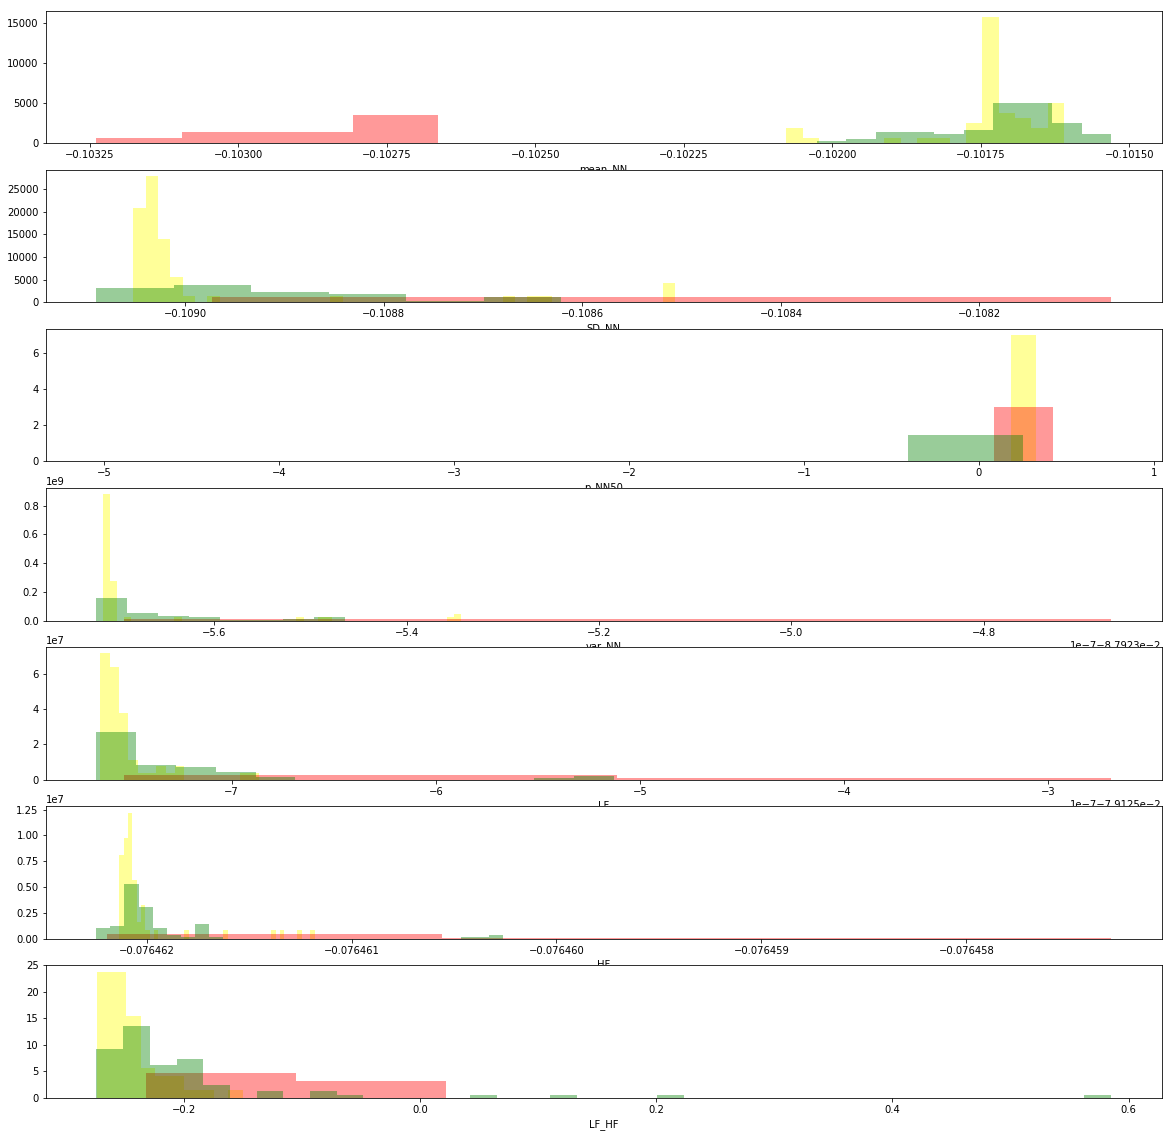

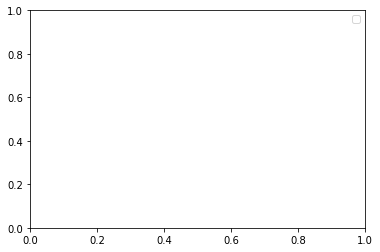

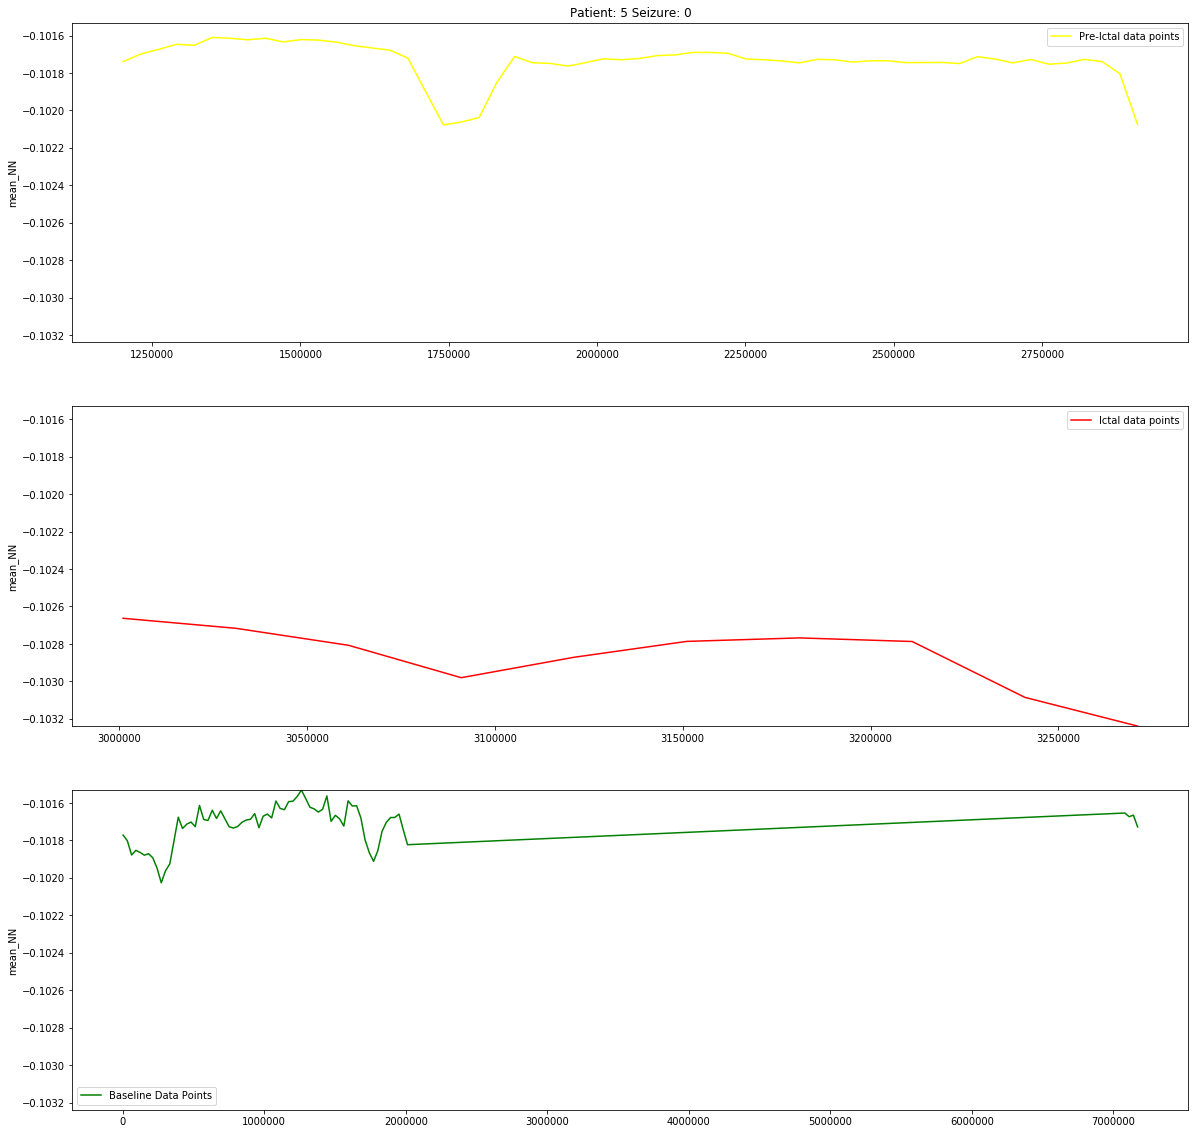

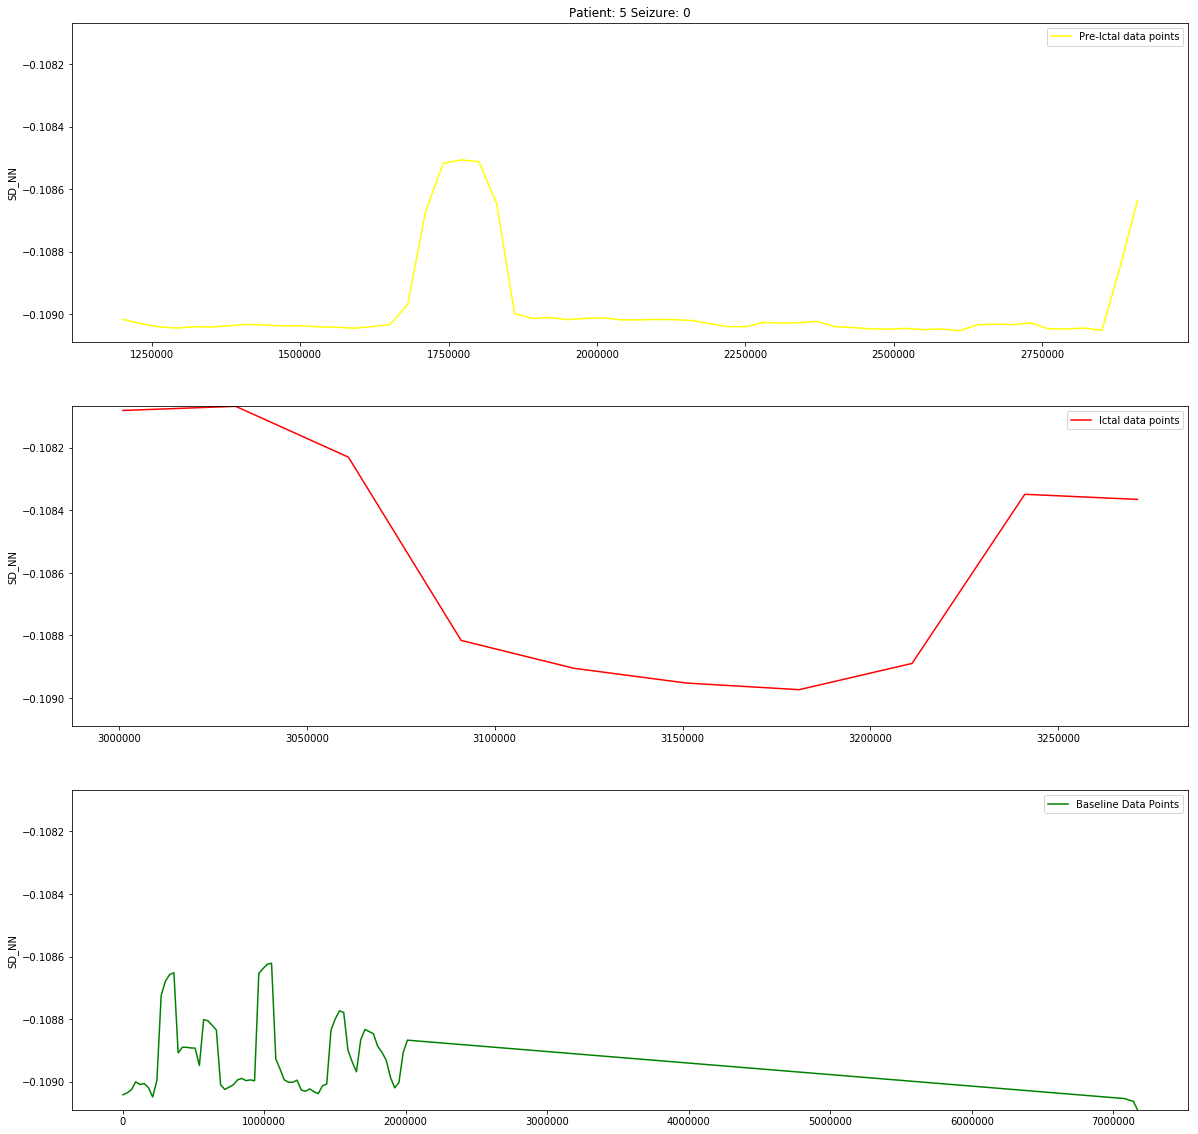

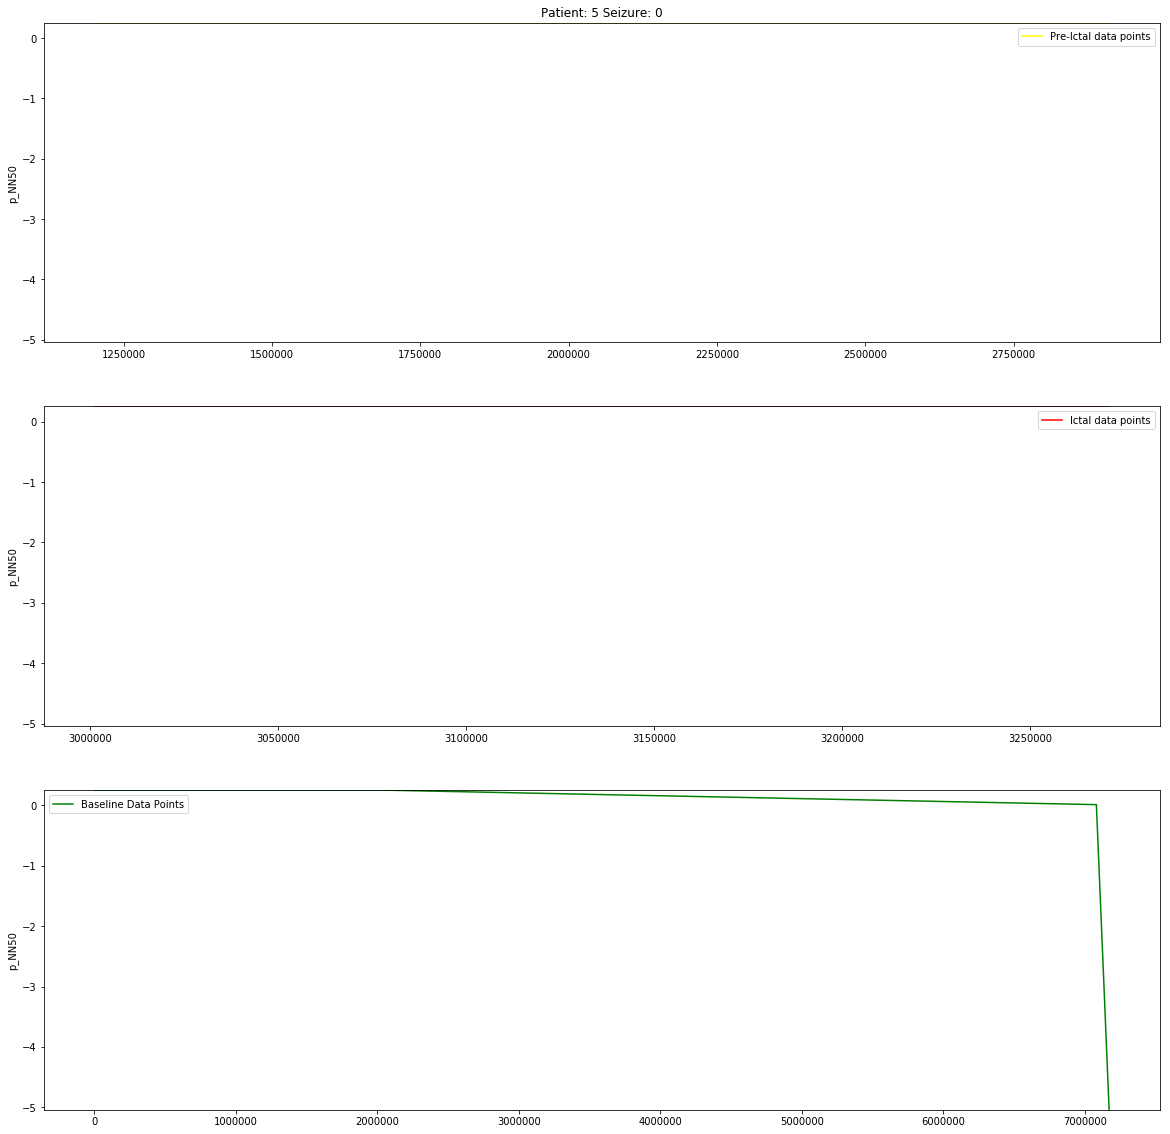

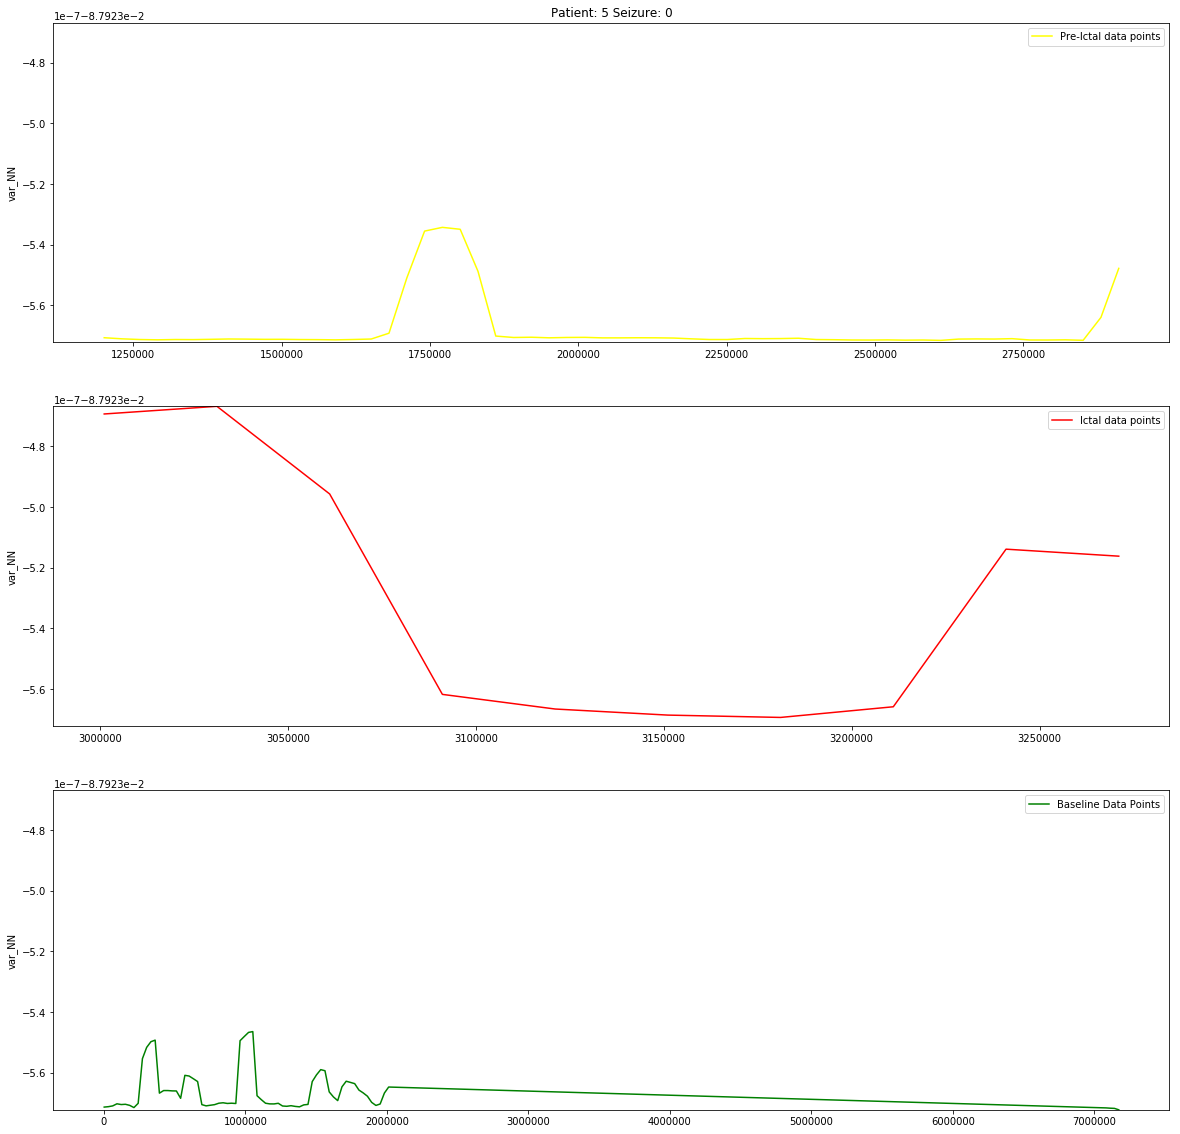

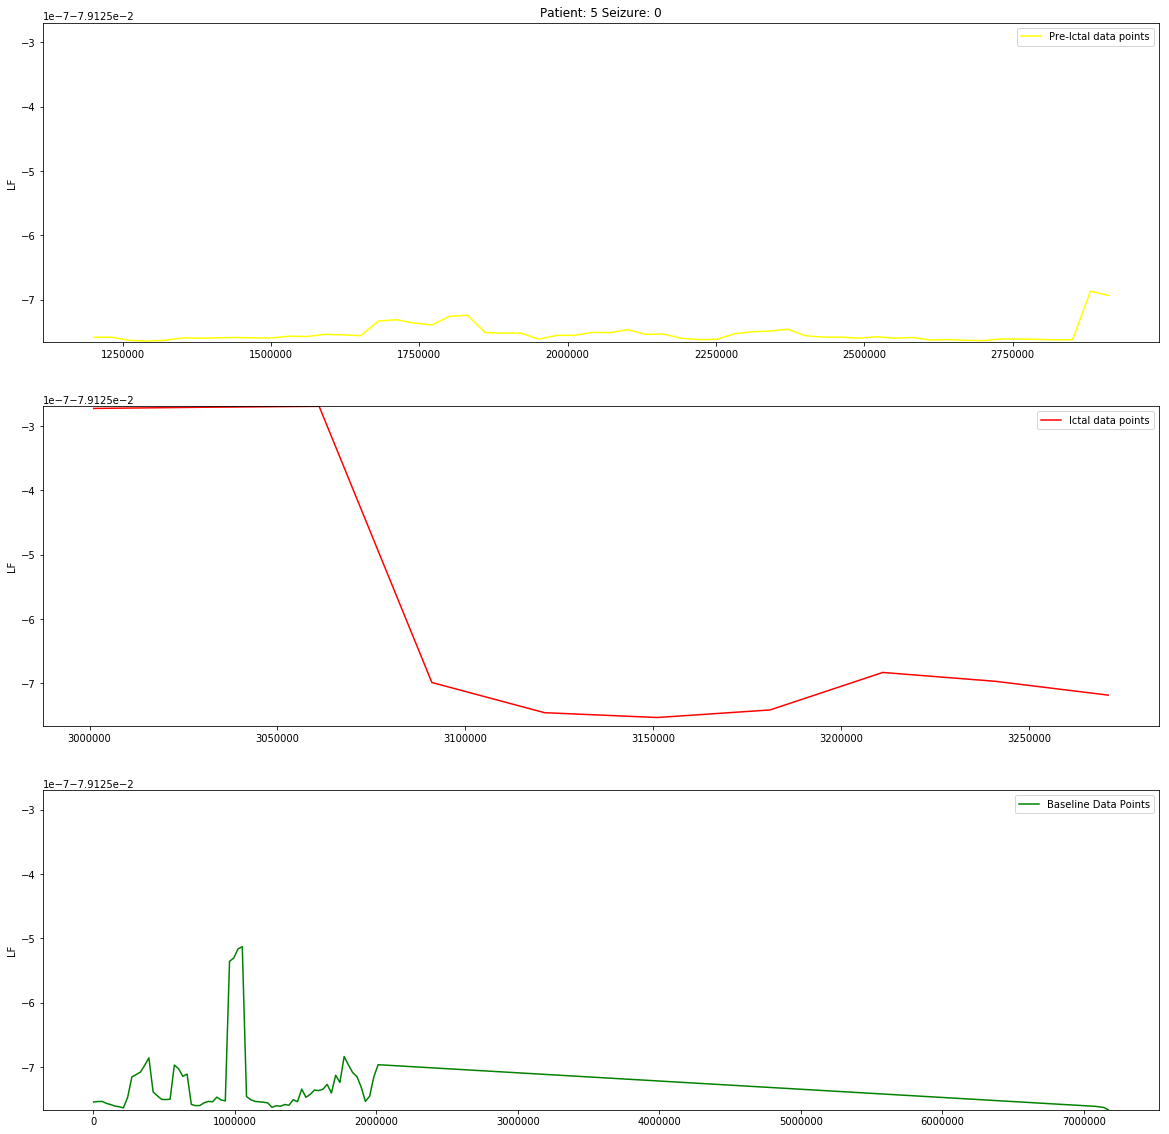

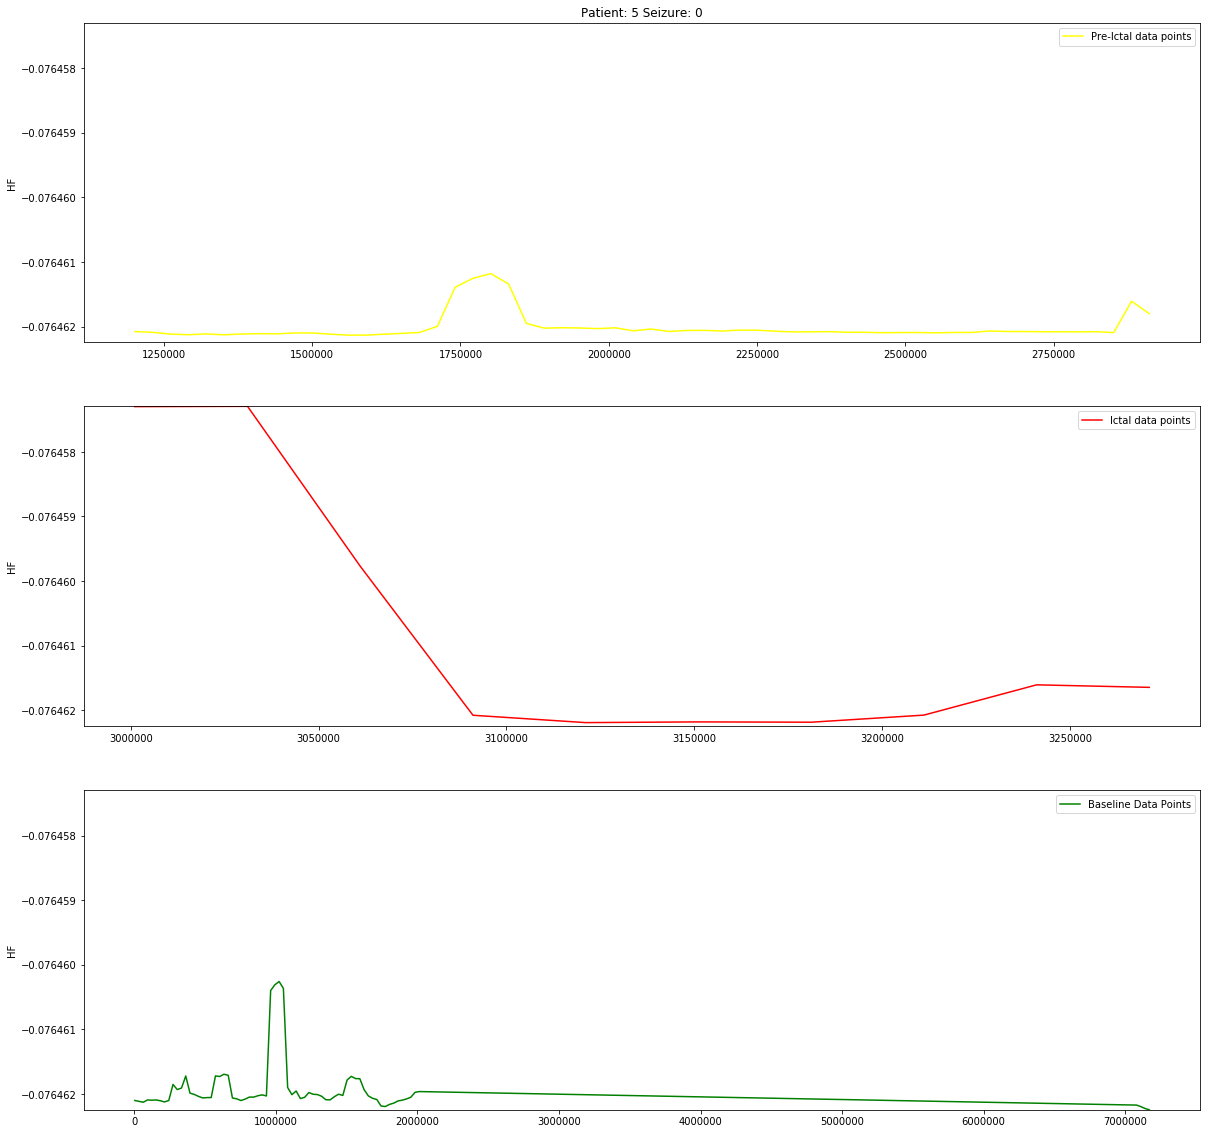

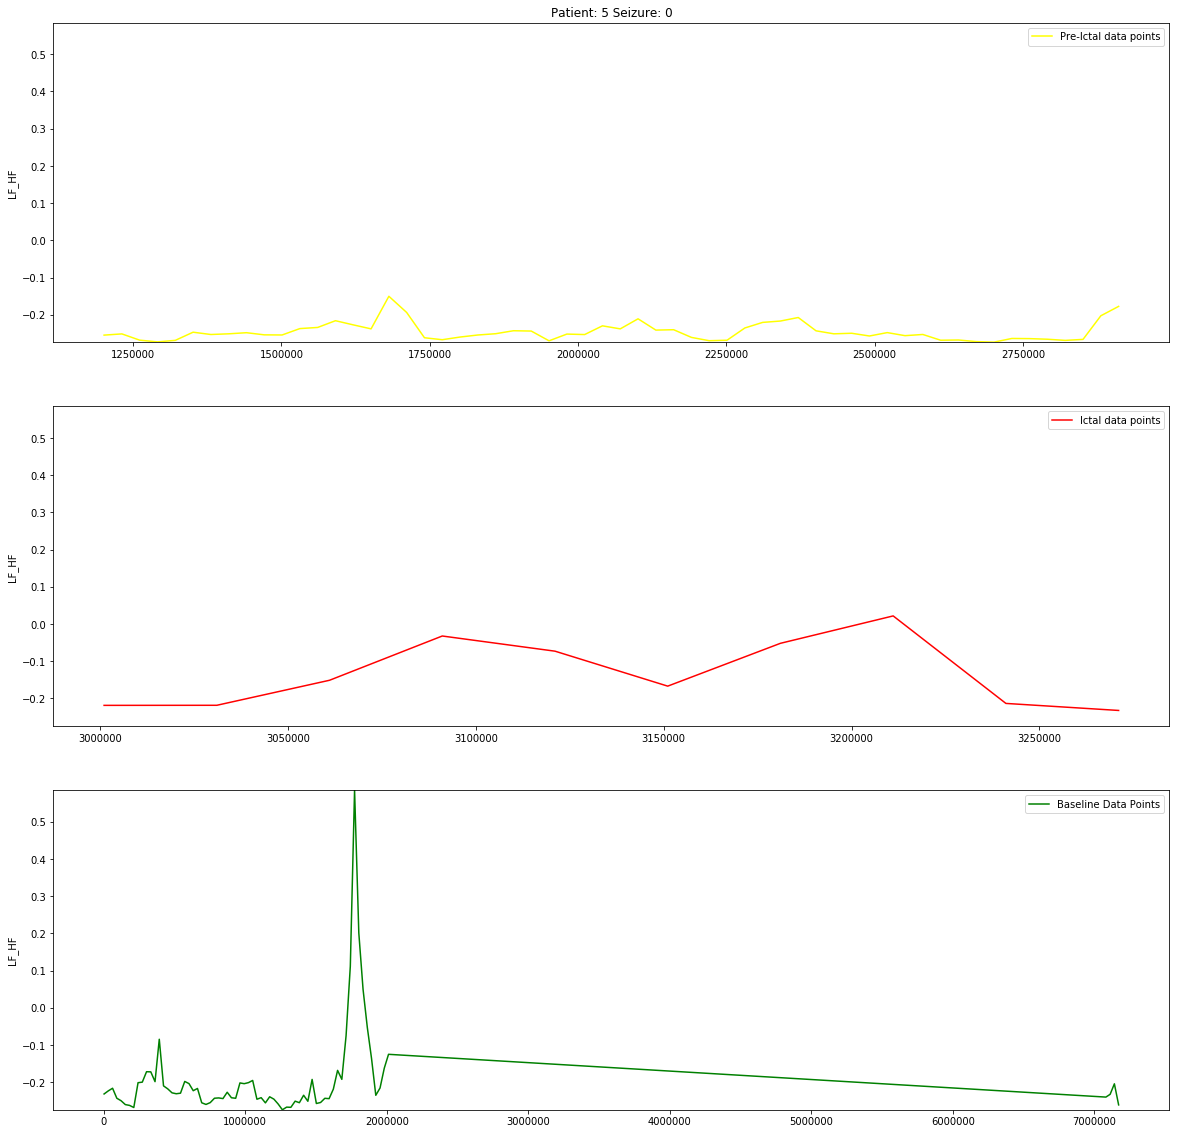

classification/eda/andrews.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


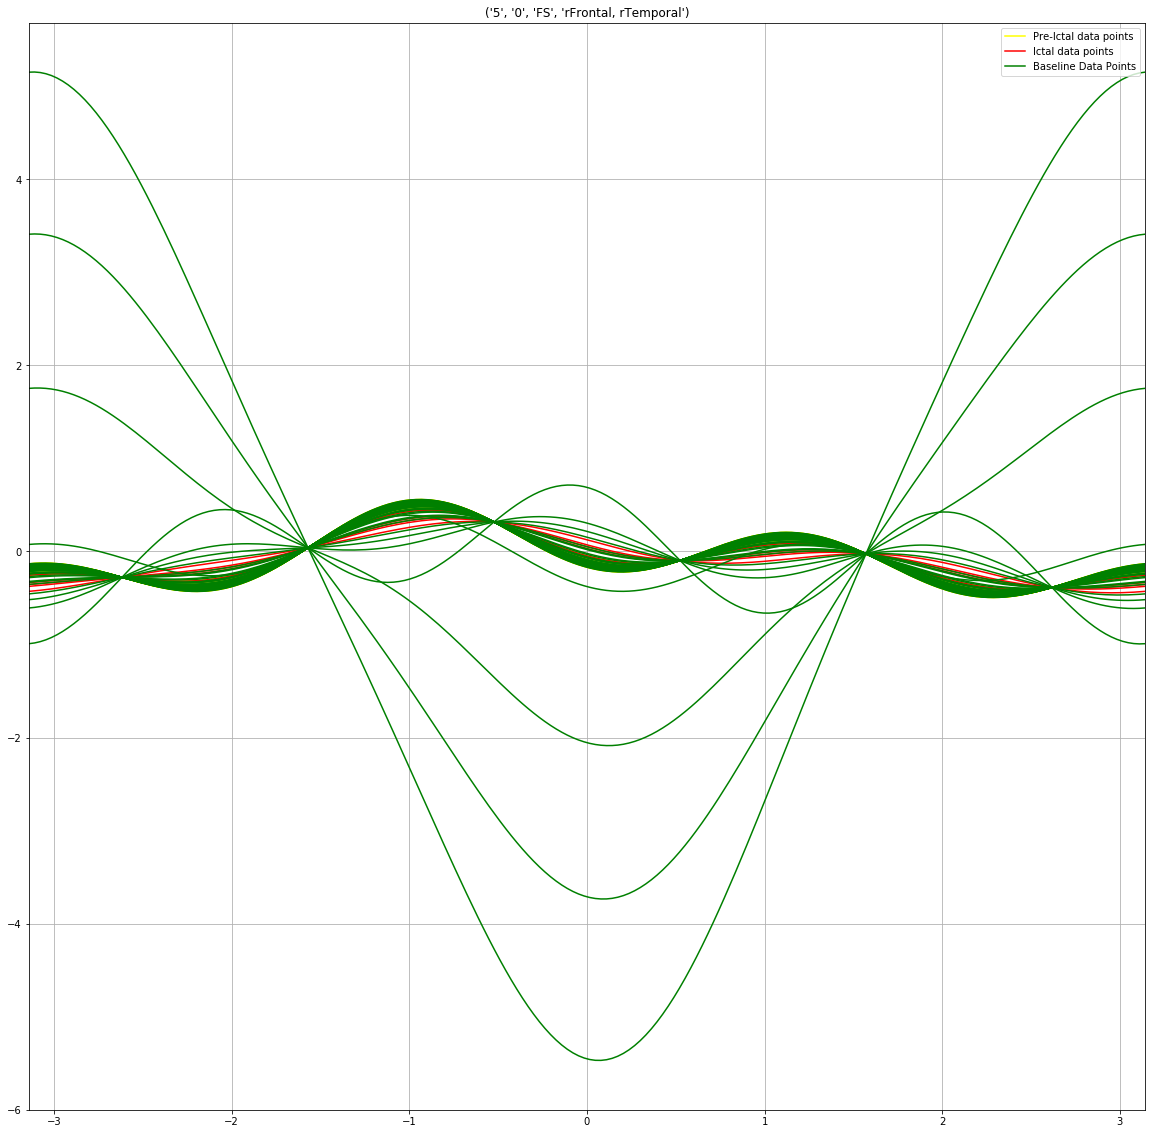

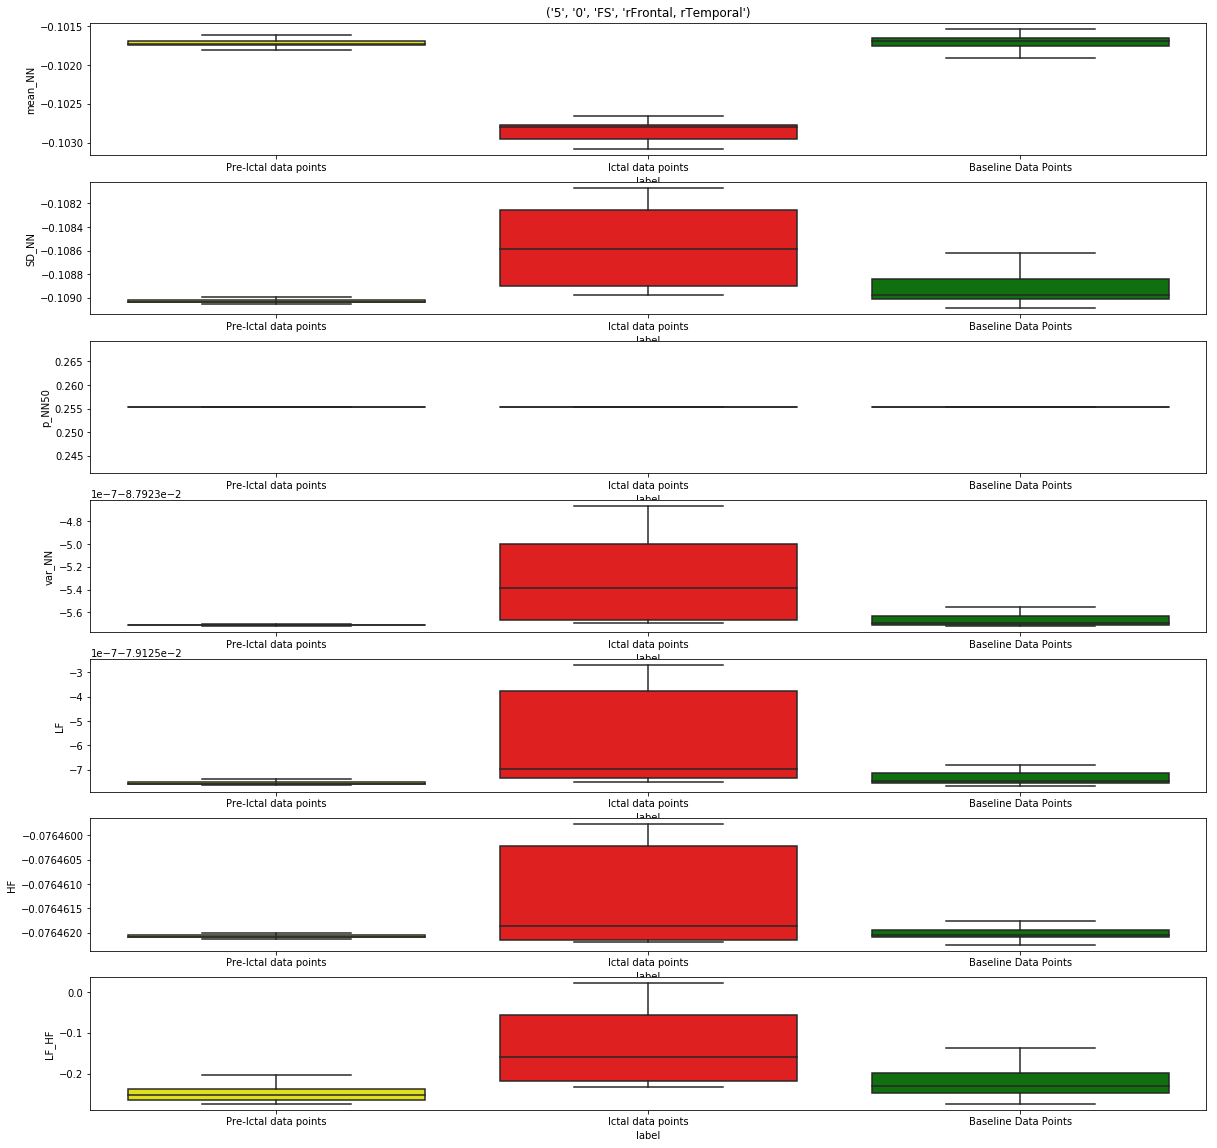

classification/eda/scatter.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


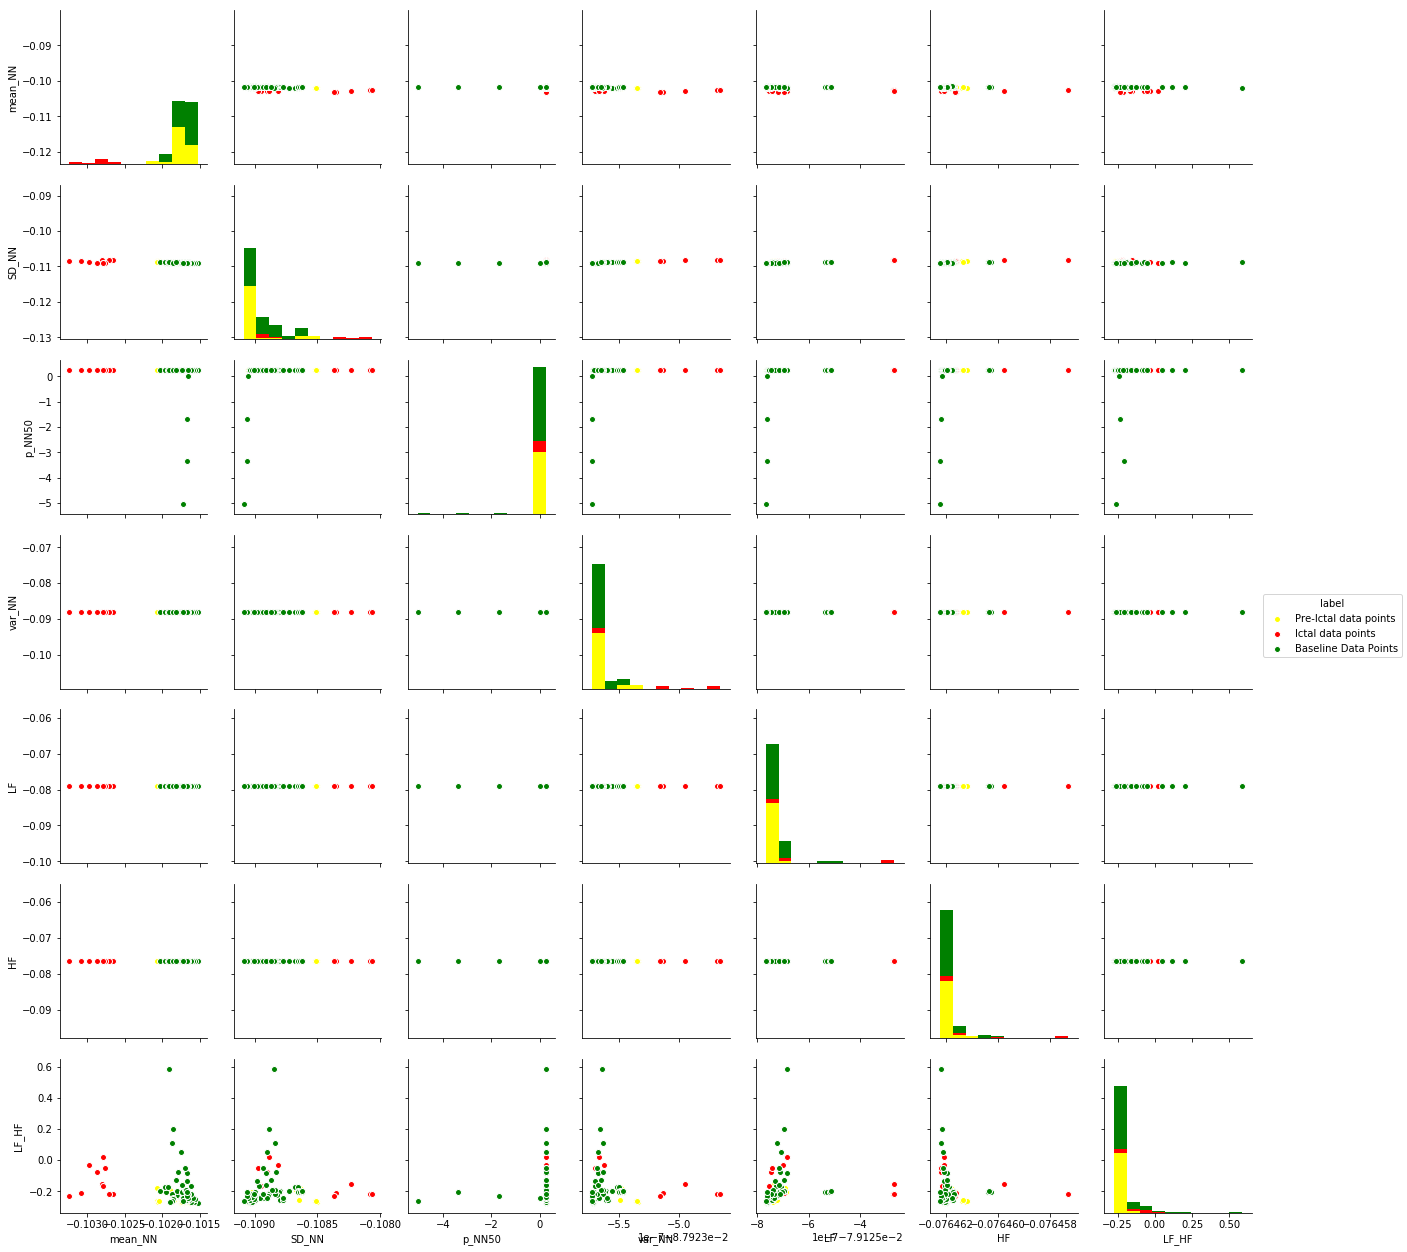

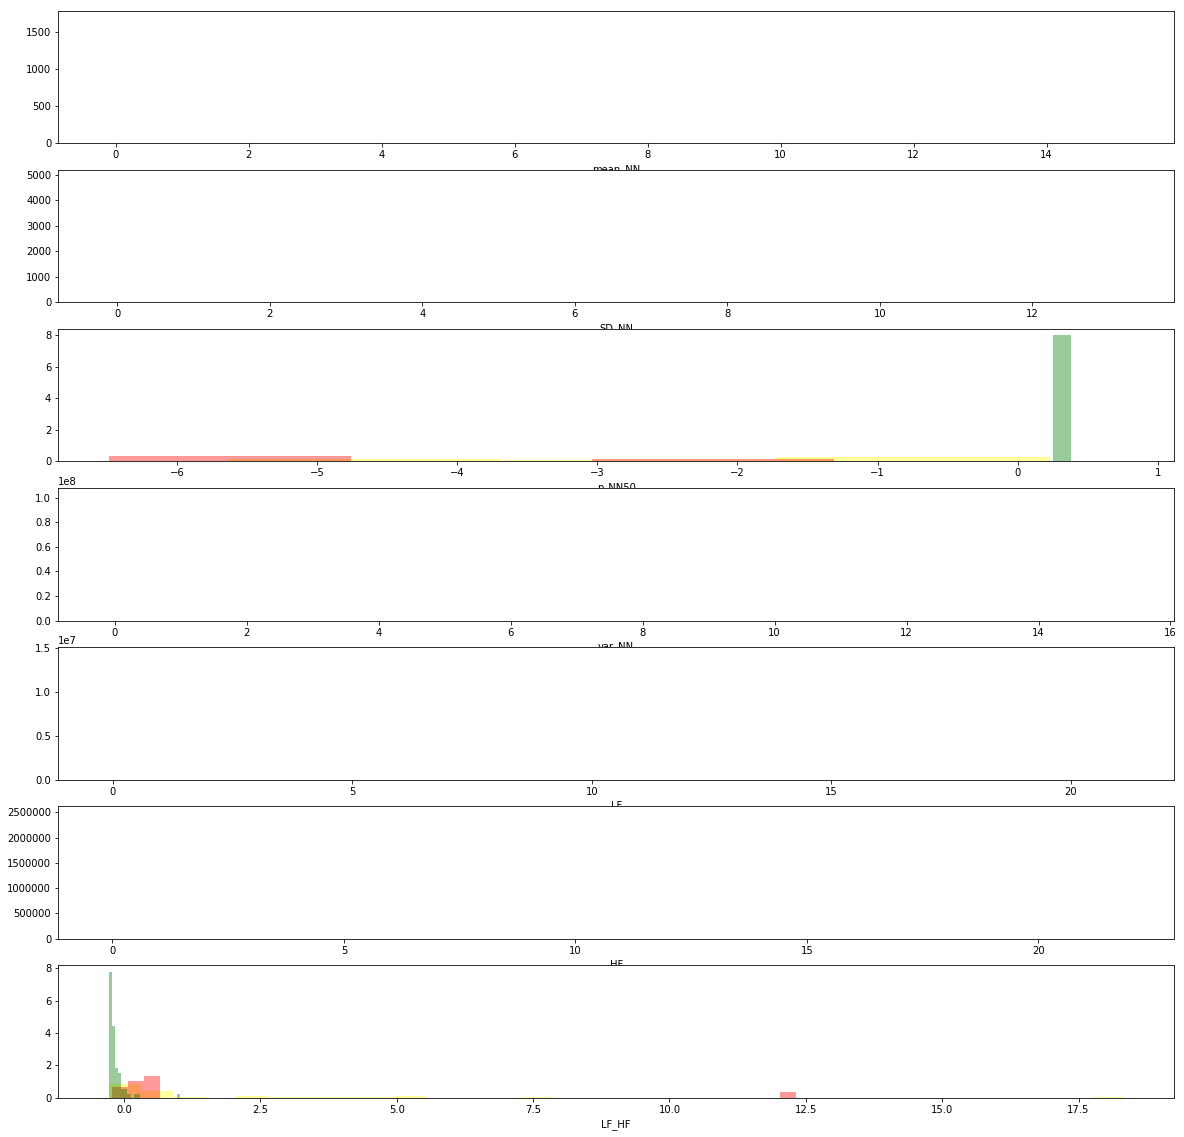

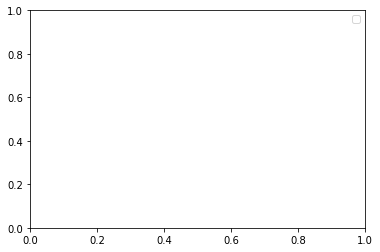

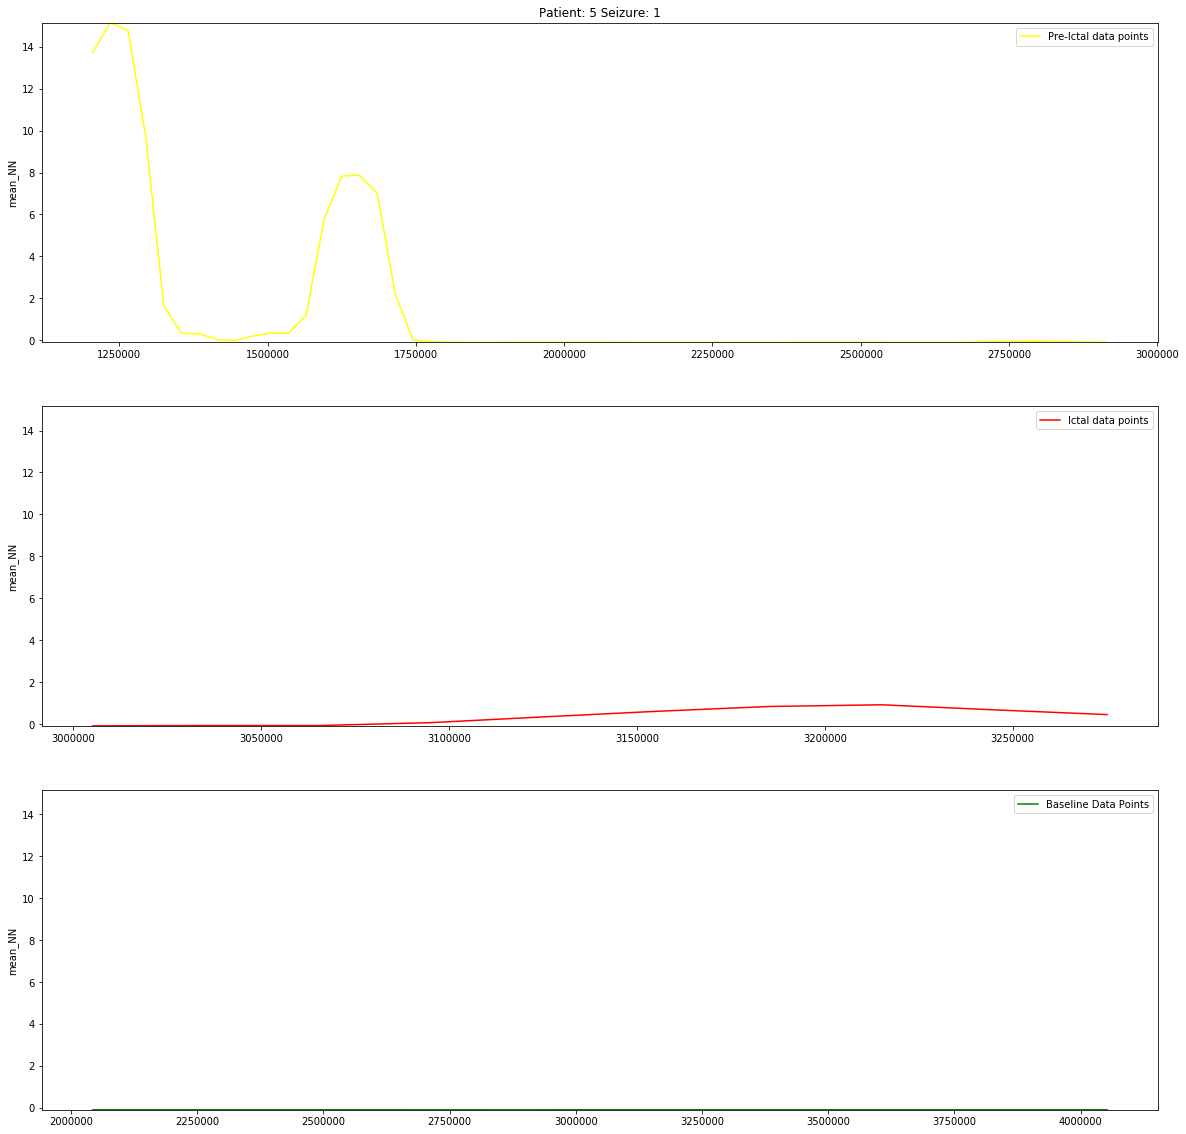

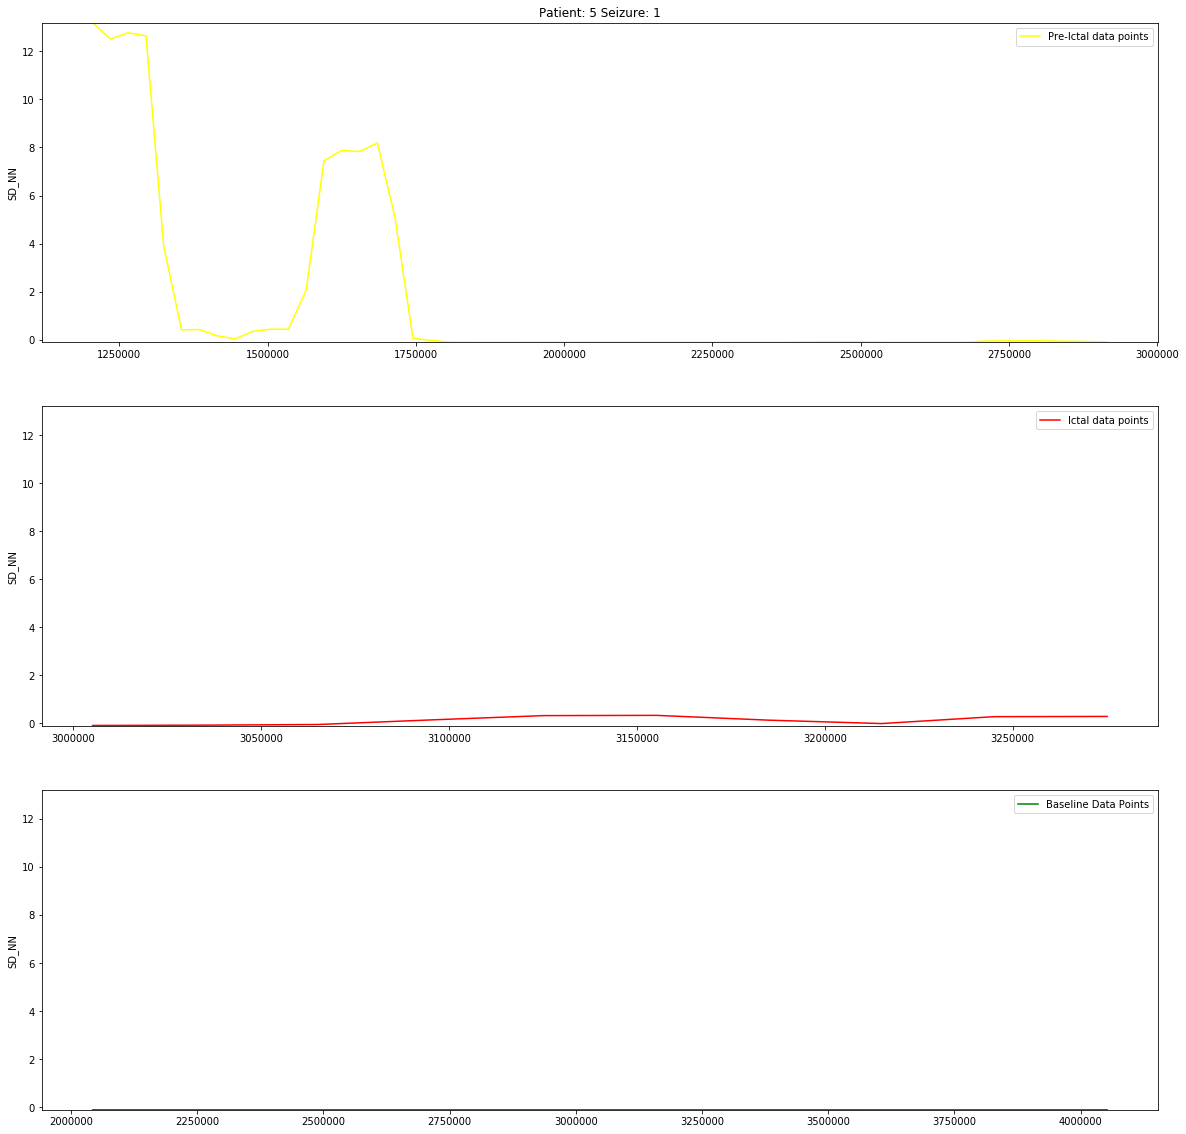

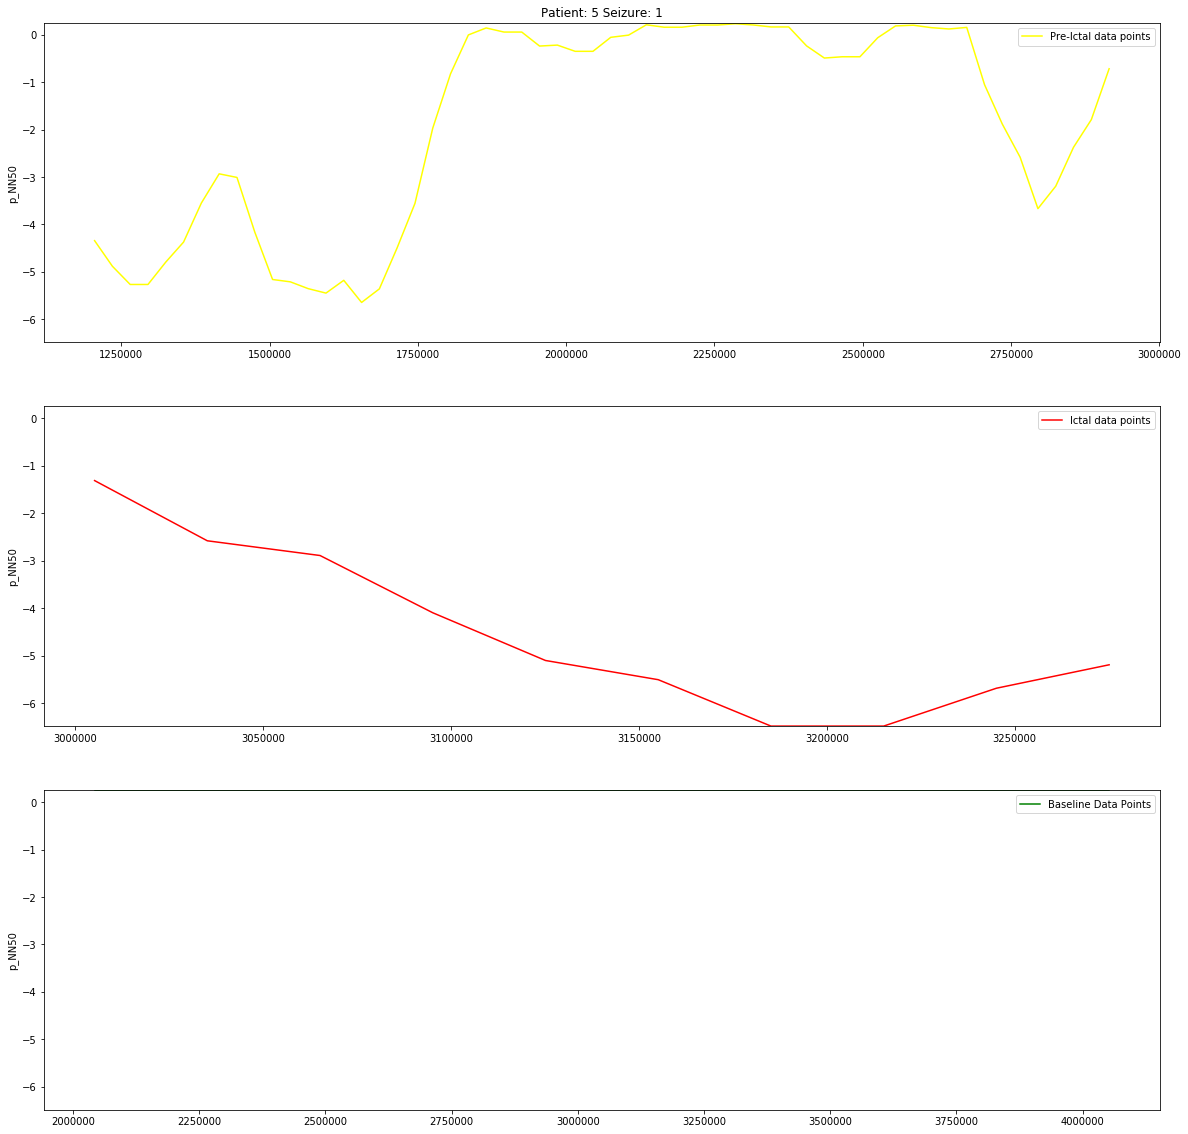

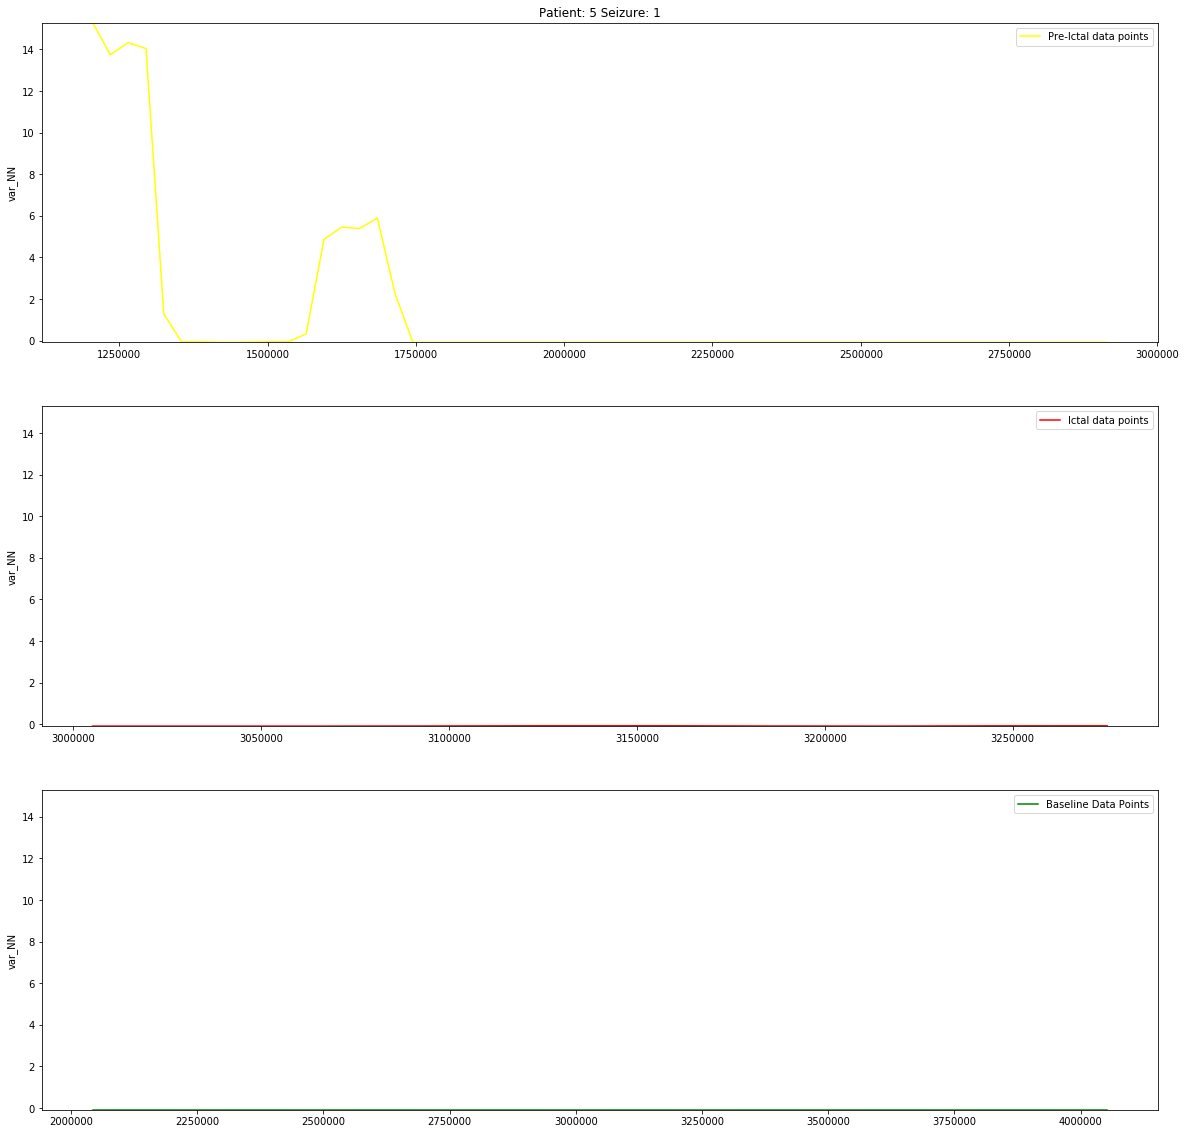

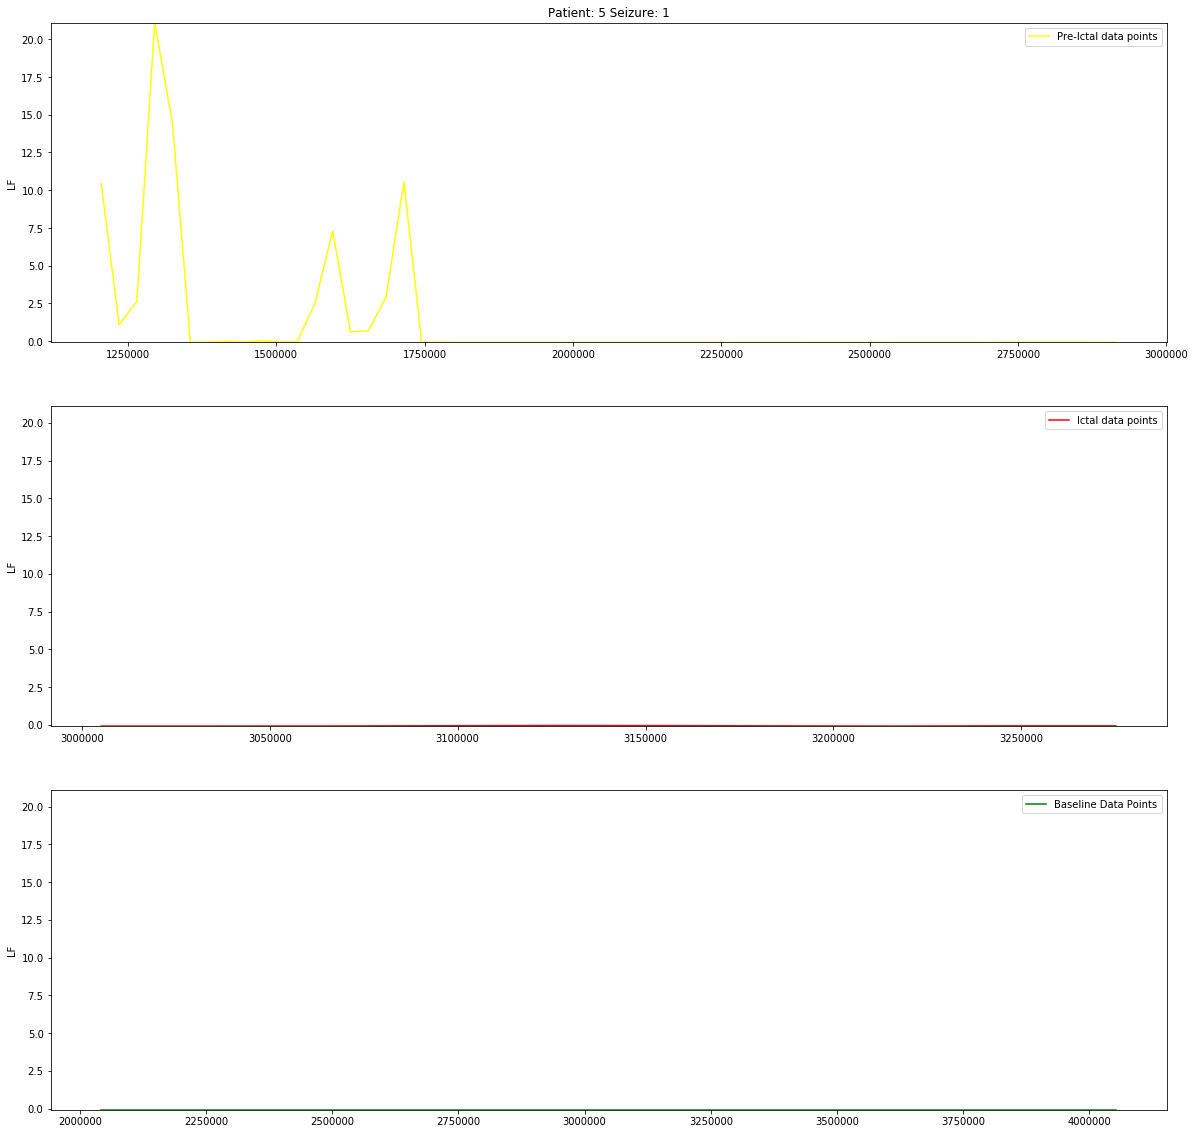

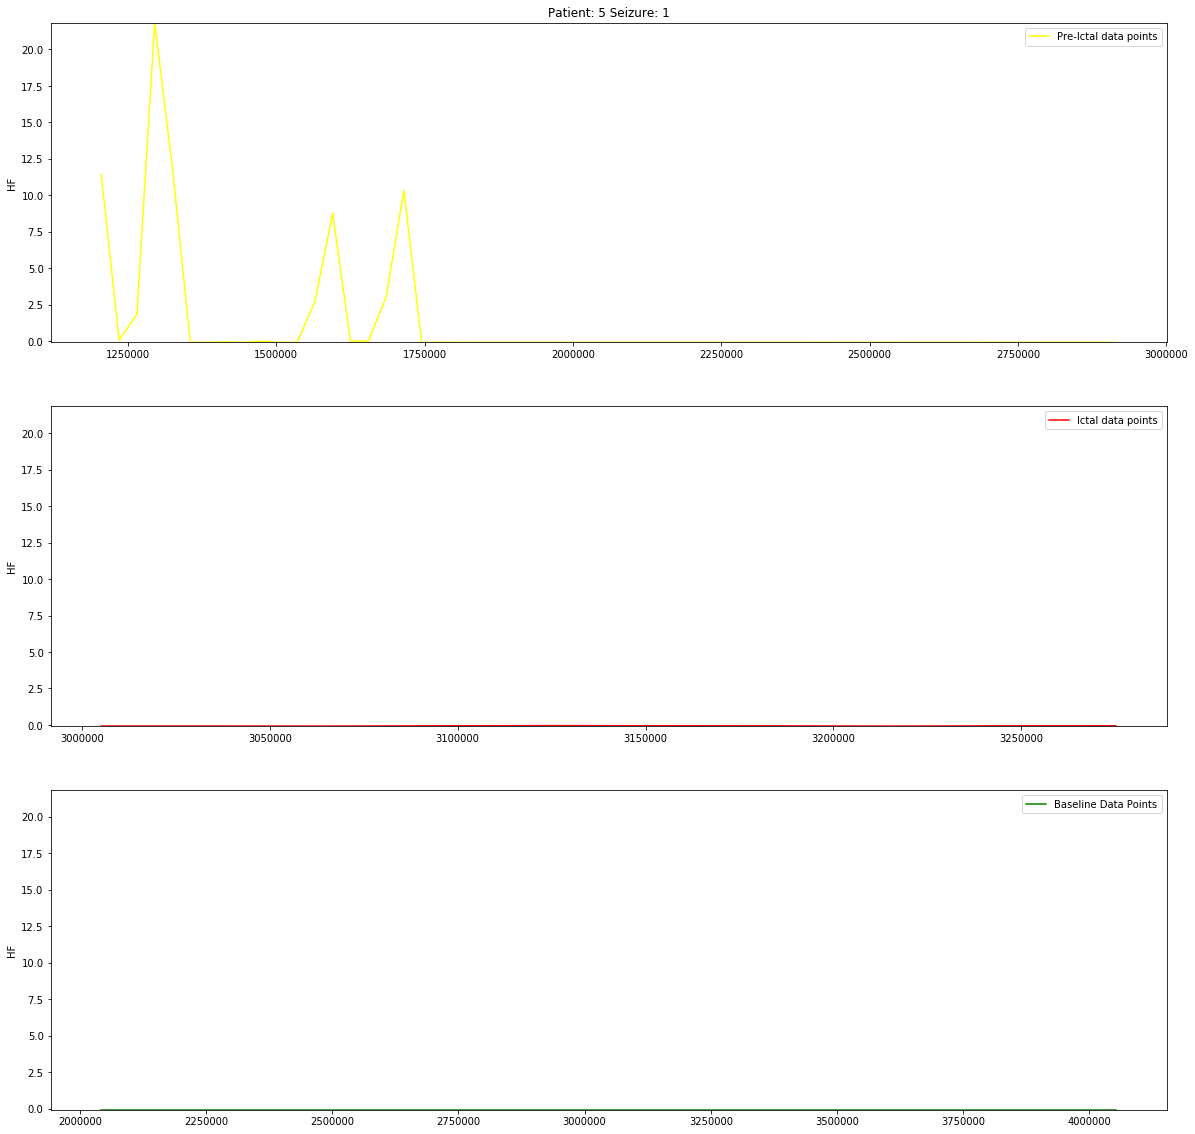

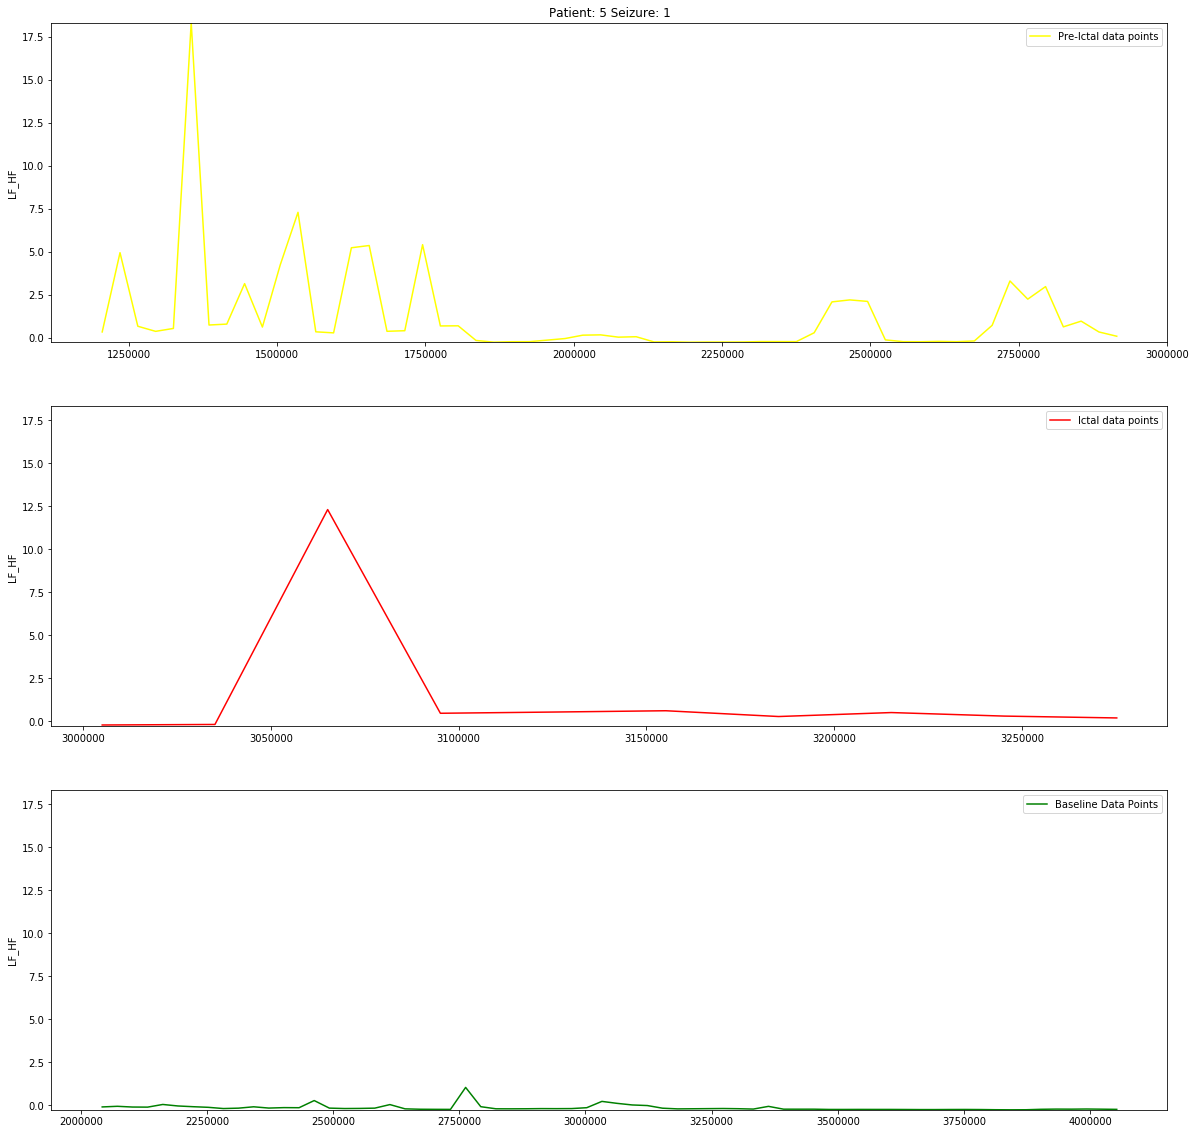

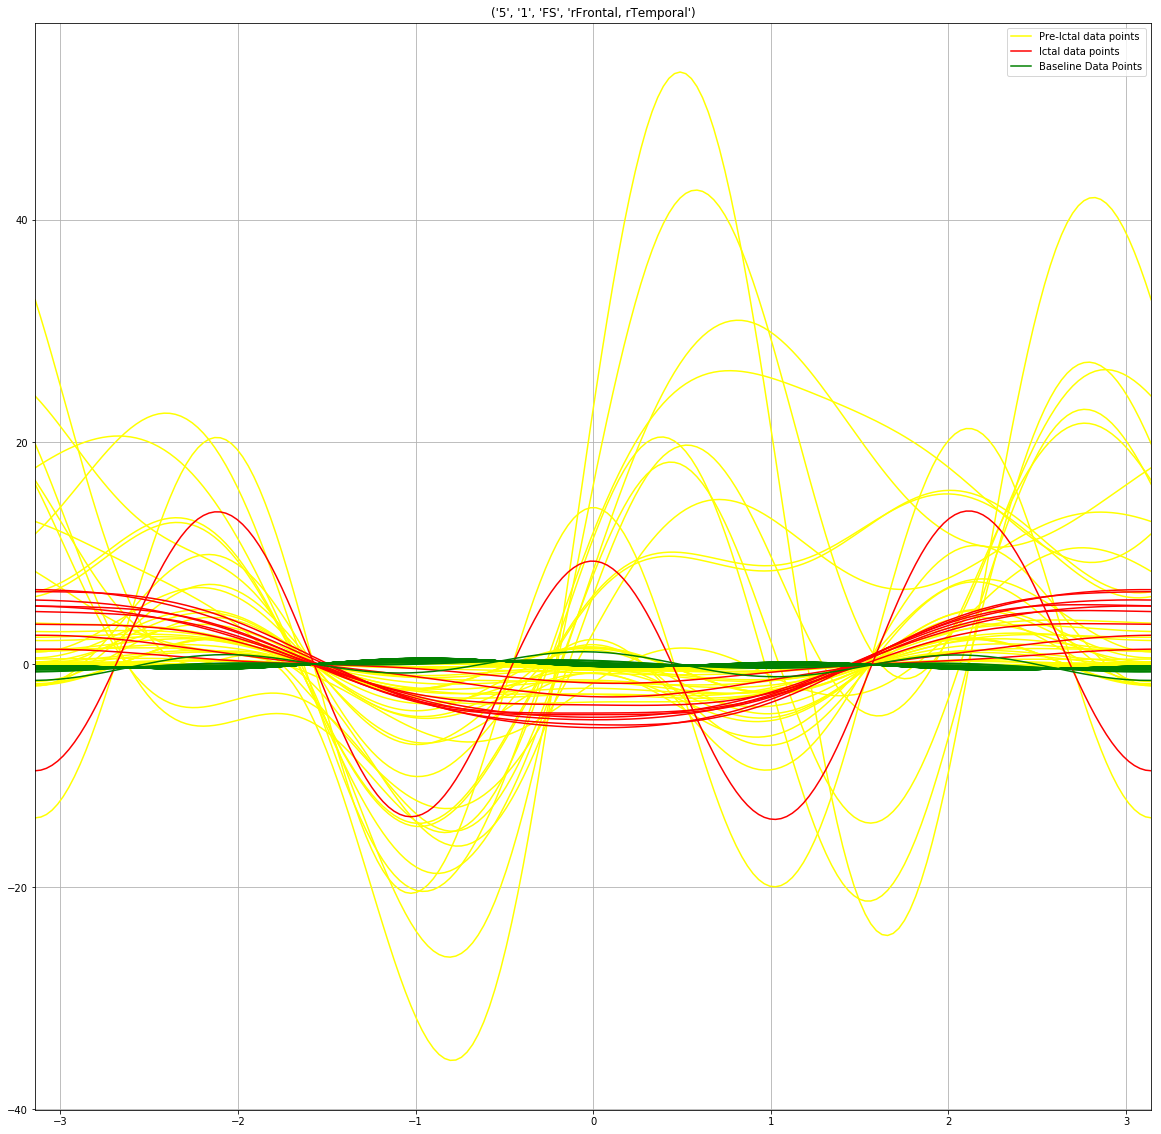

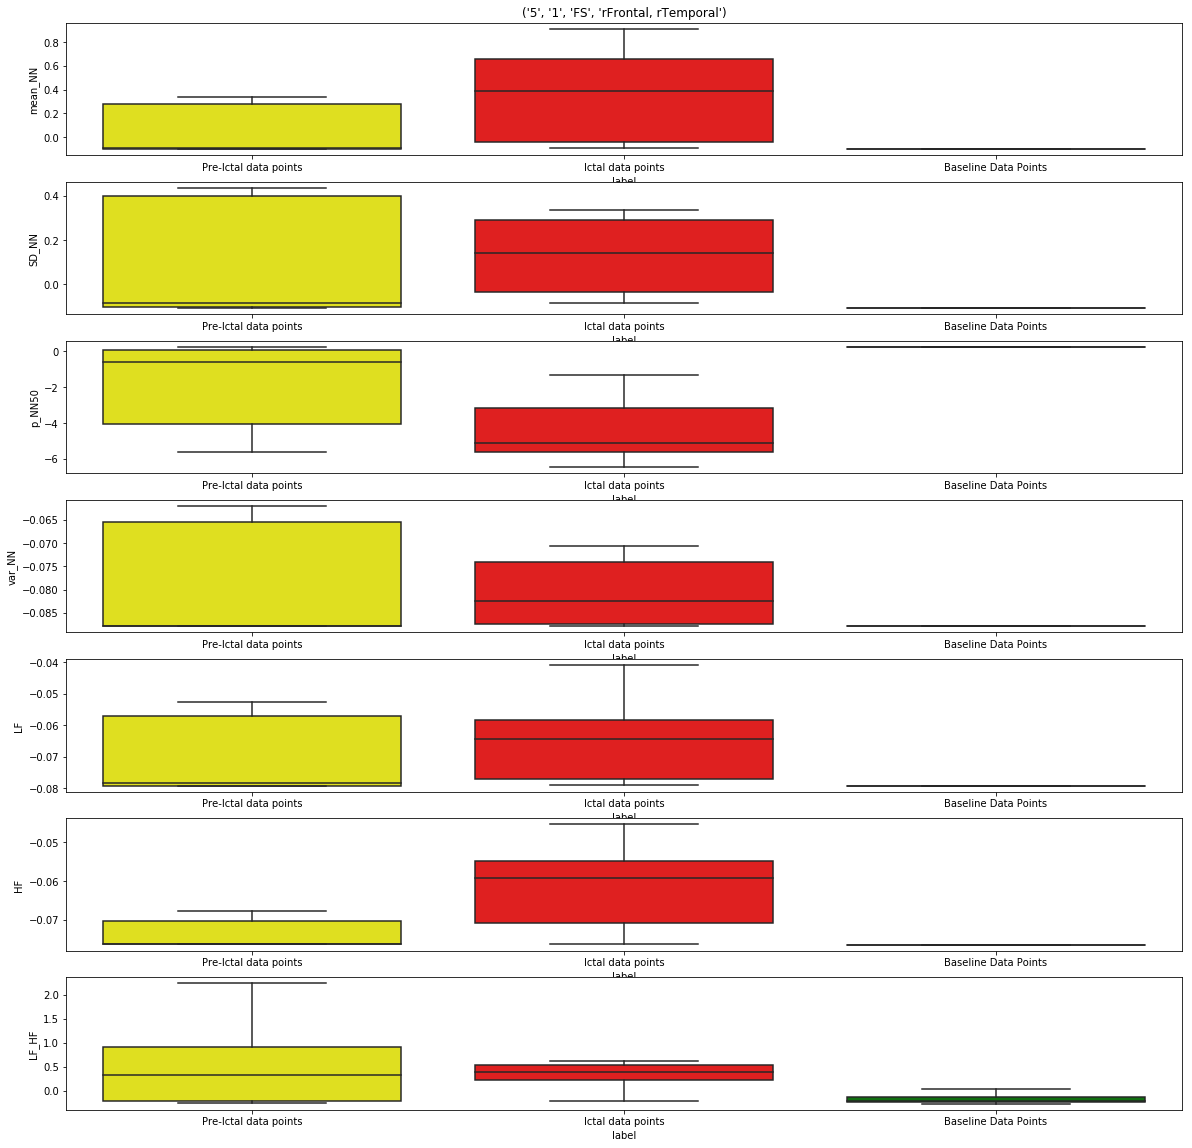

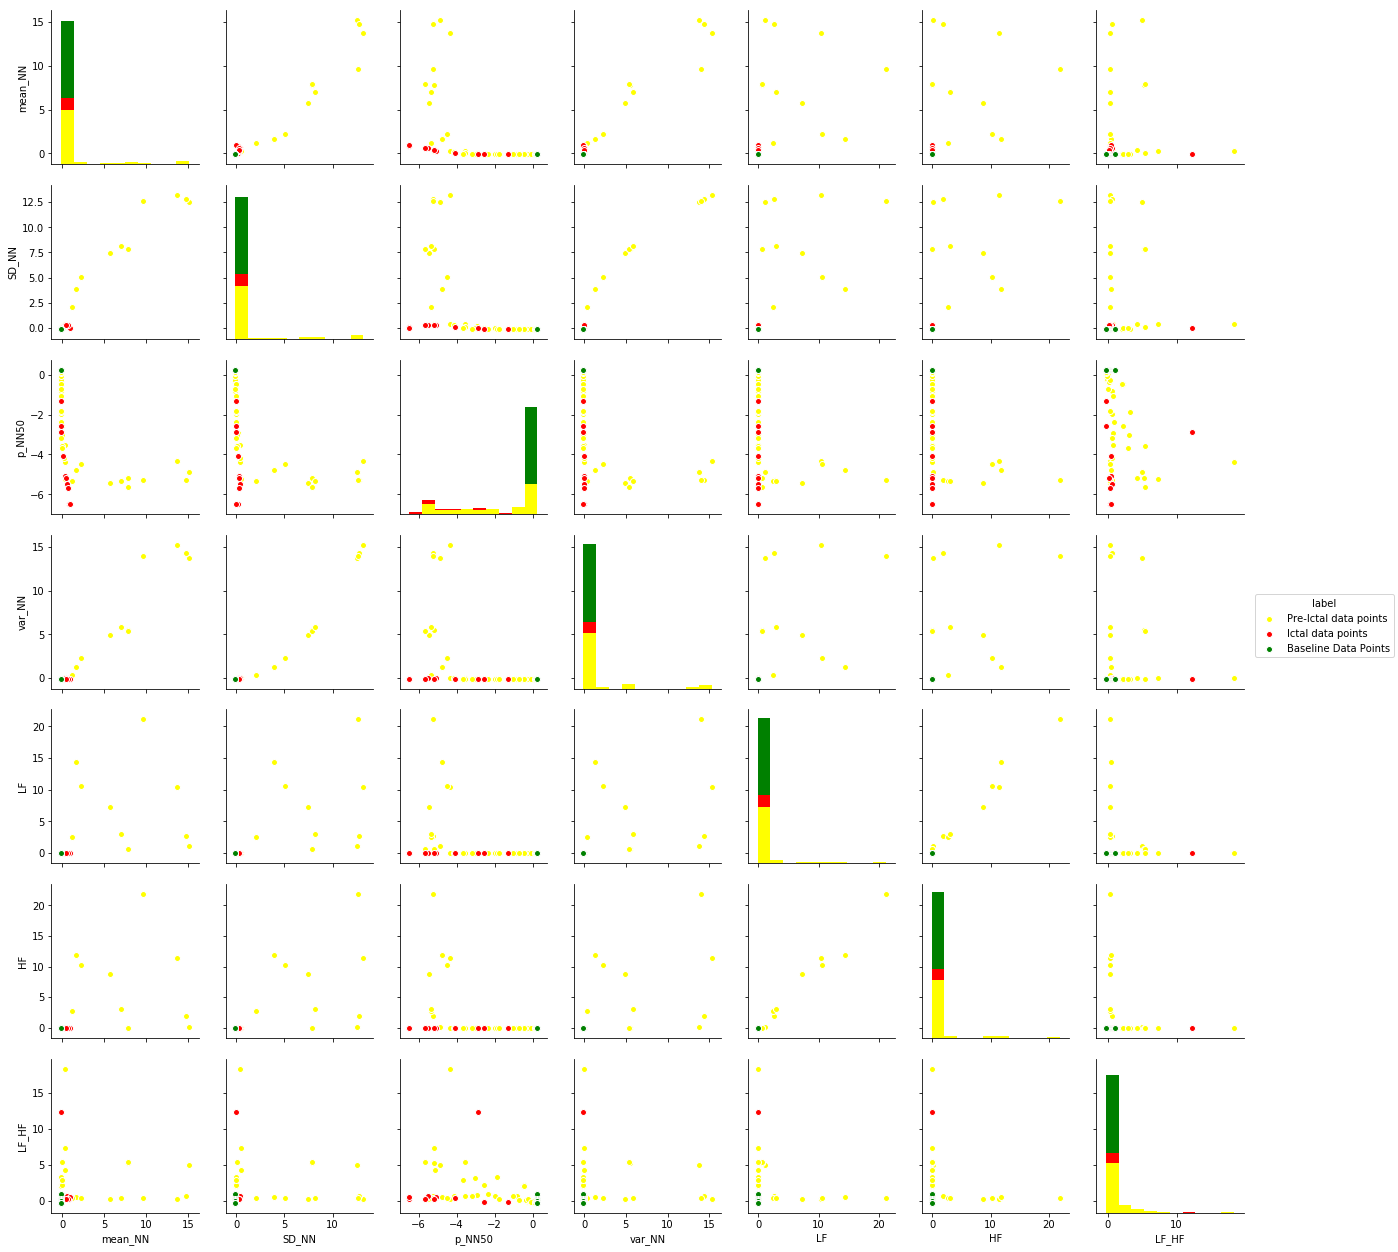

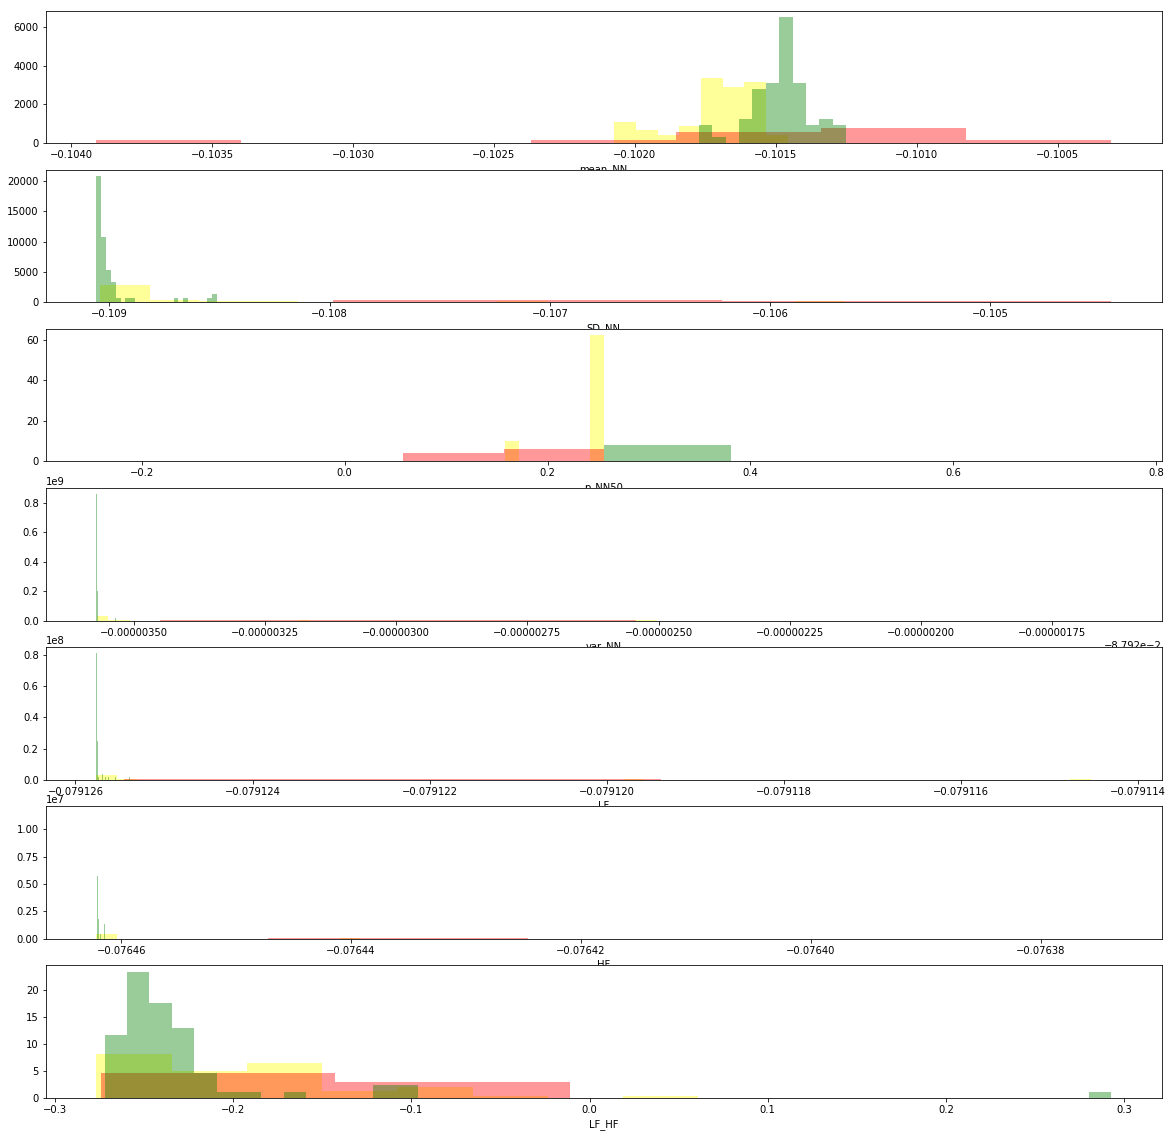

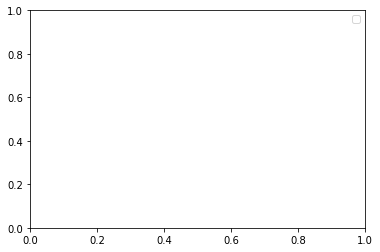

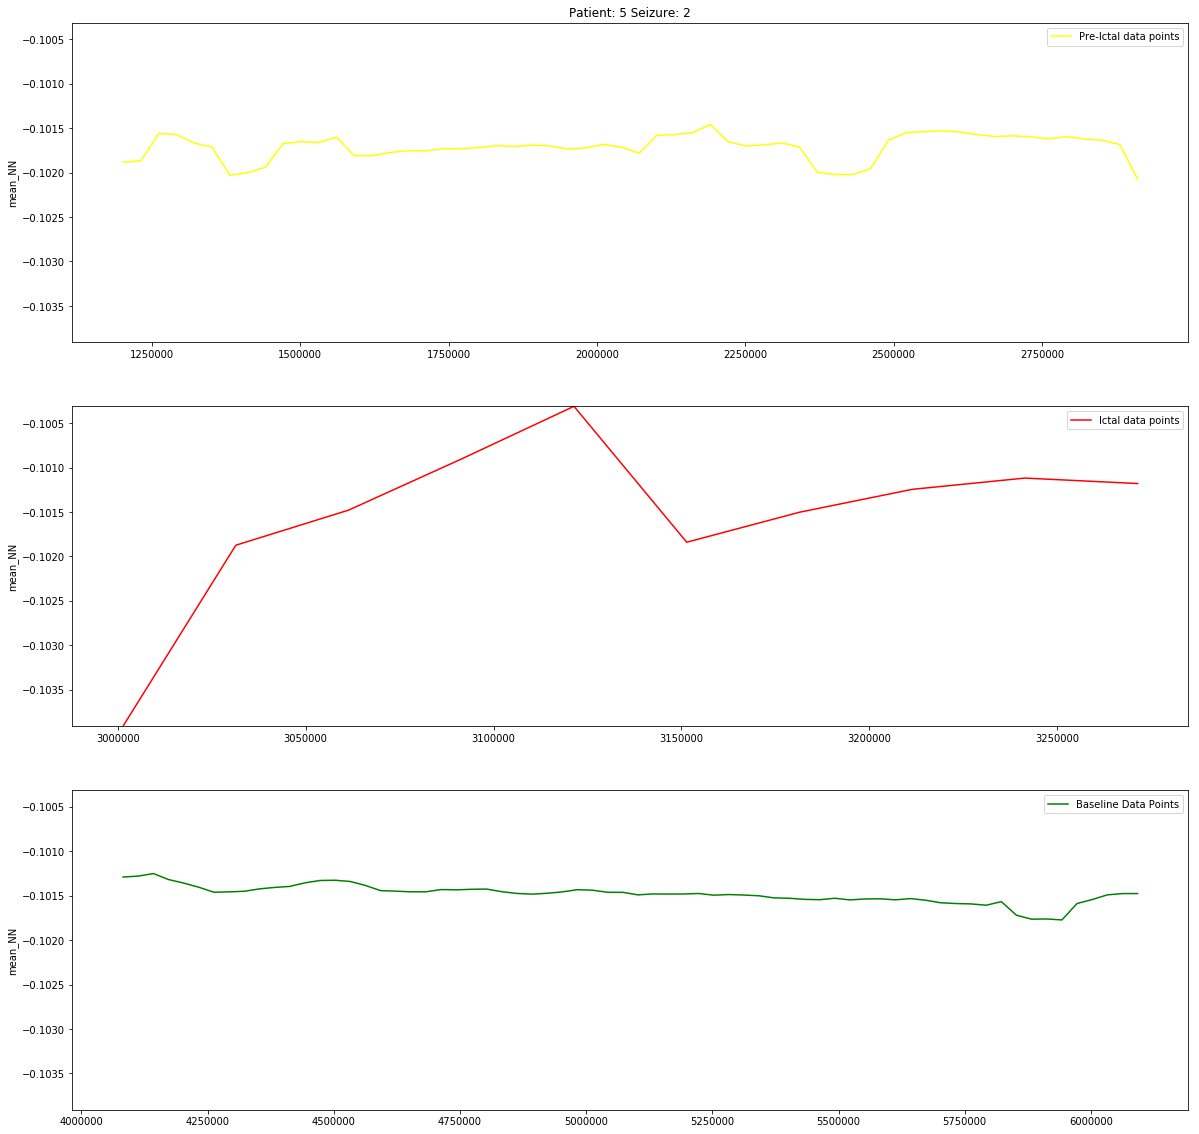

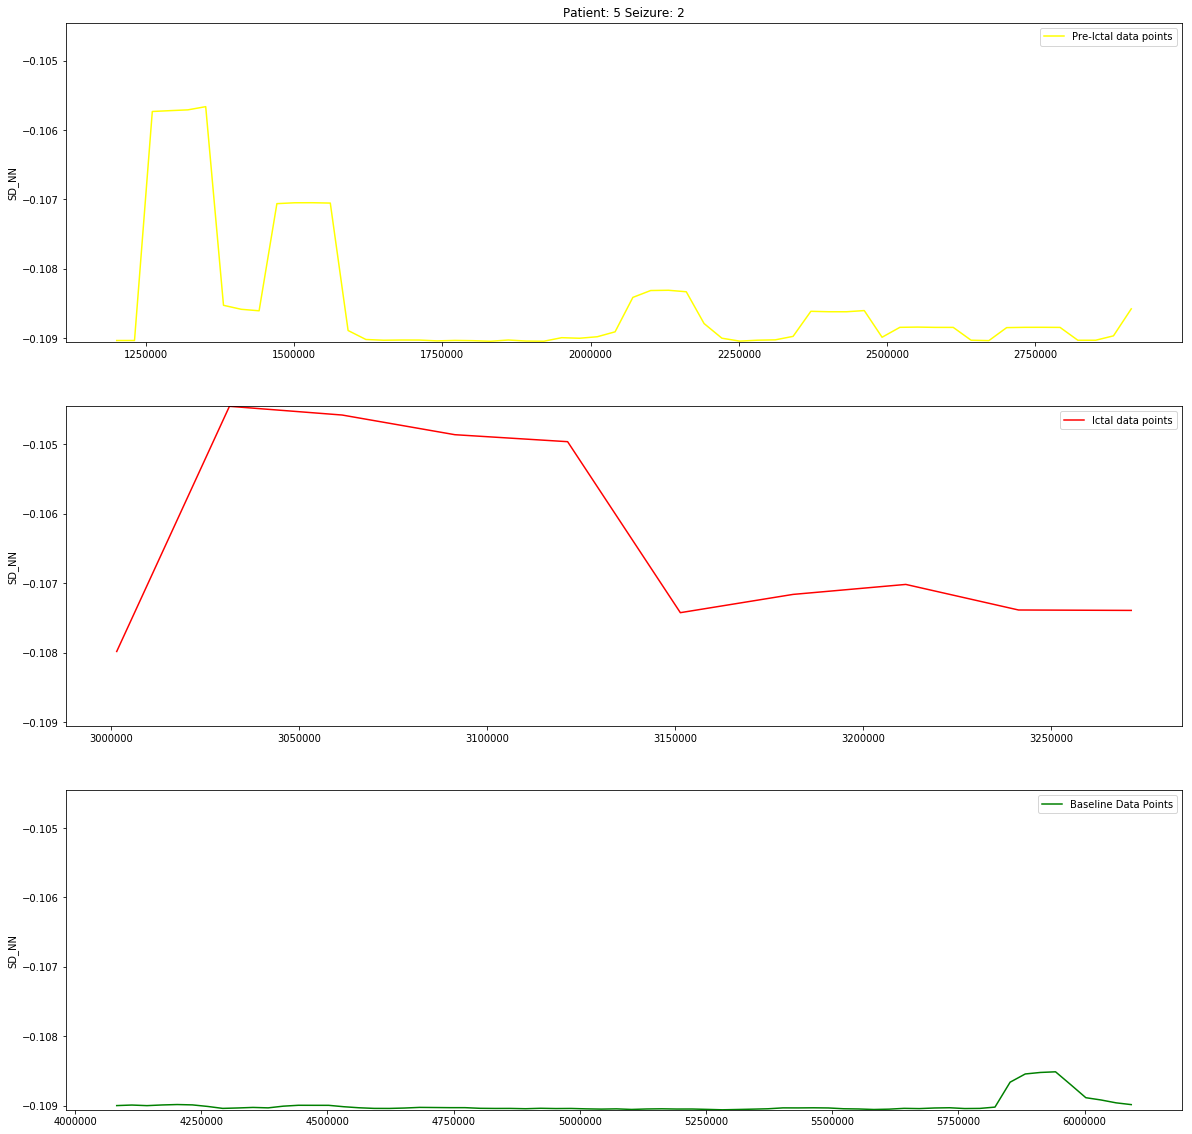

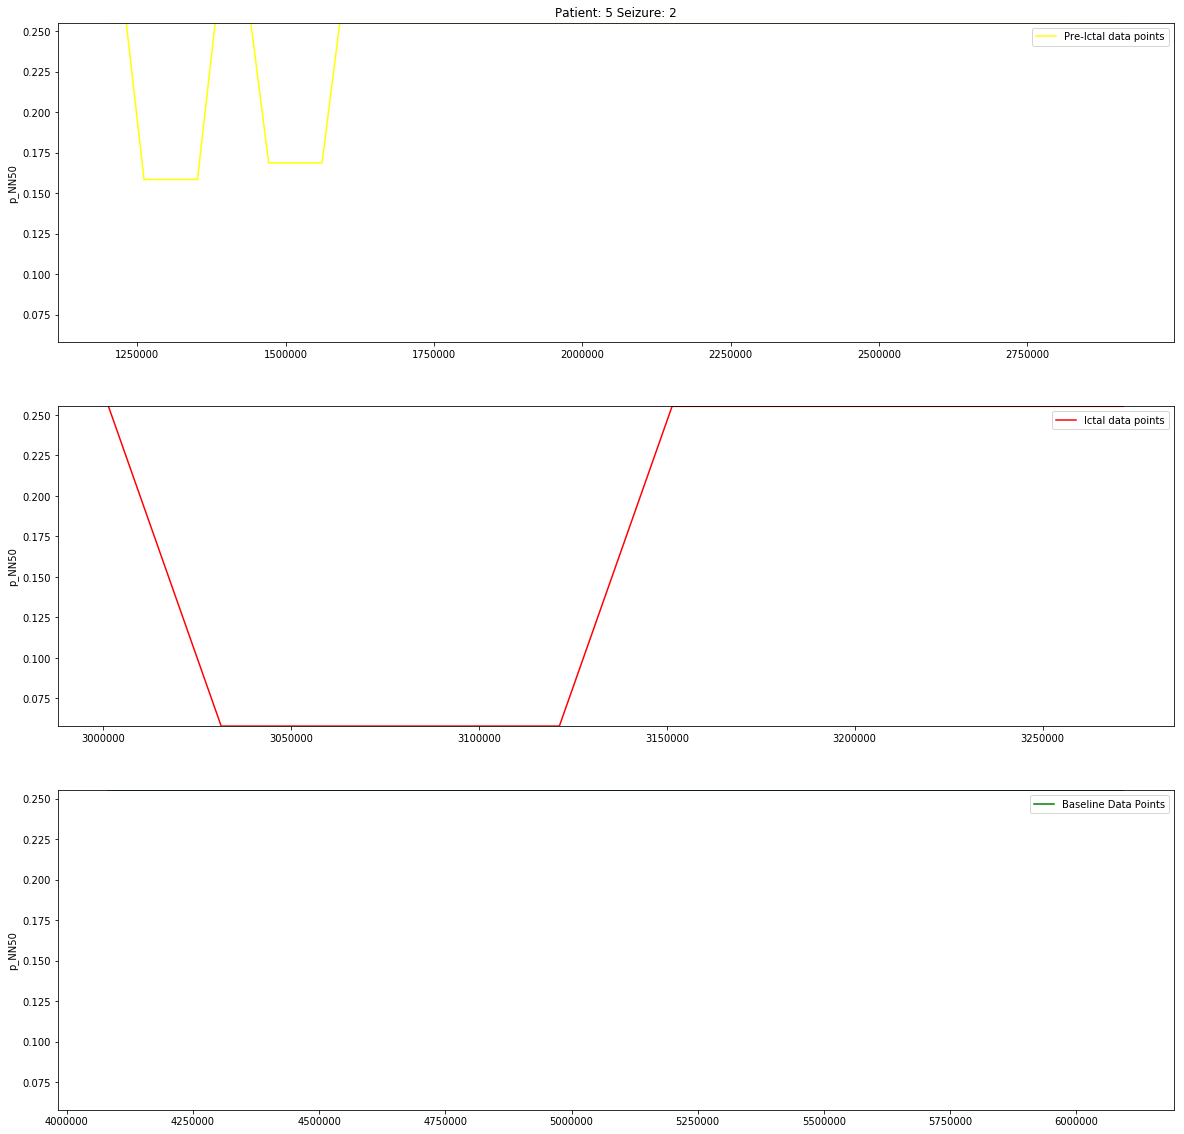

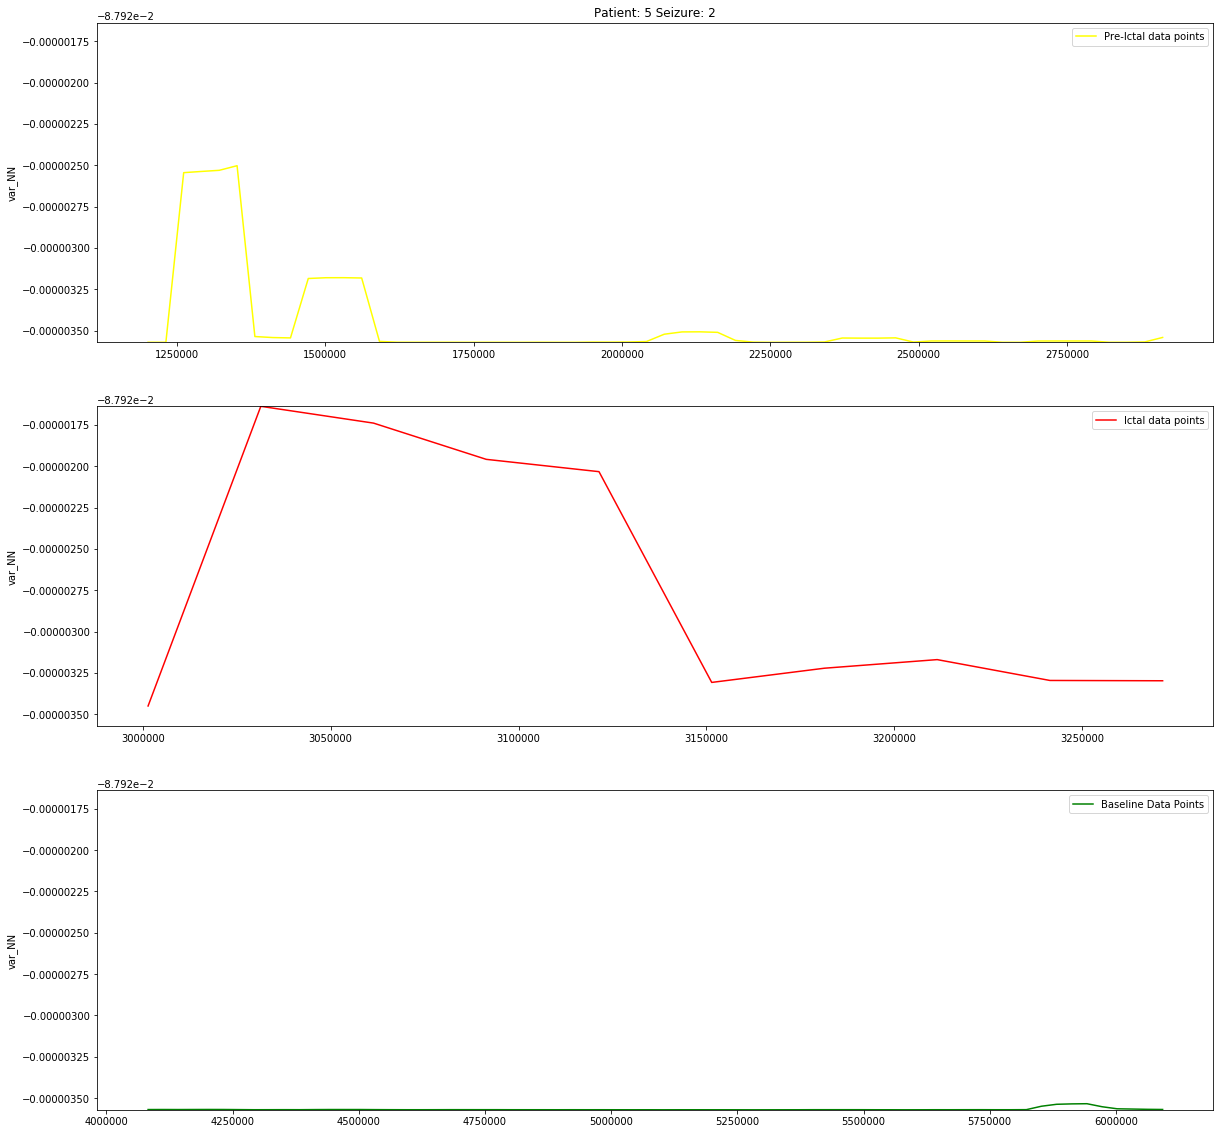

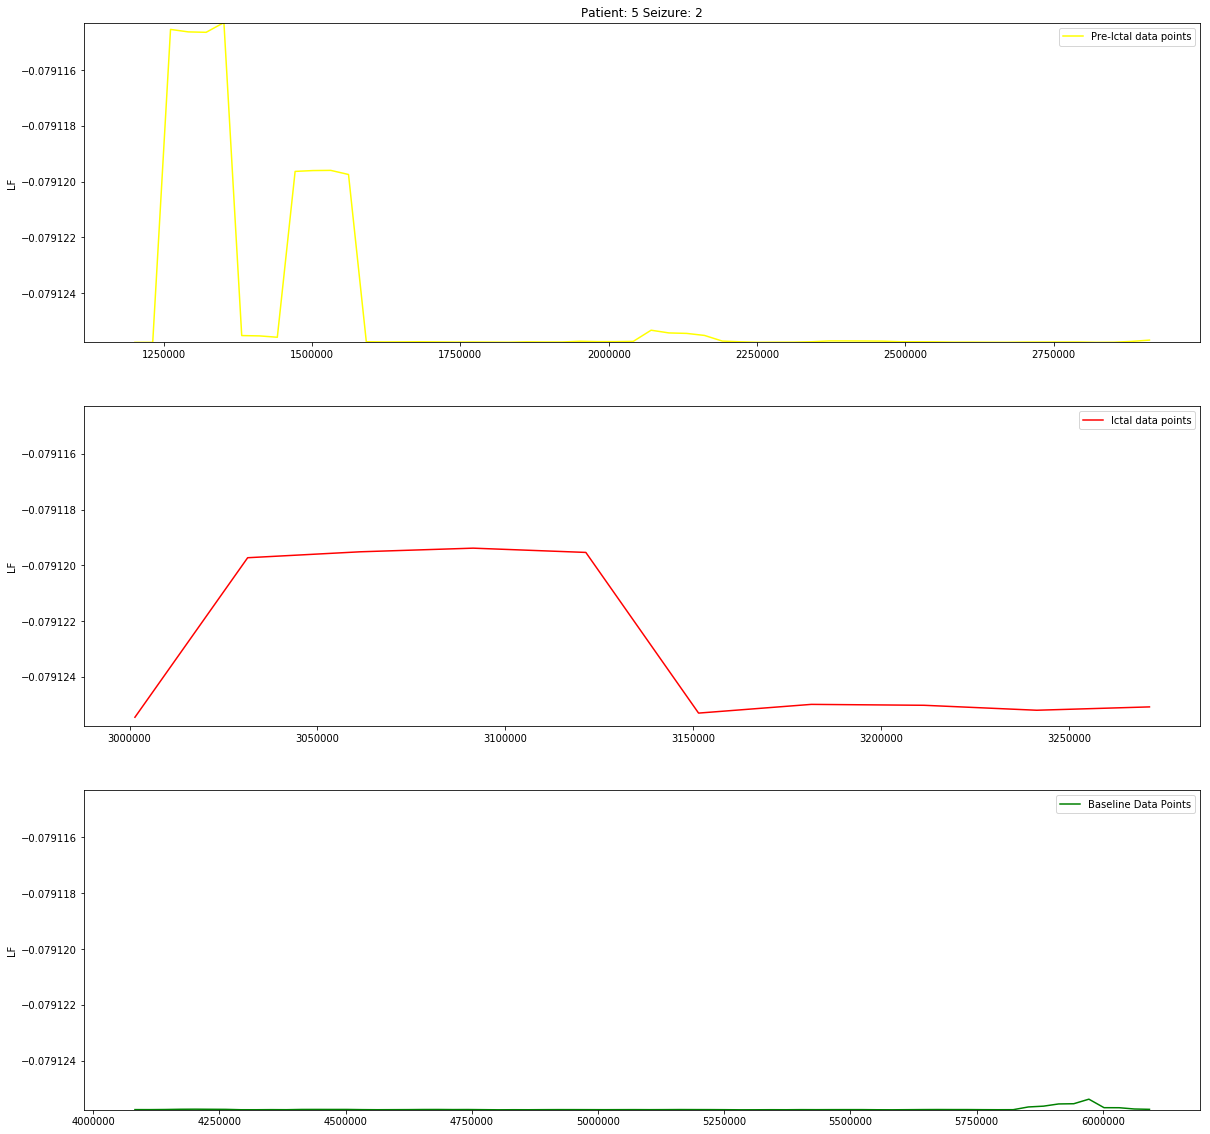

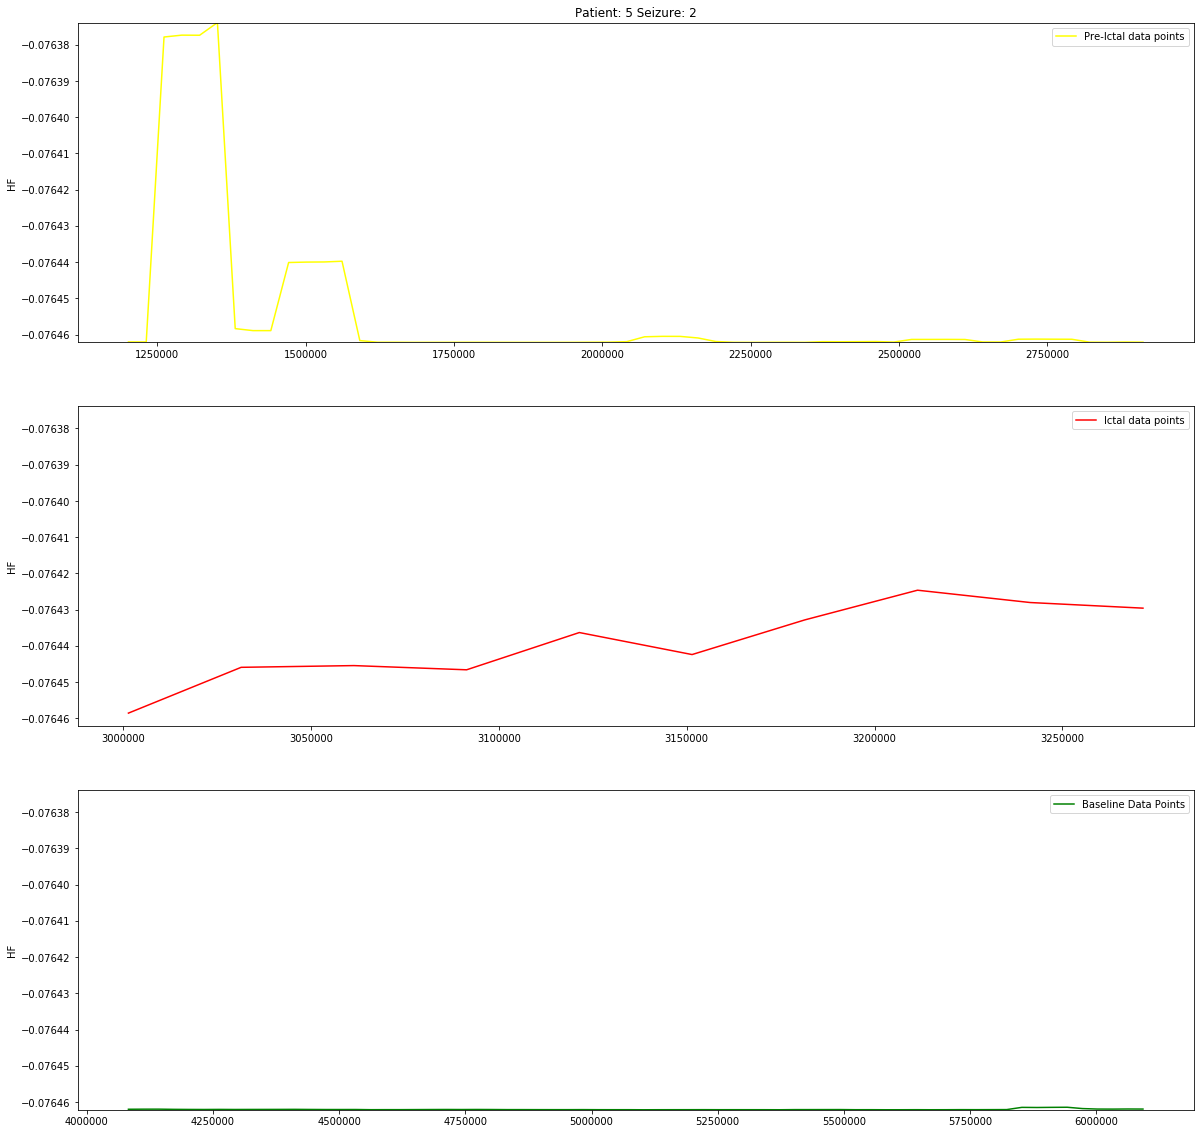

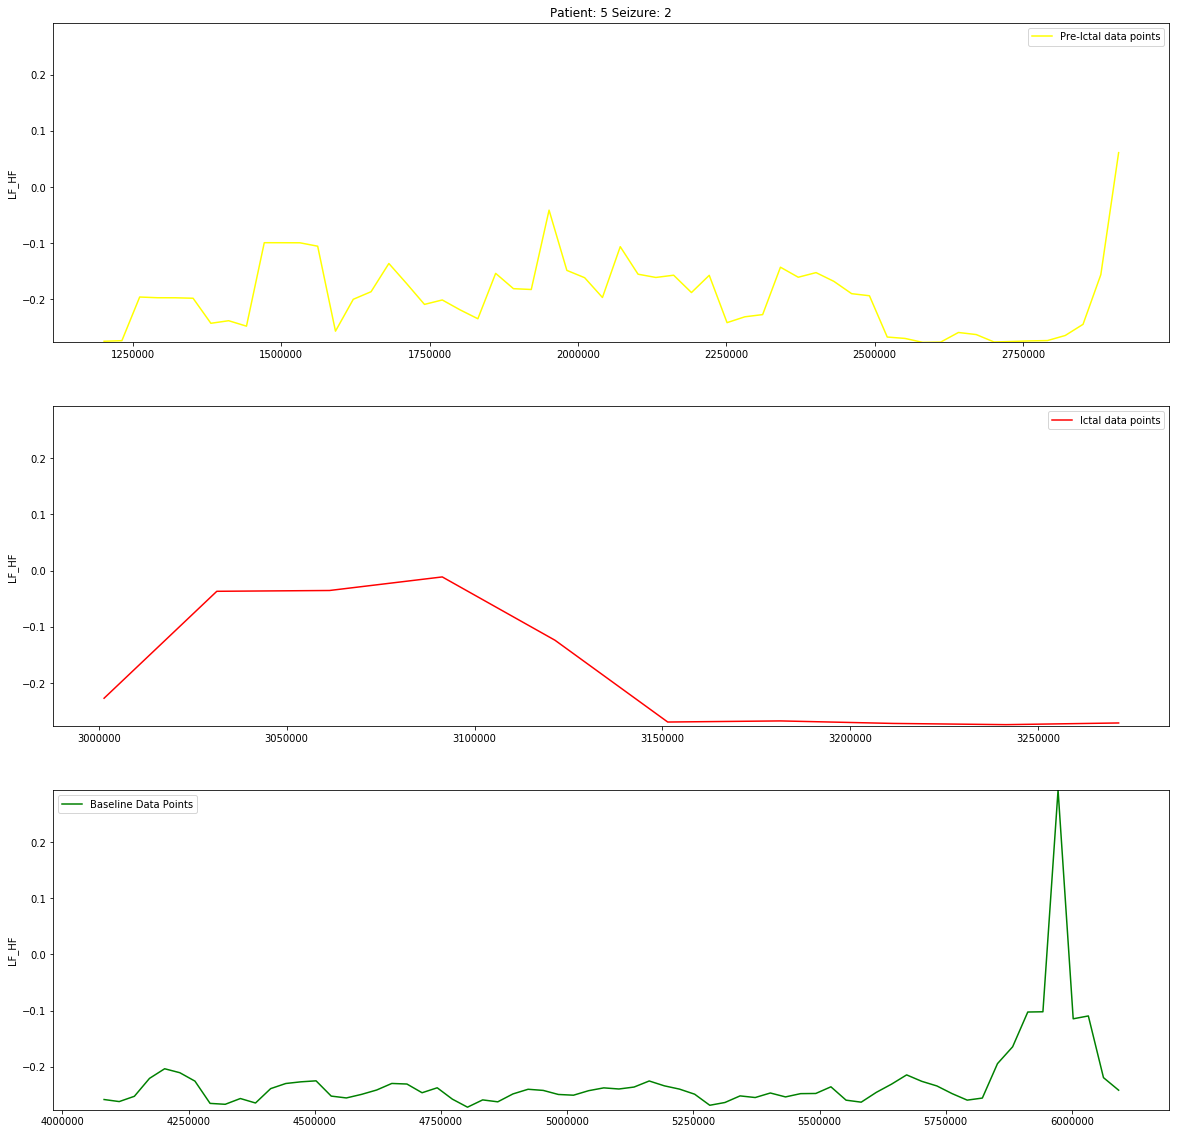

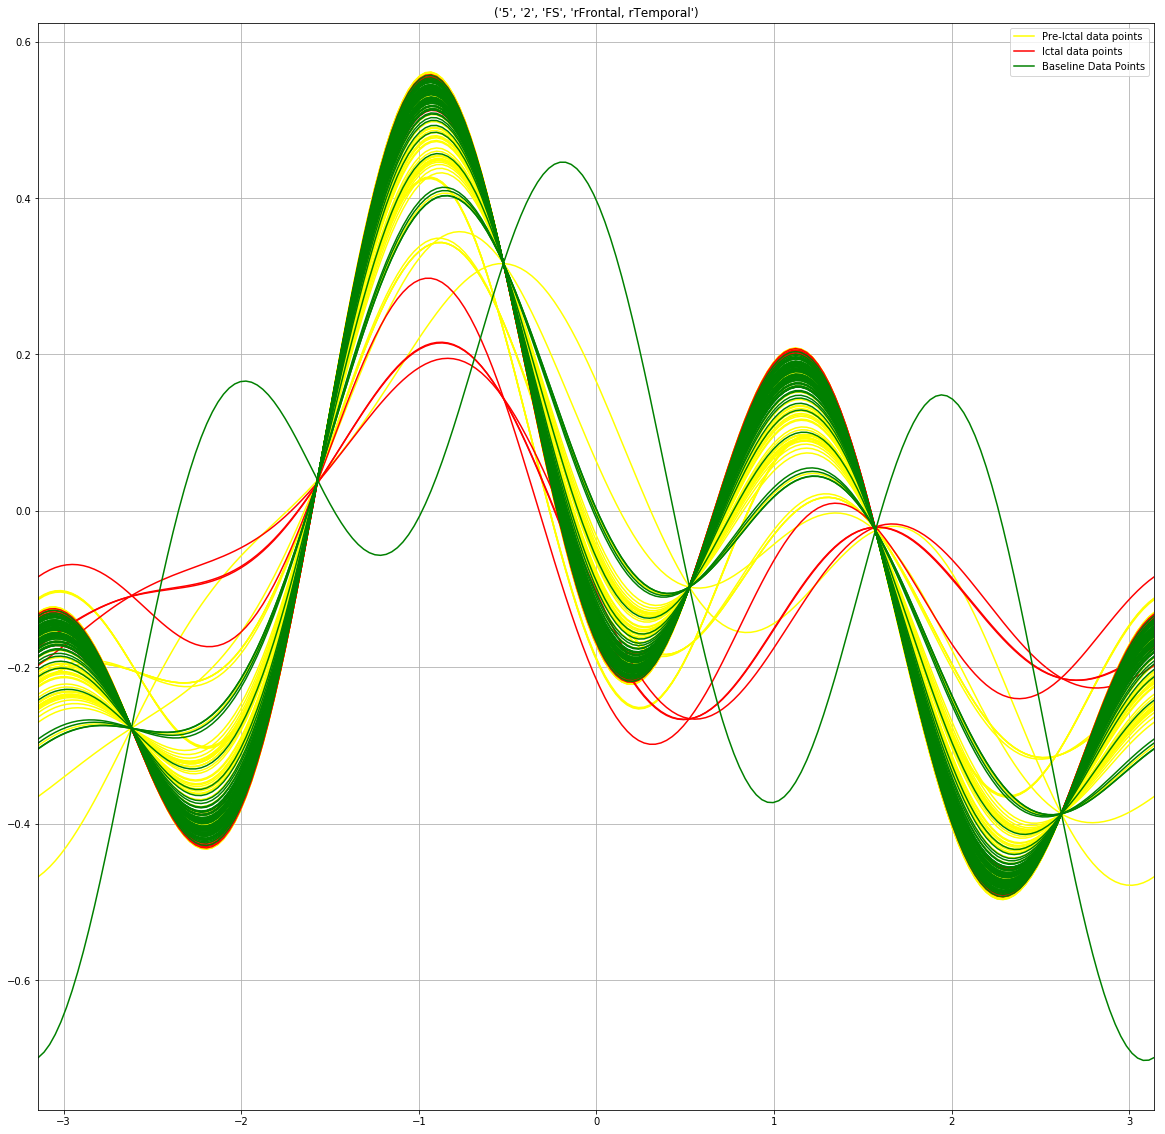

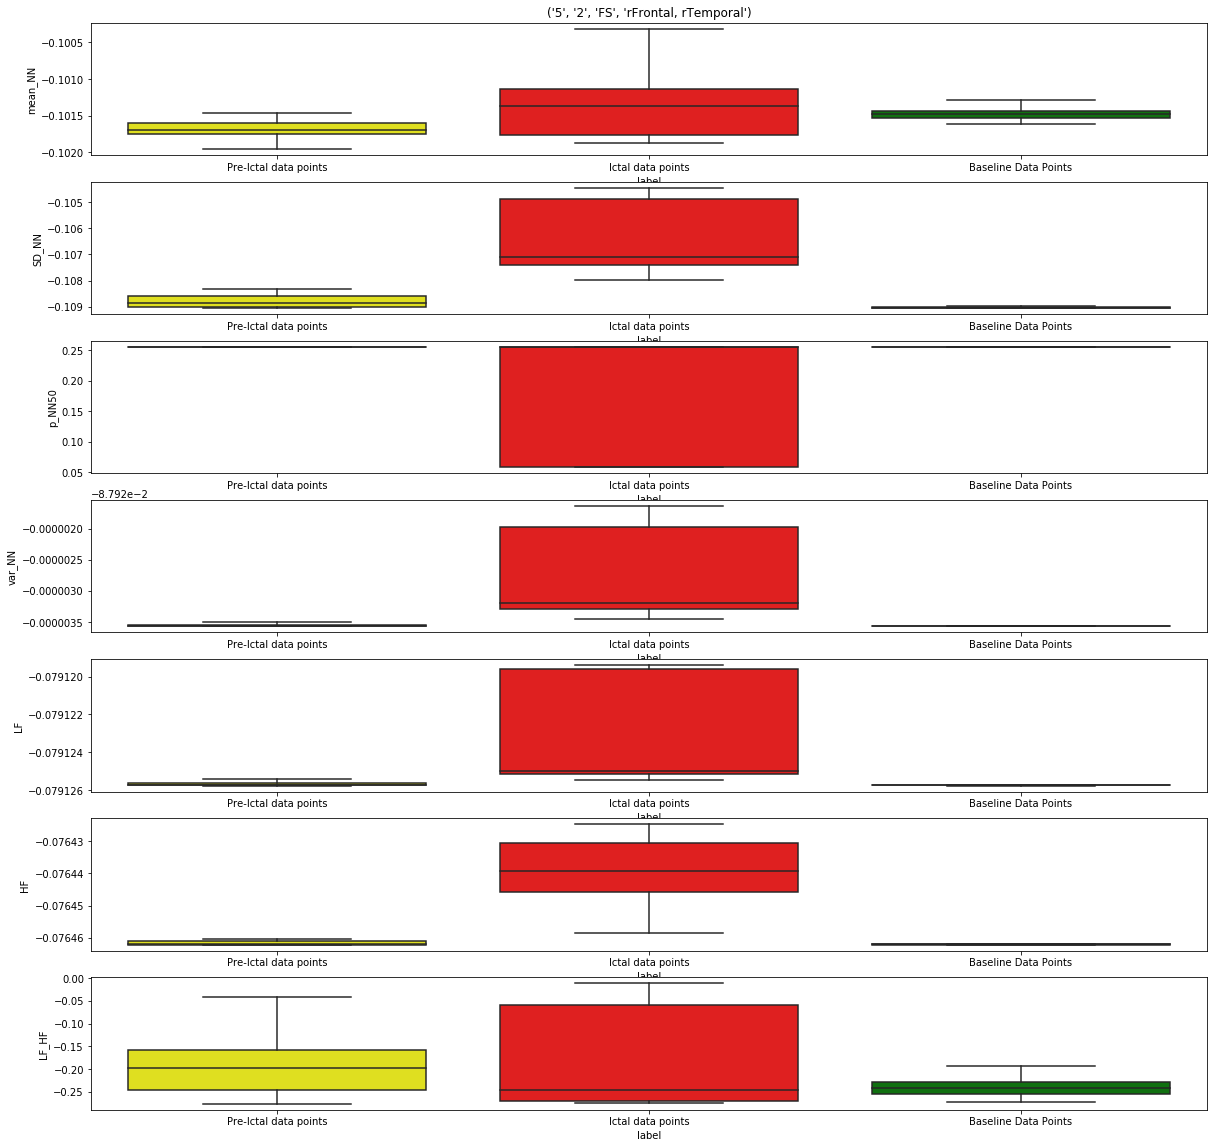

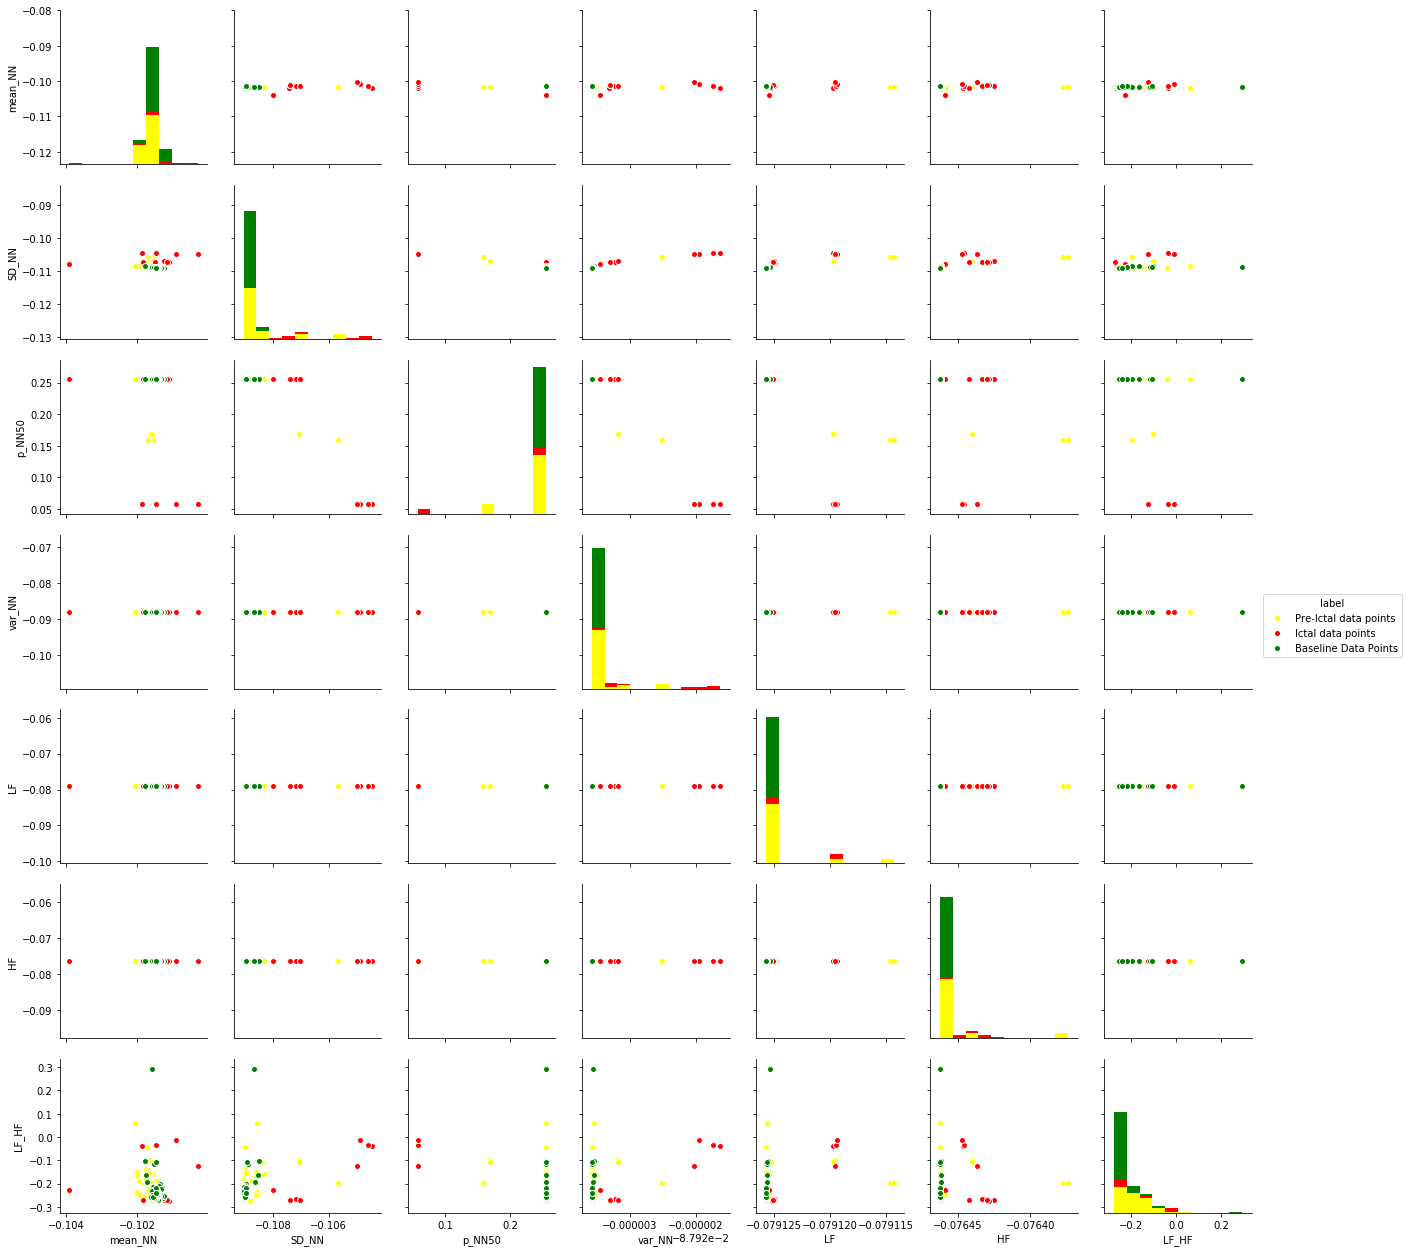

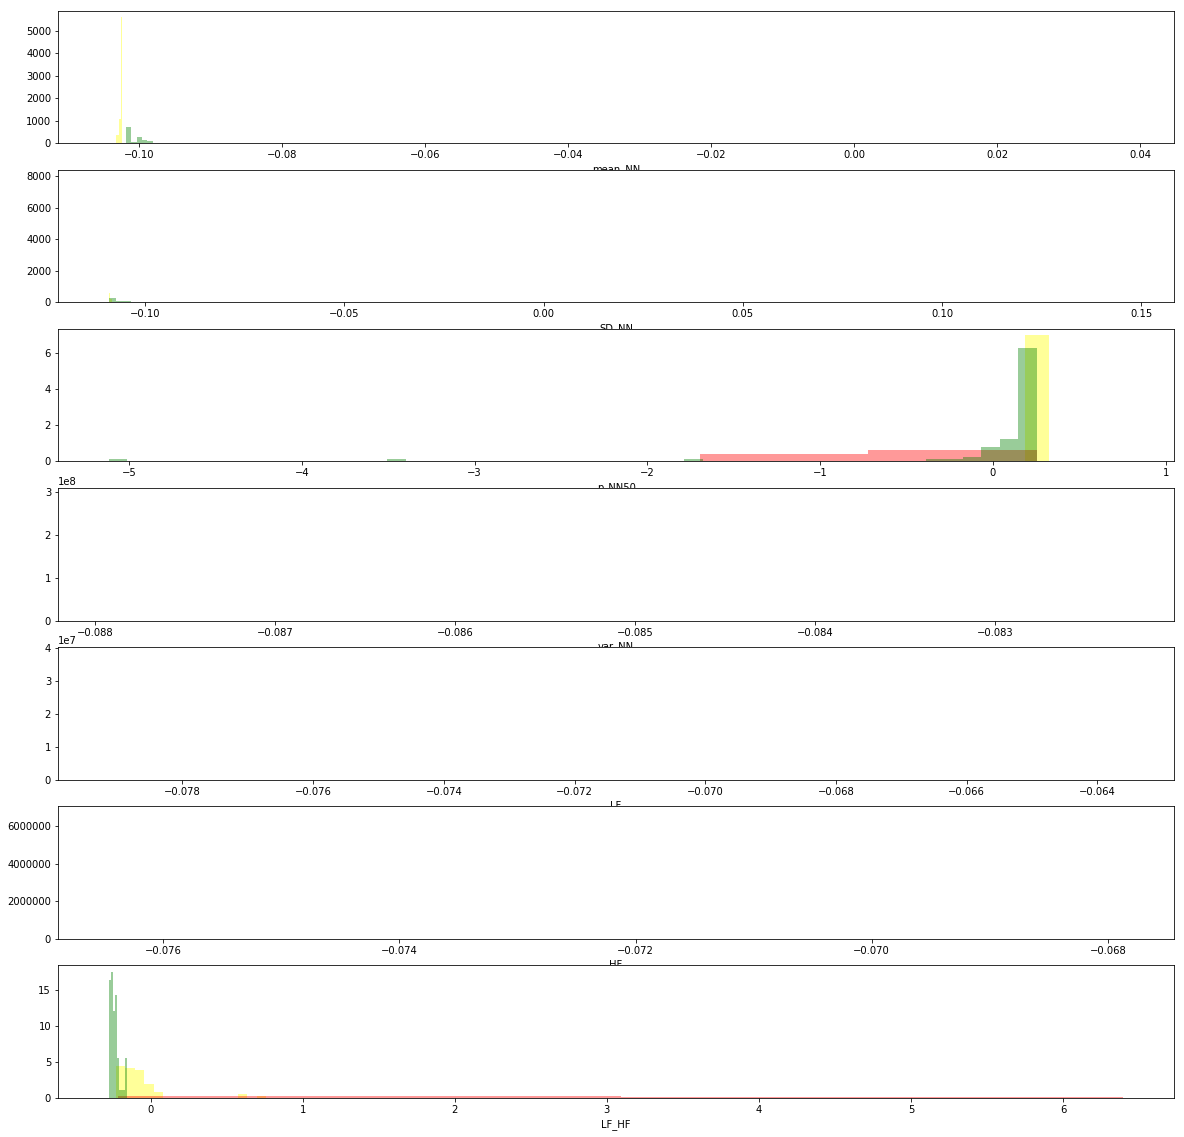

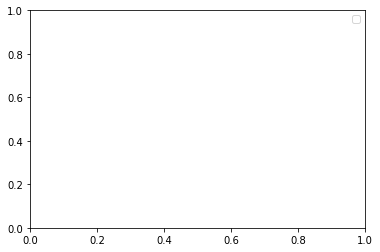

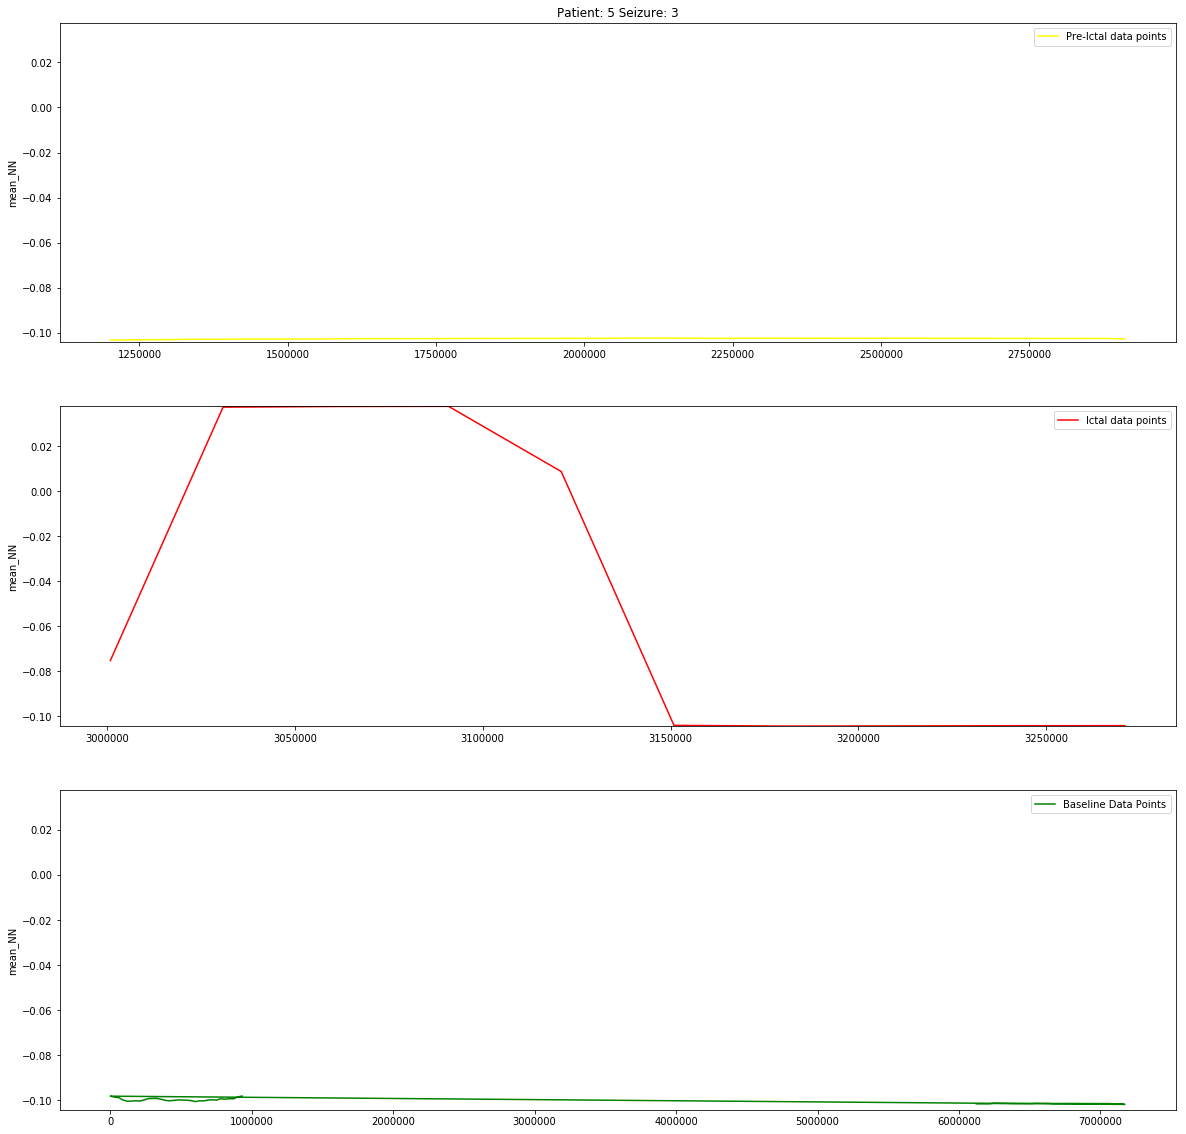

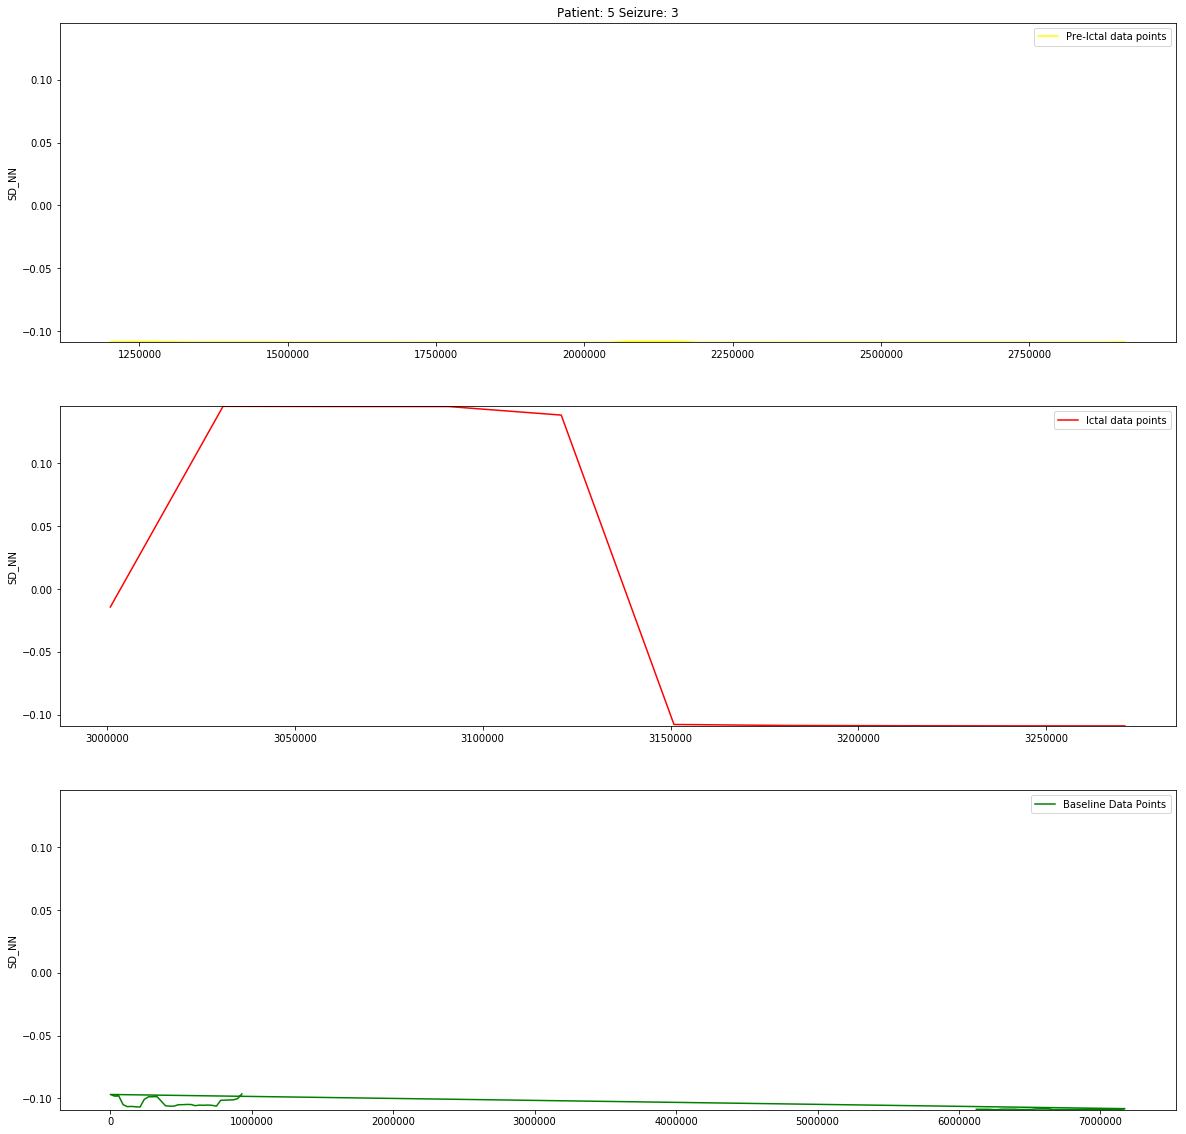

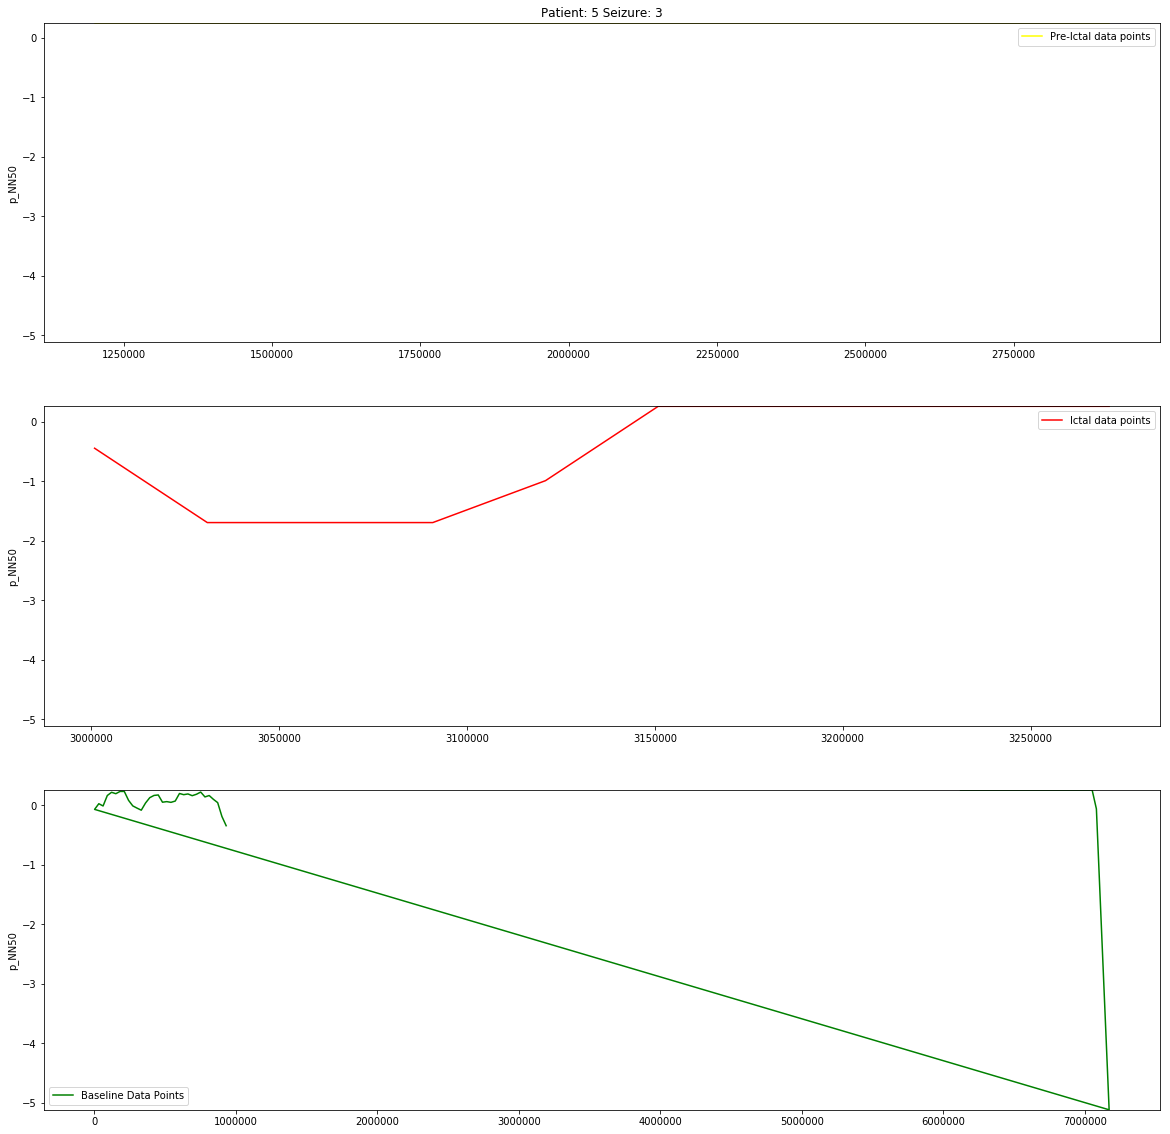

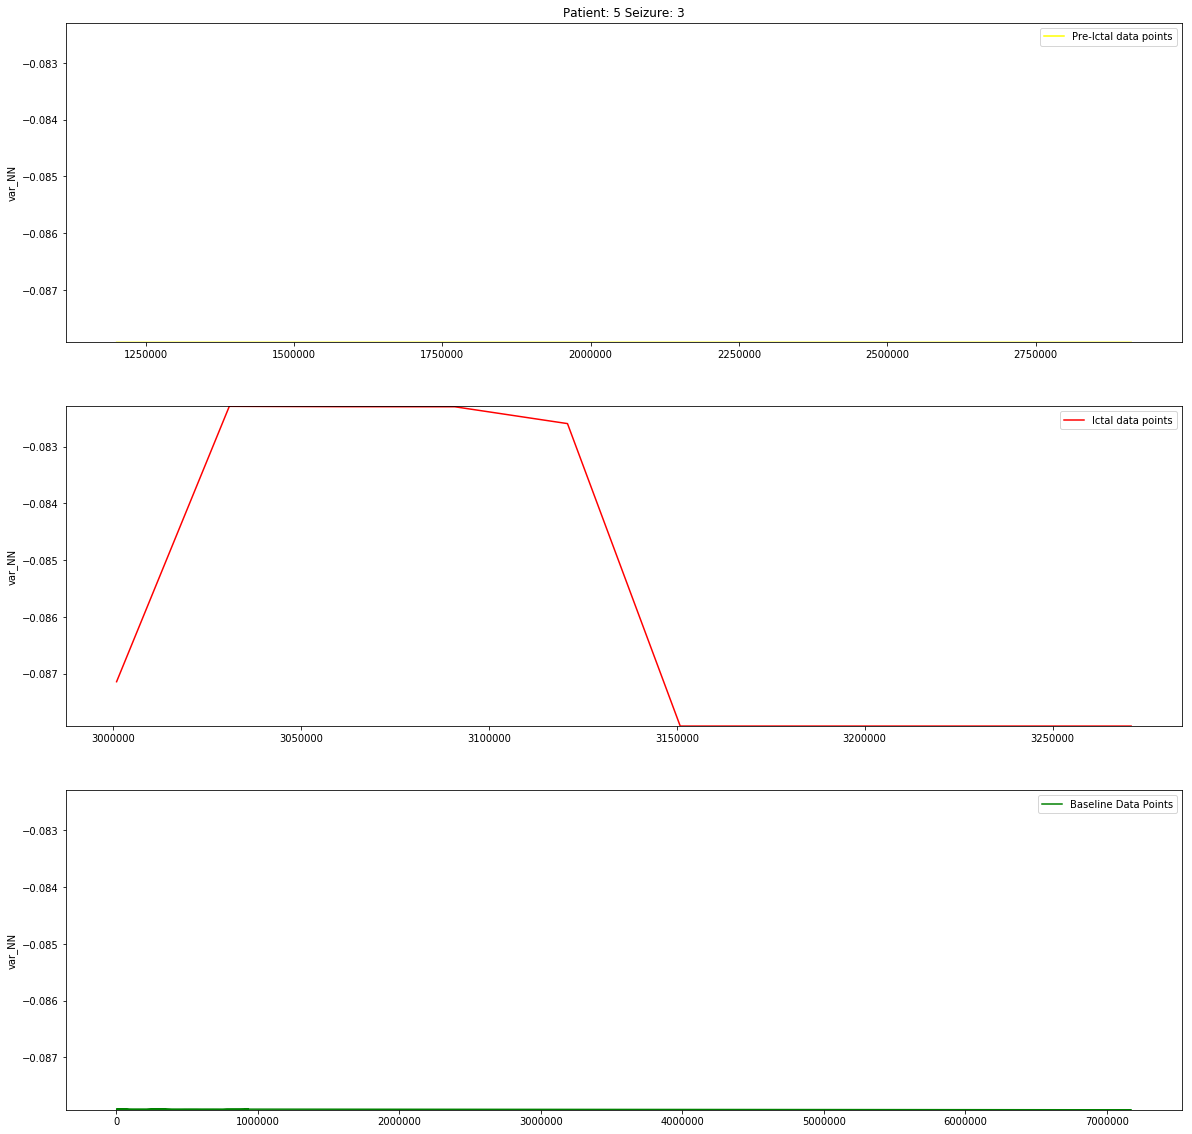

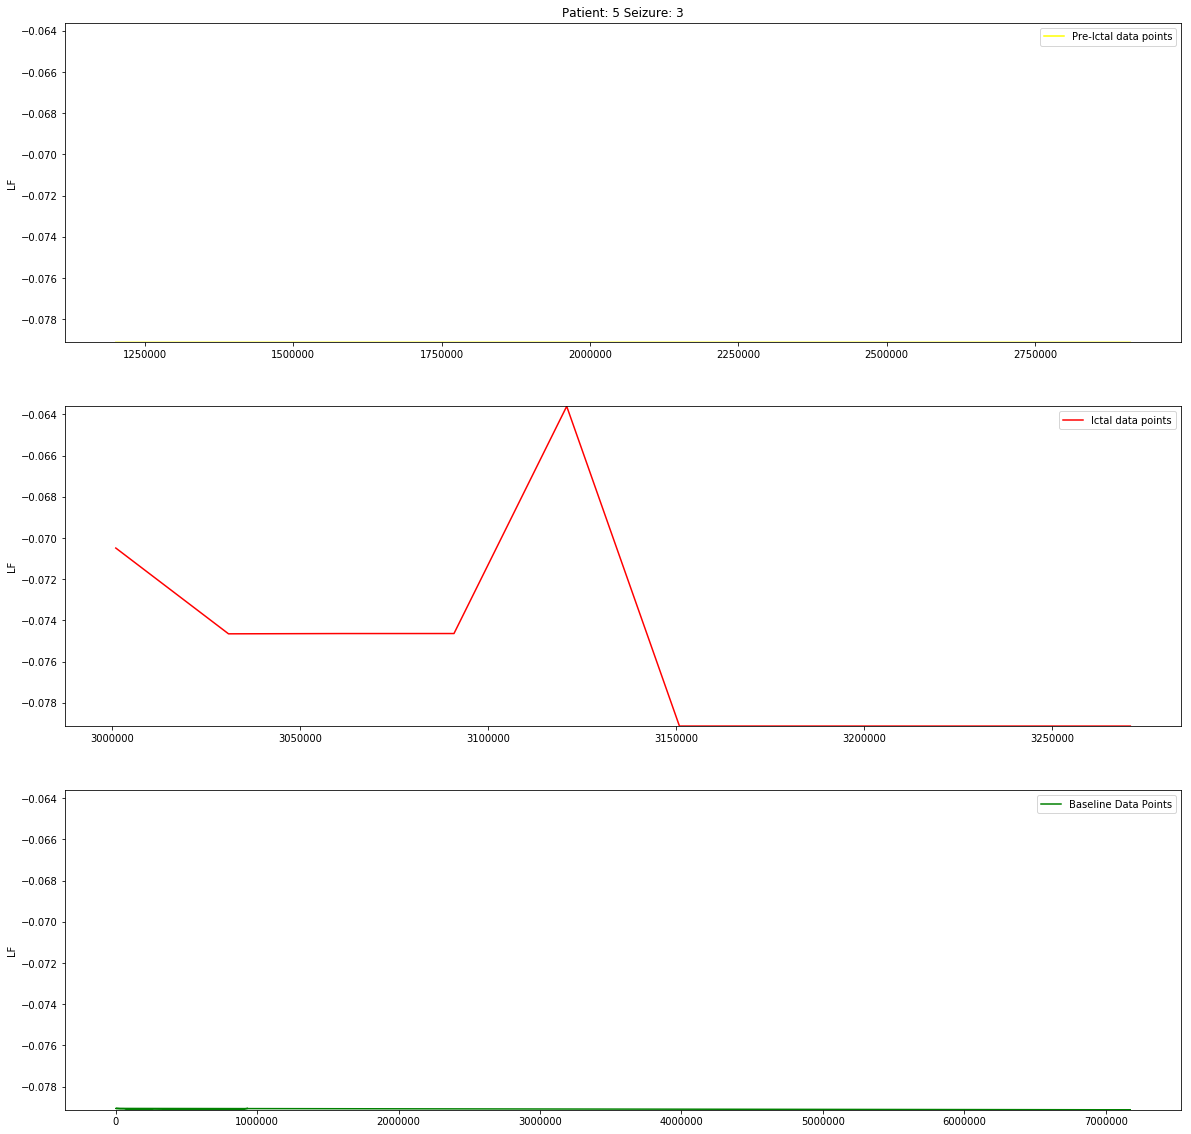

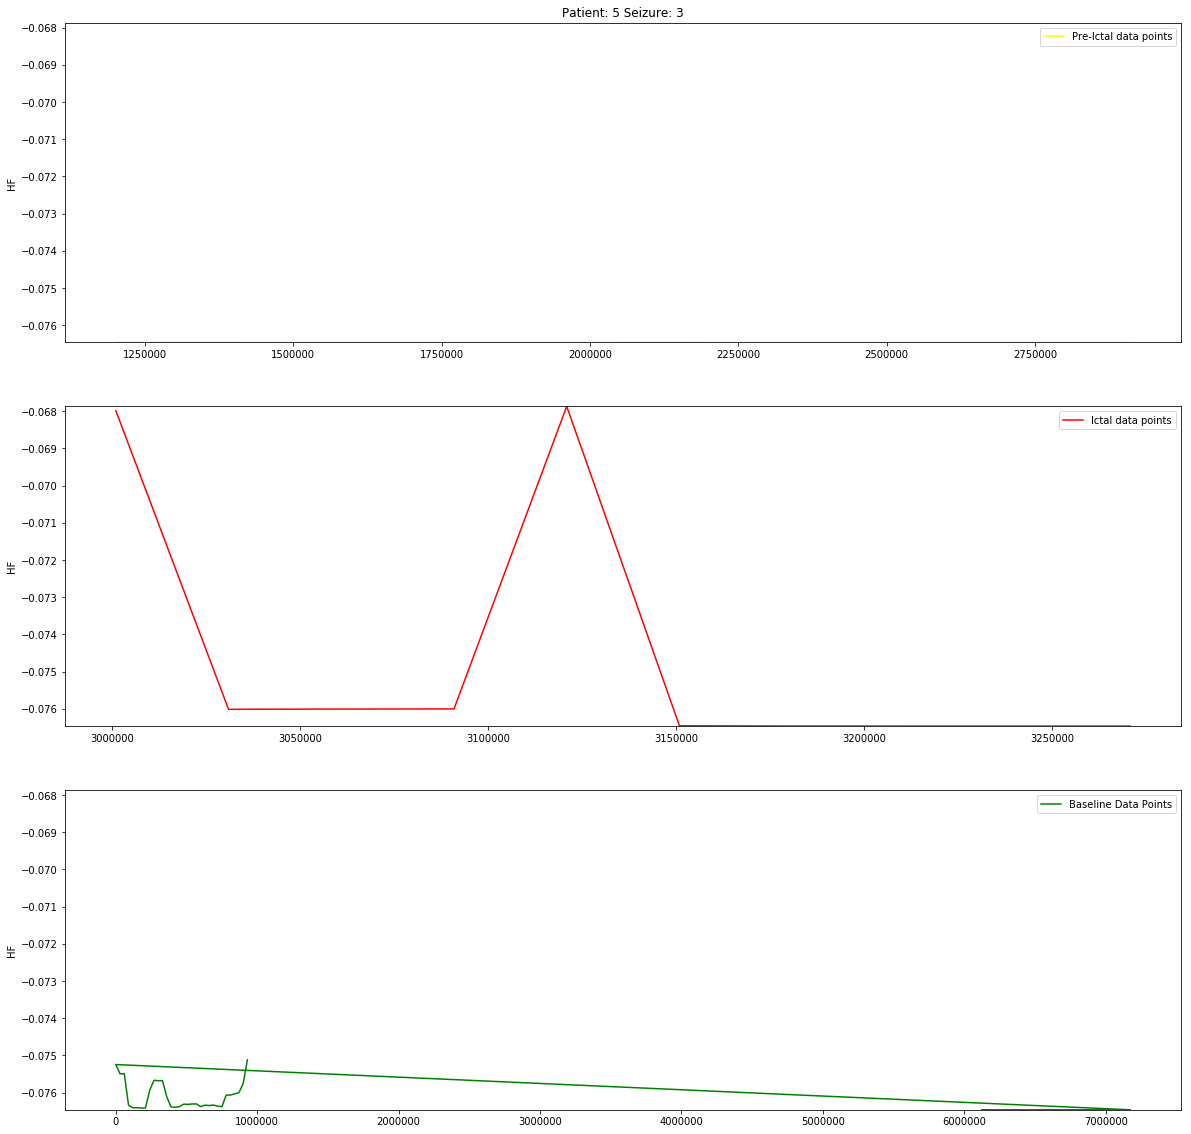

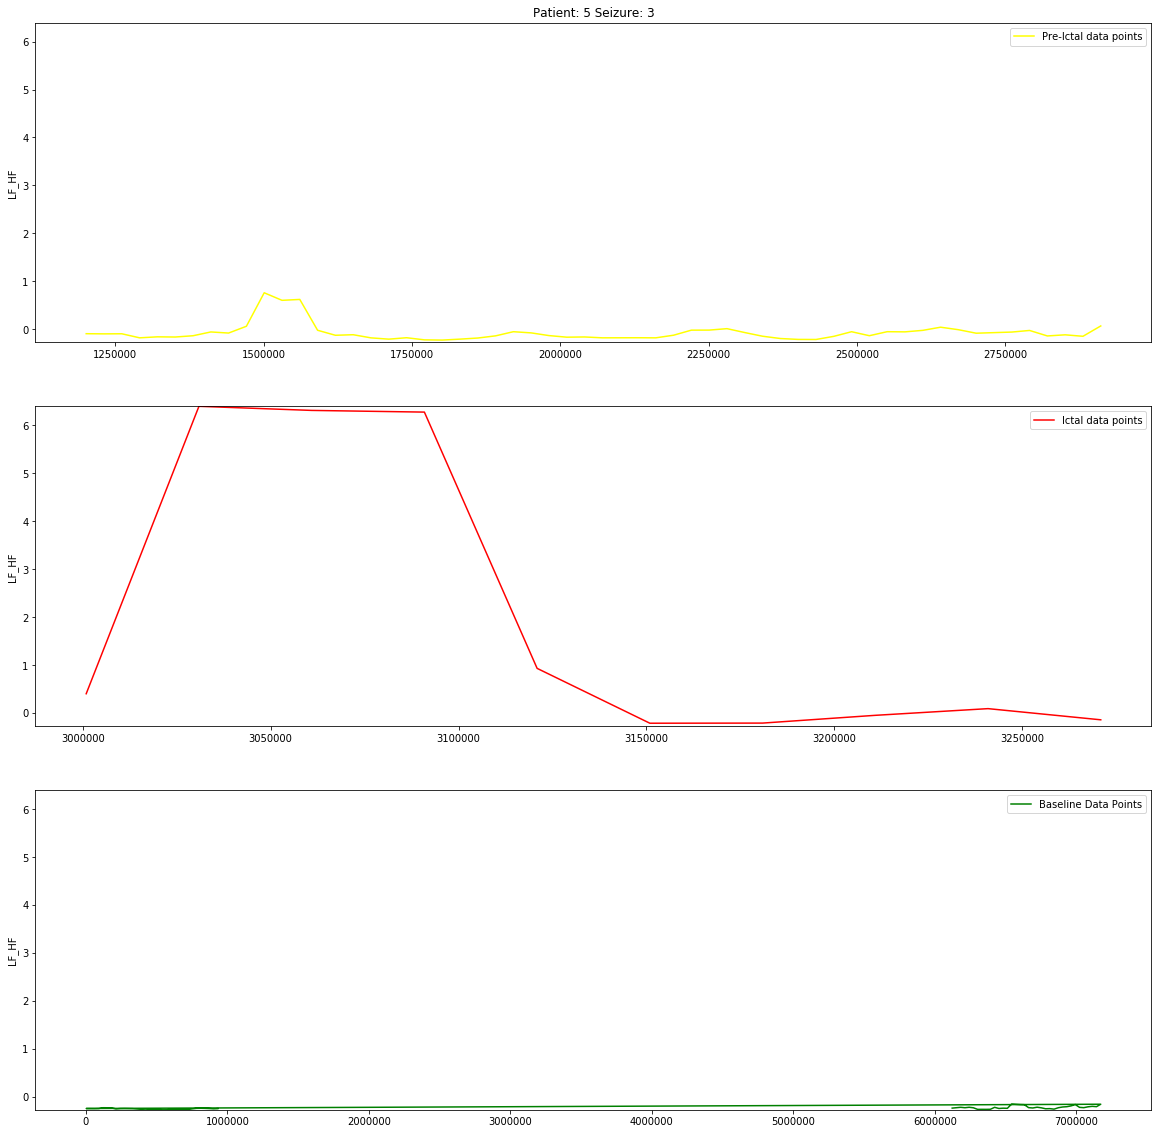

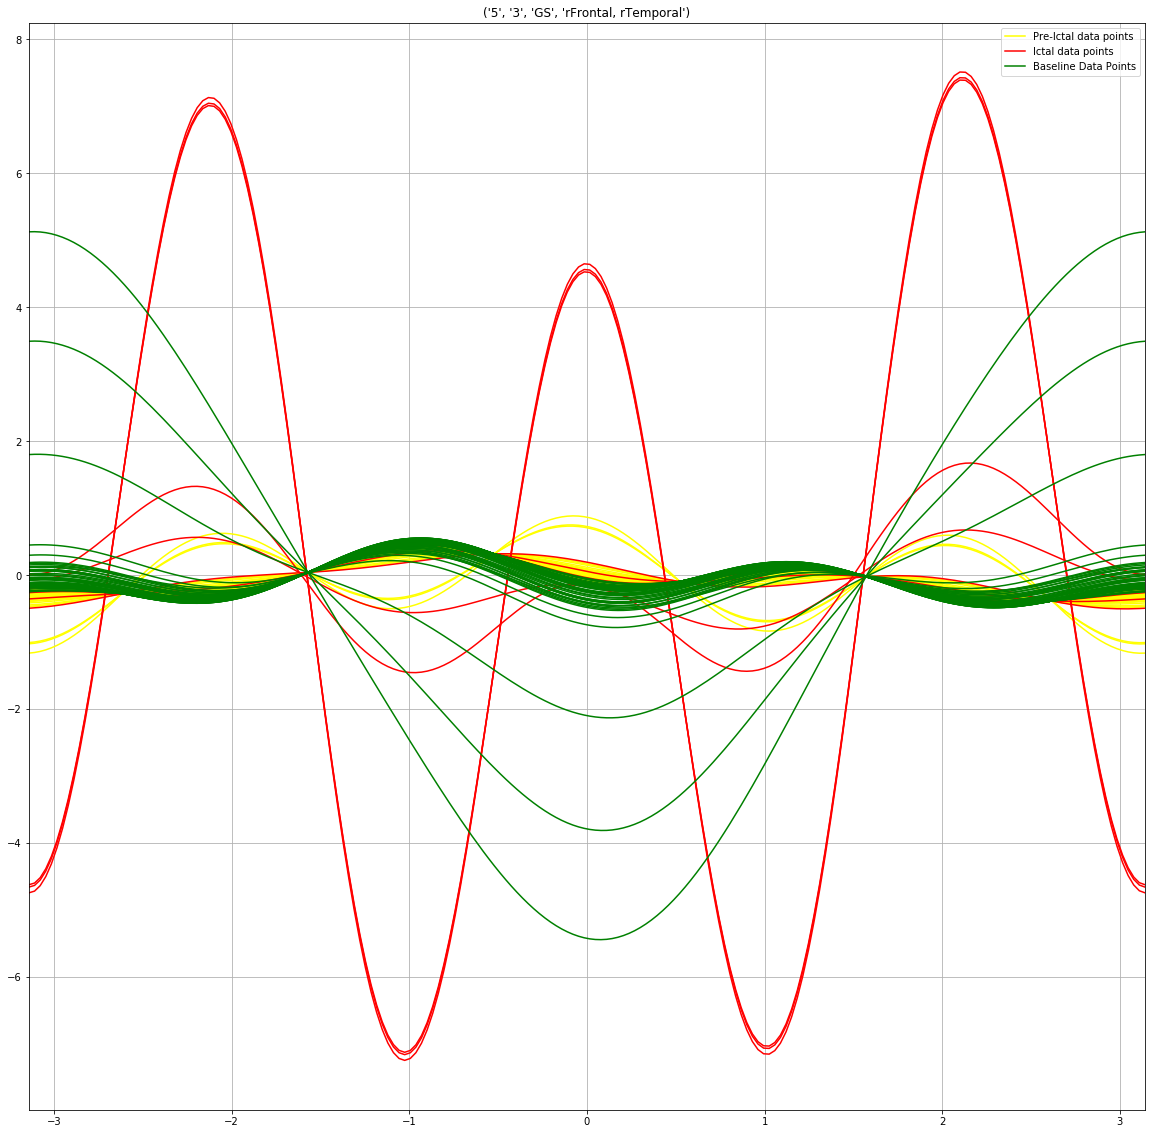

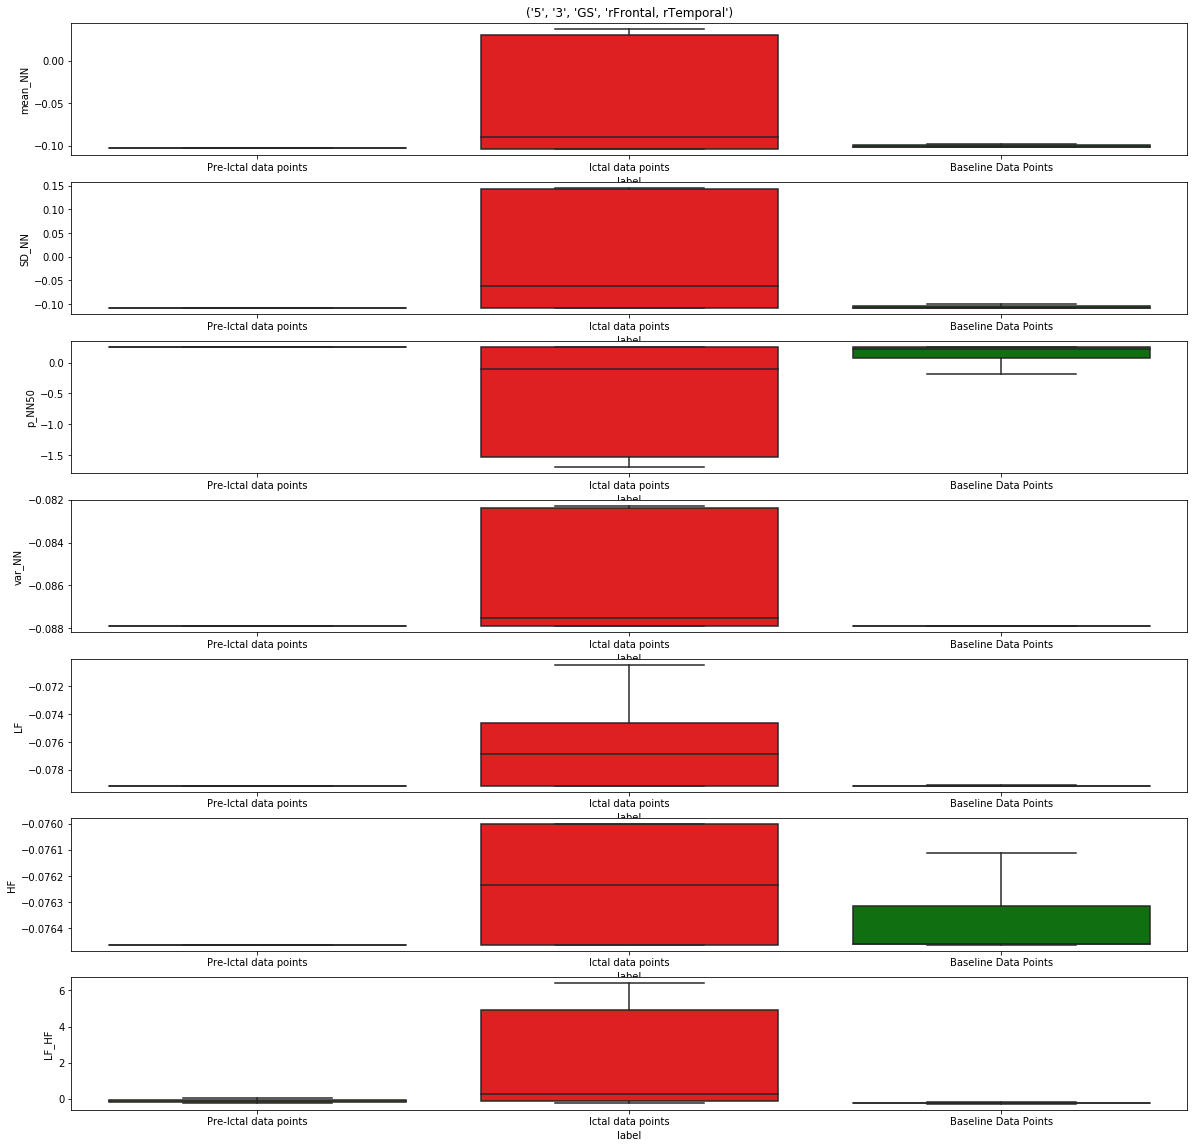

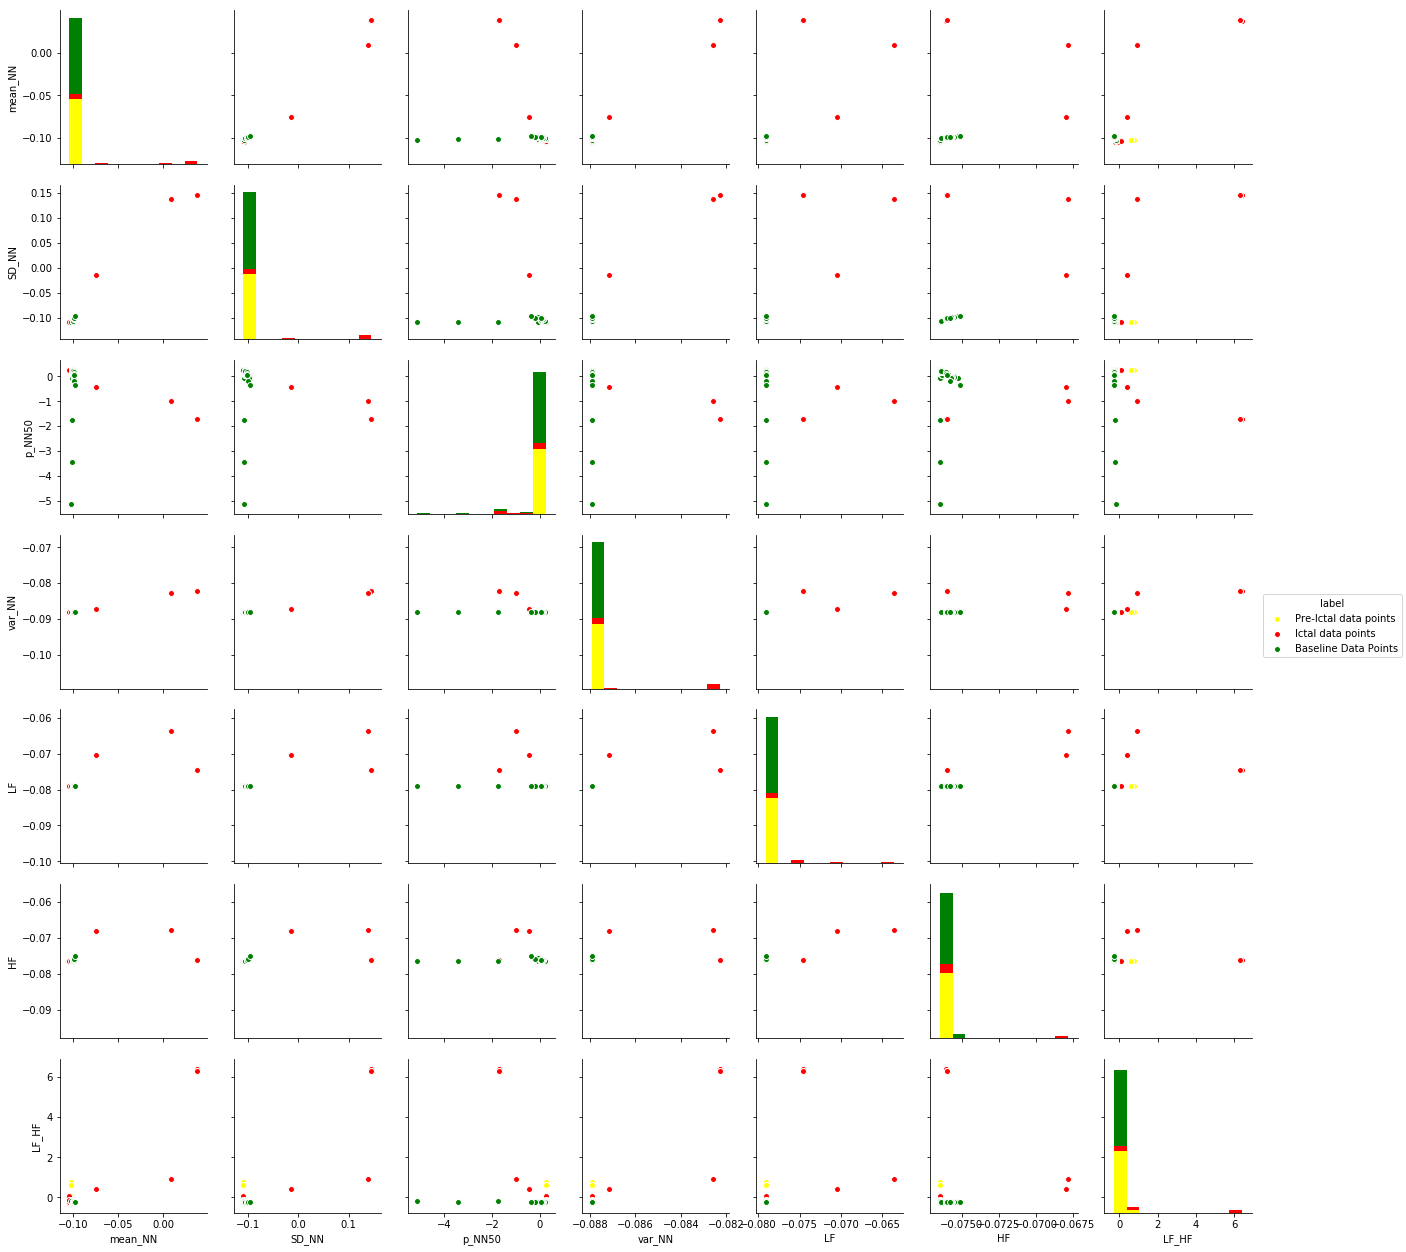

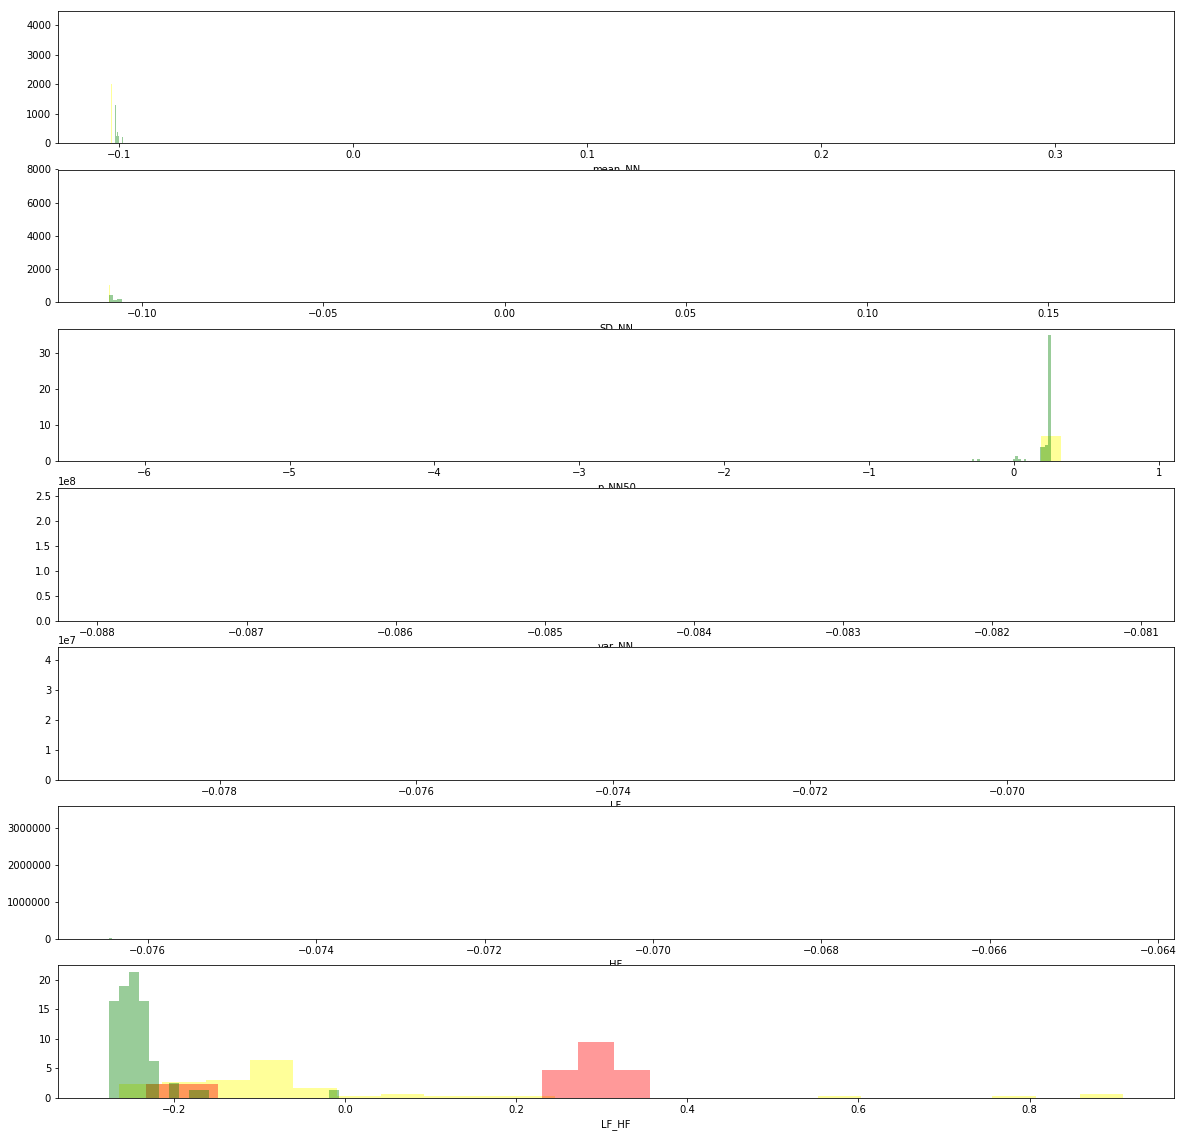

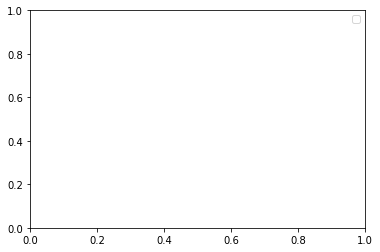

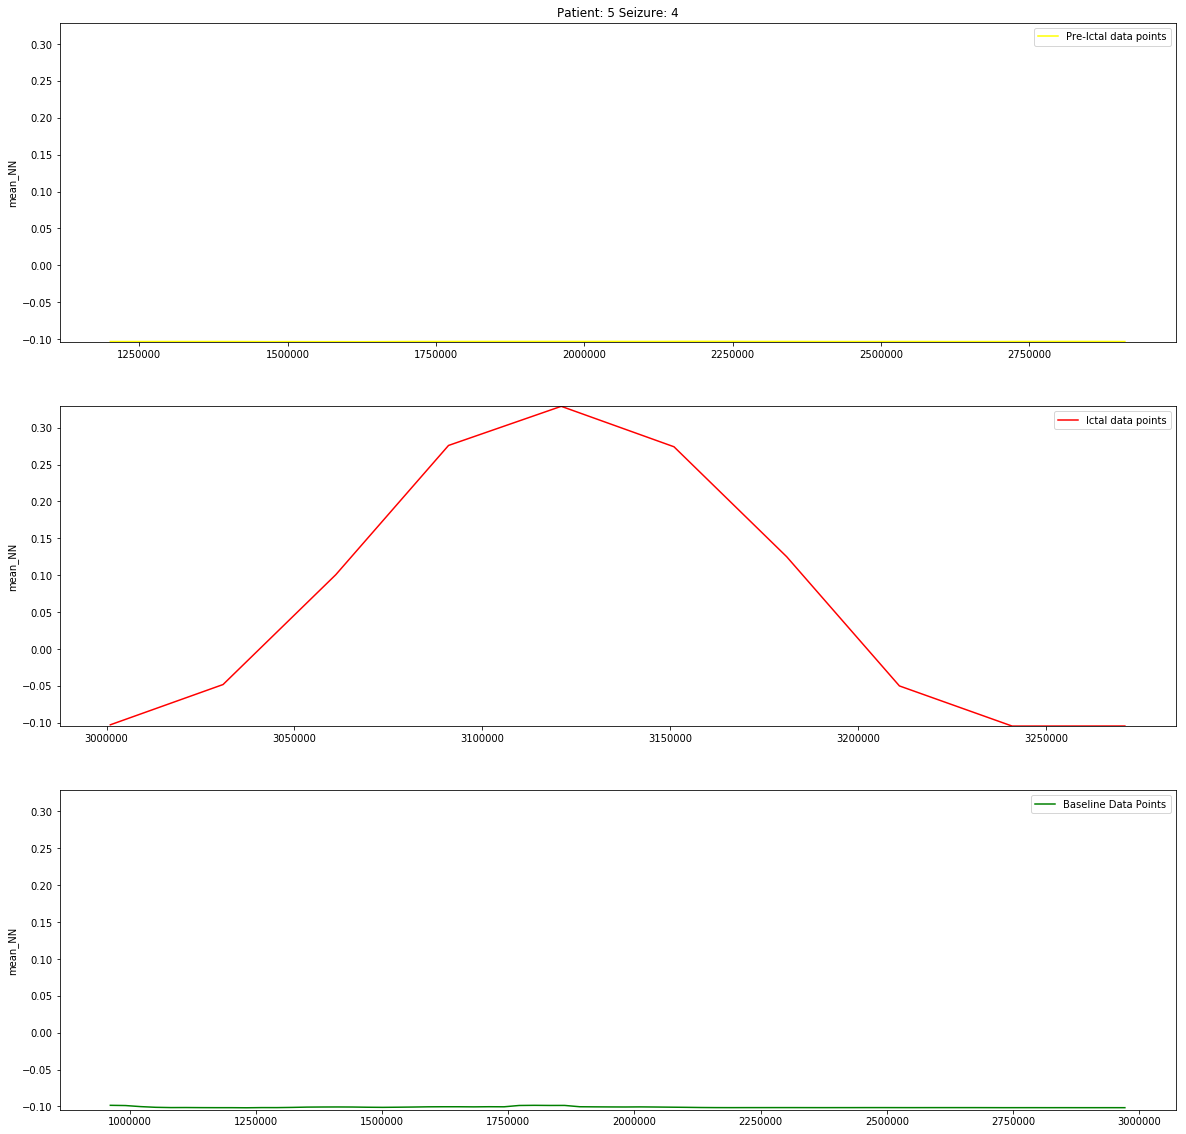

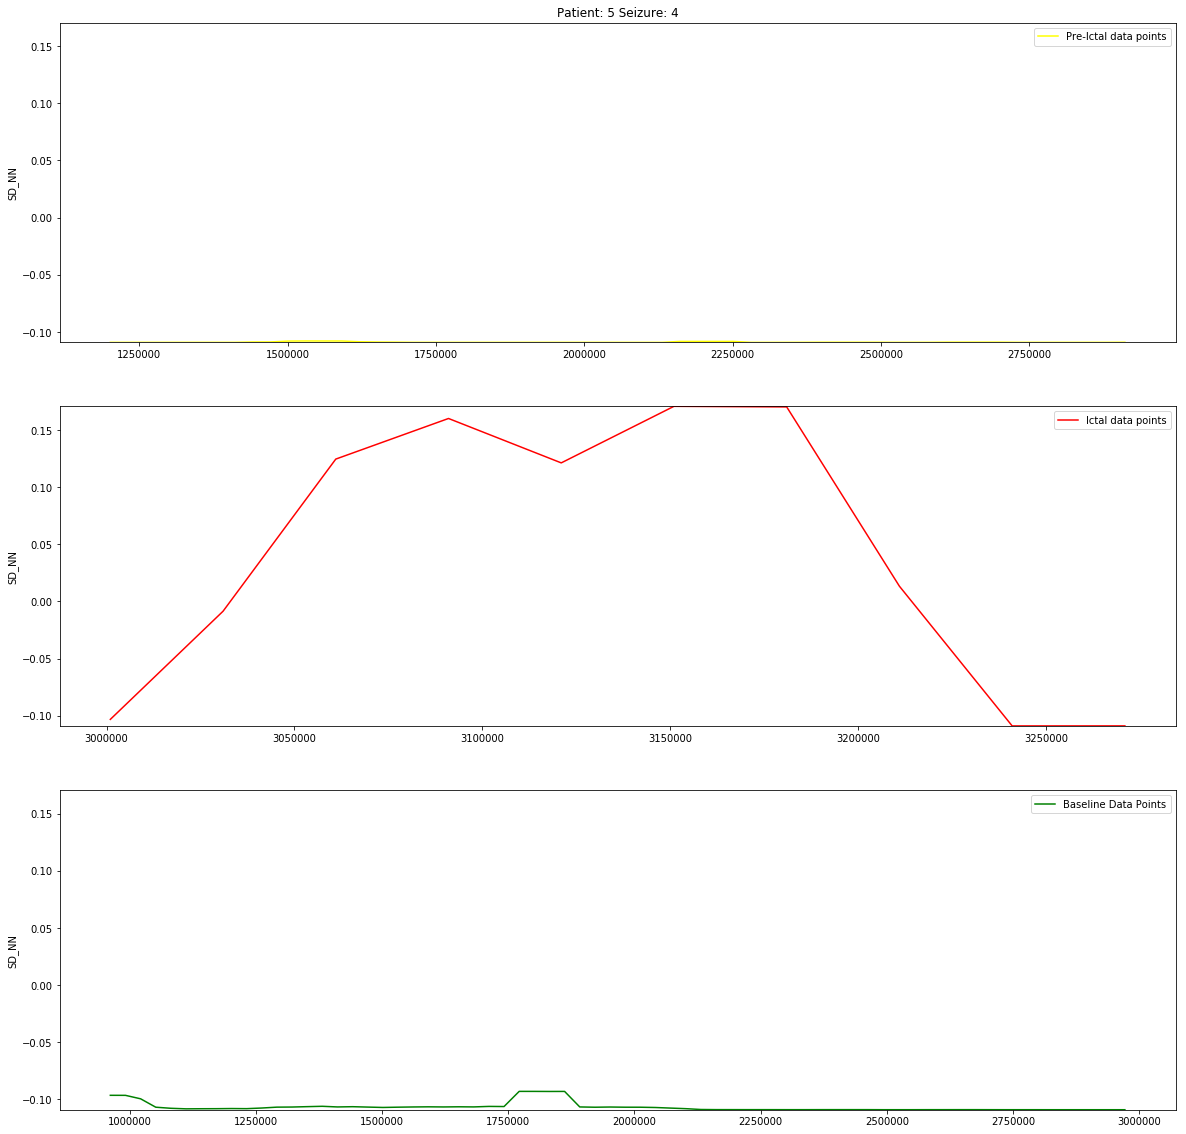

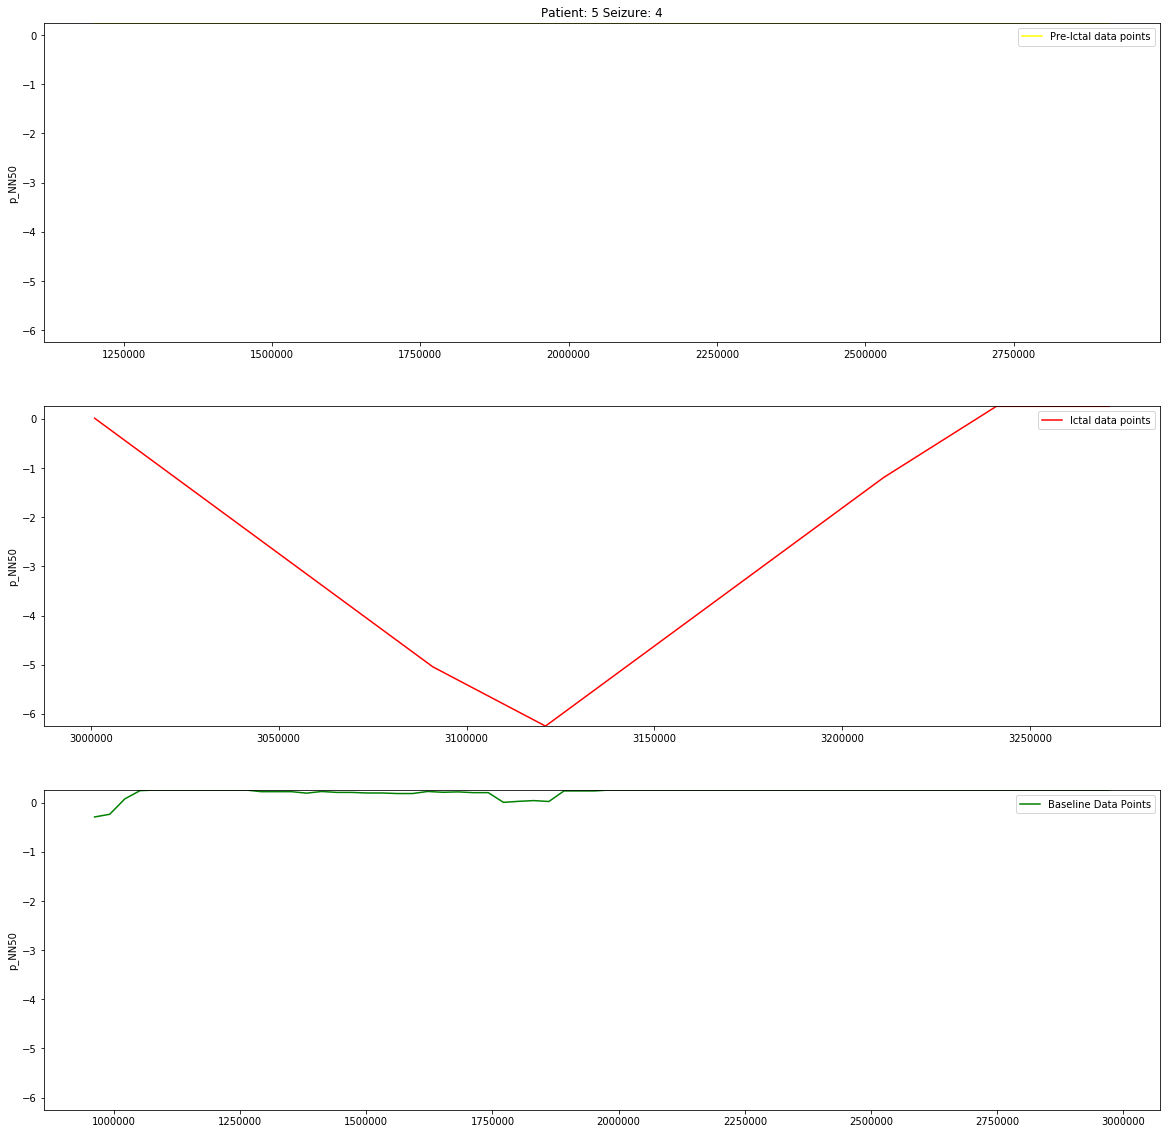

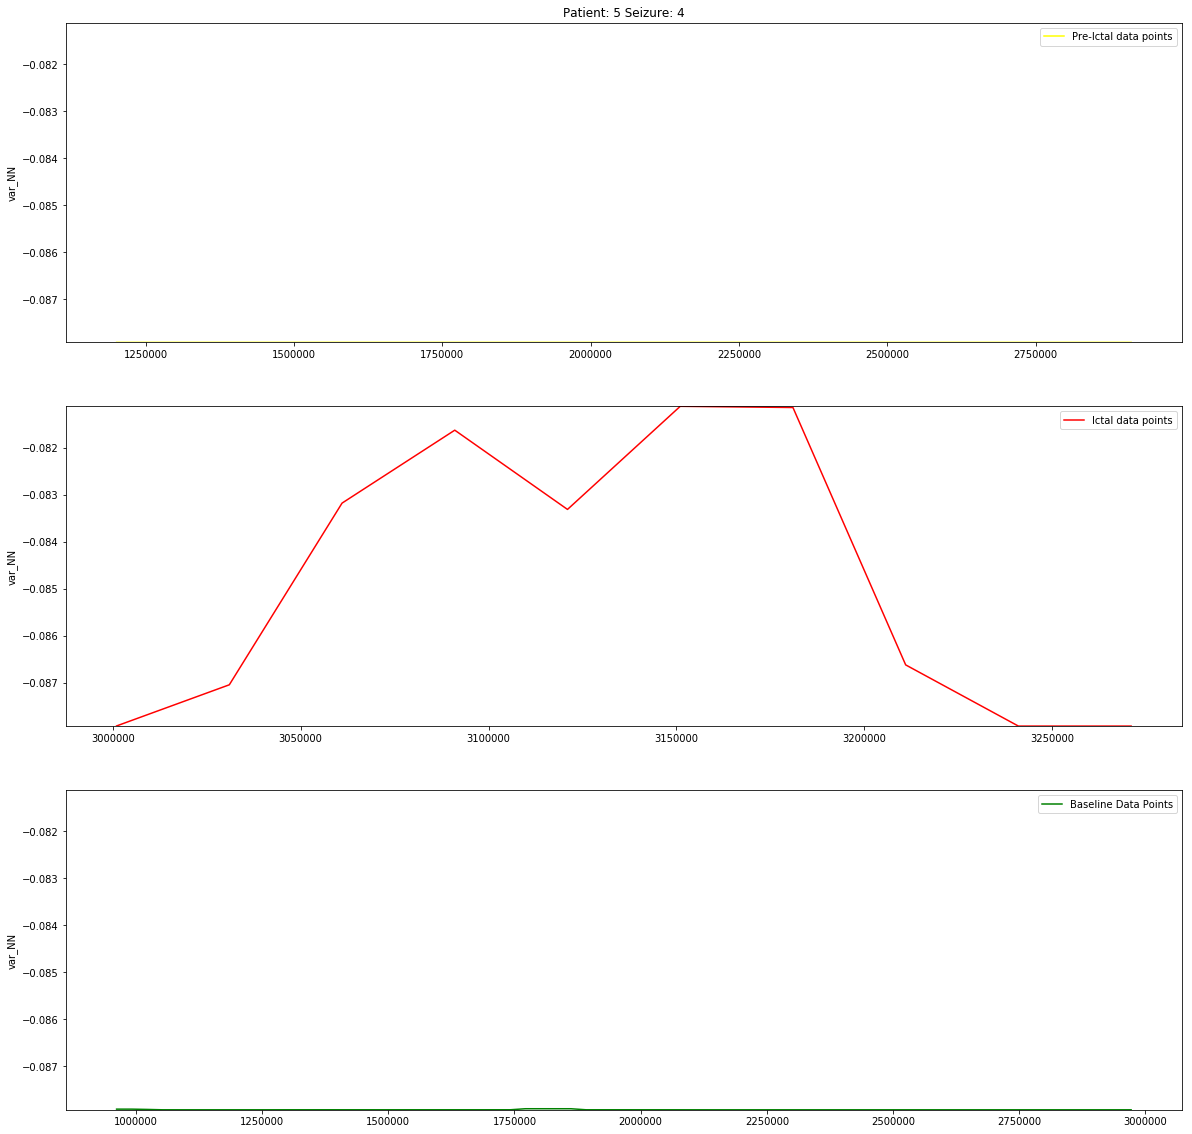

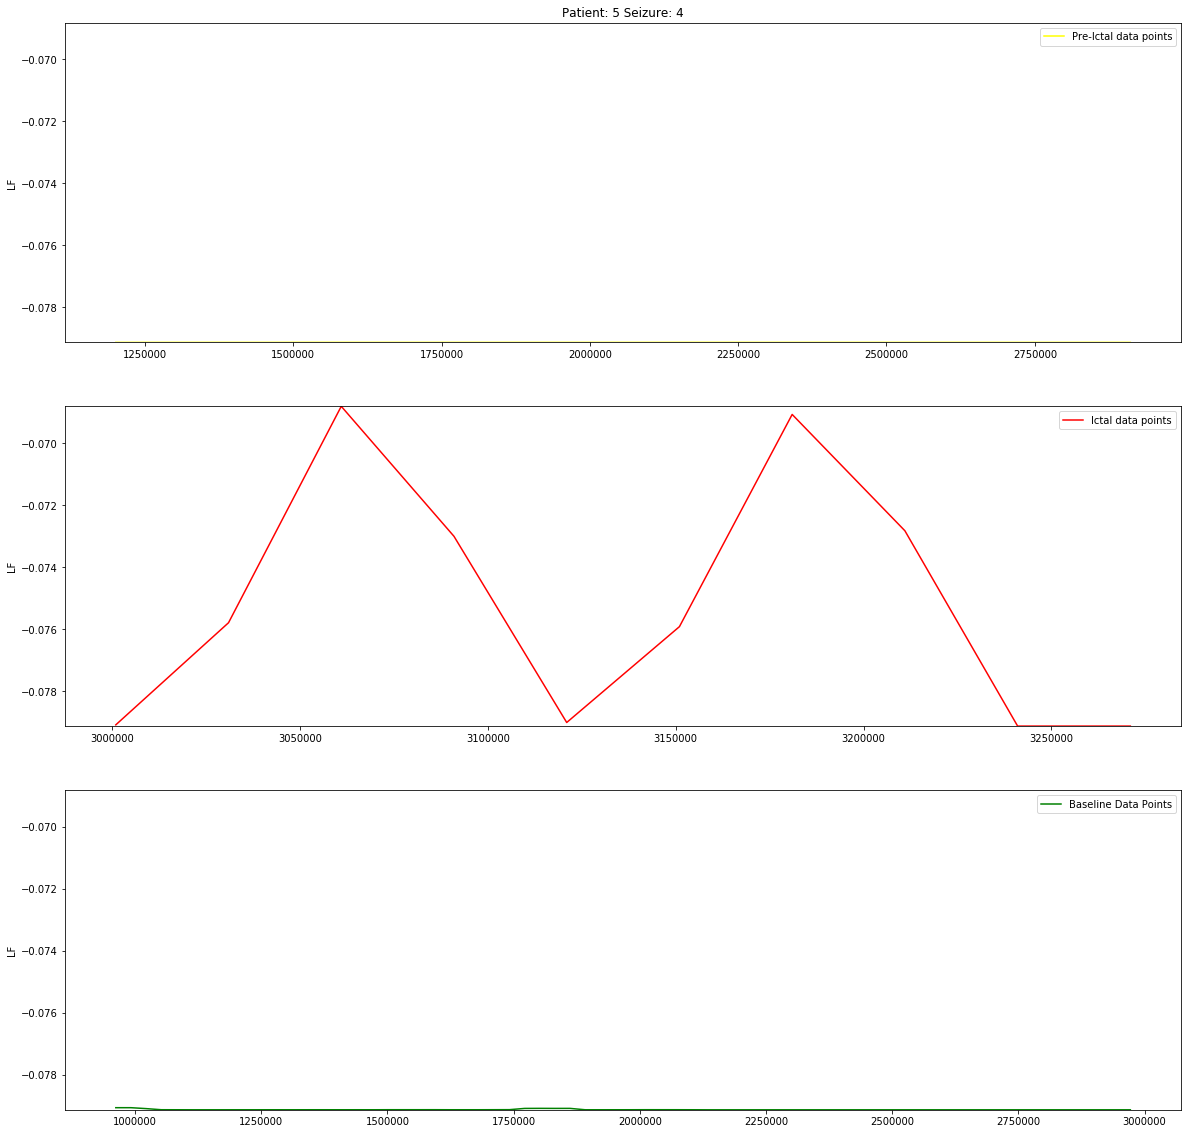

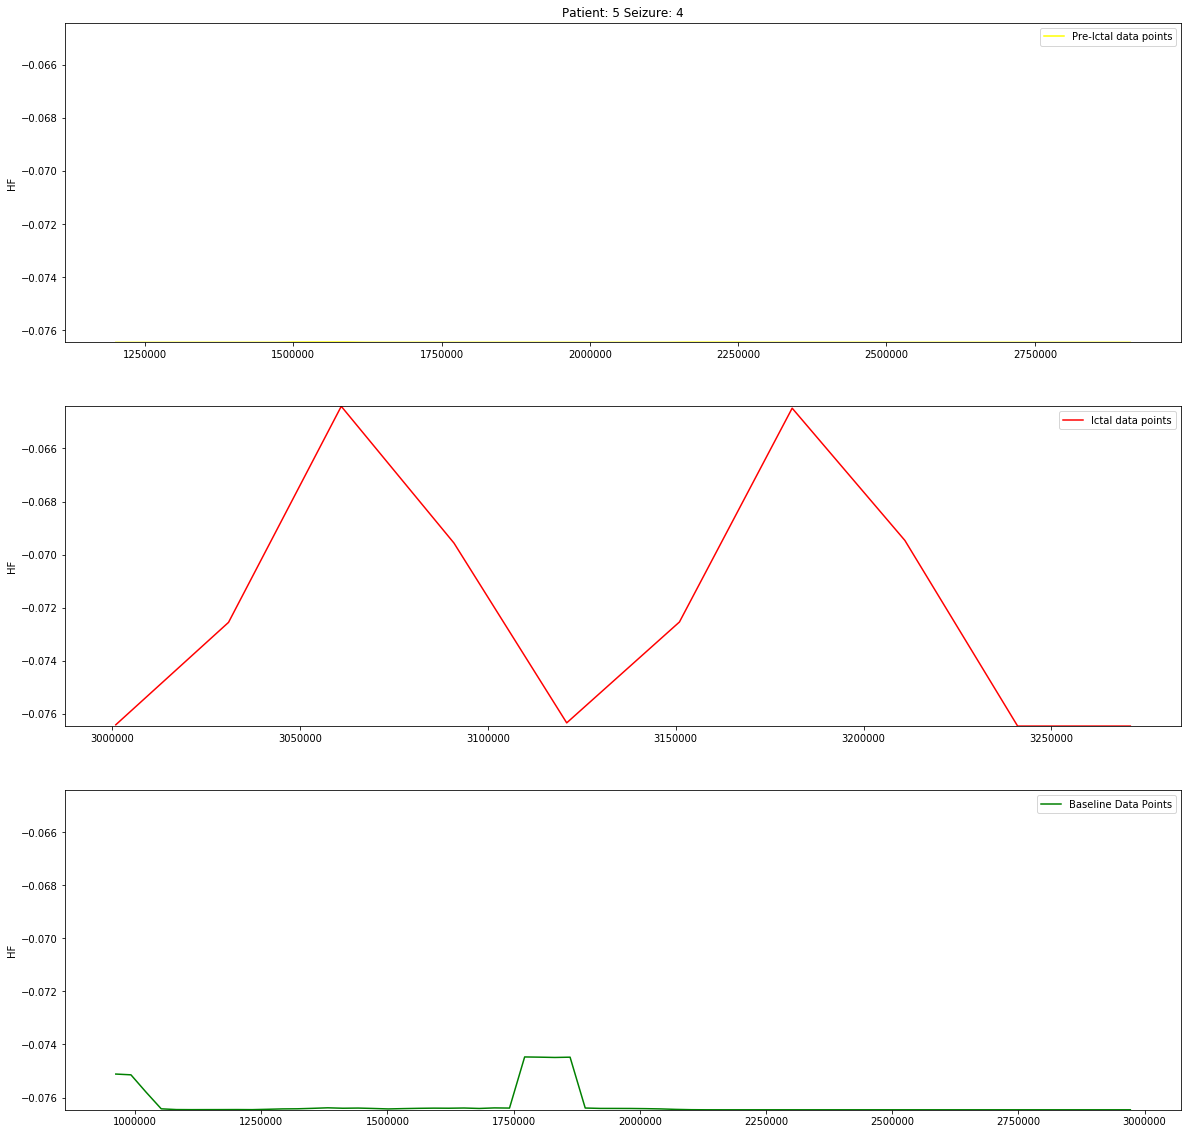

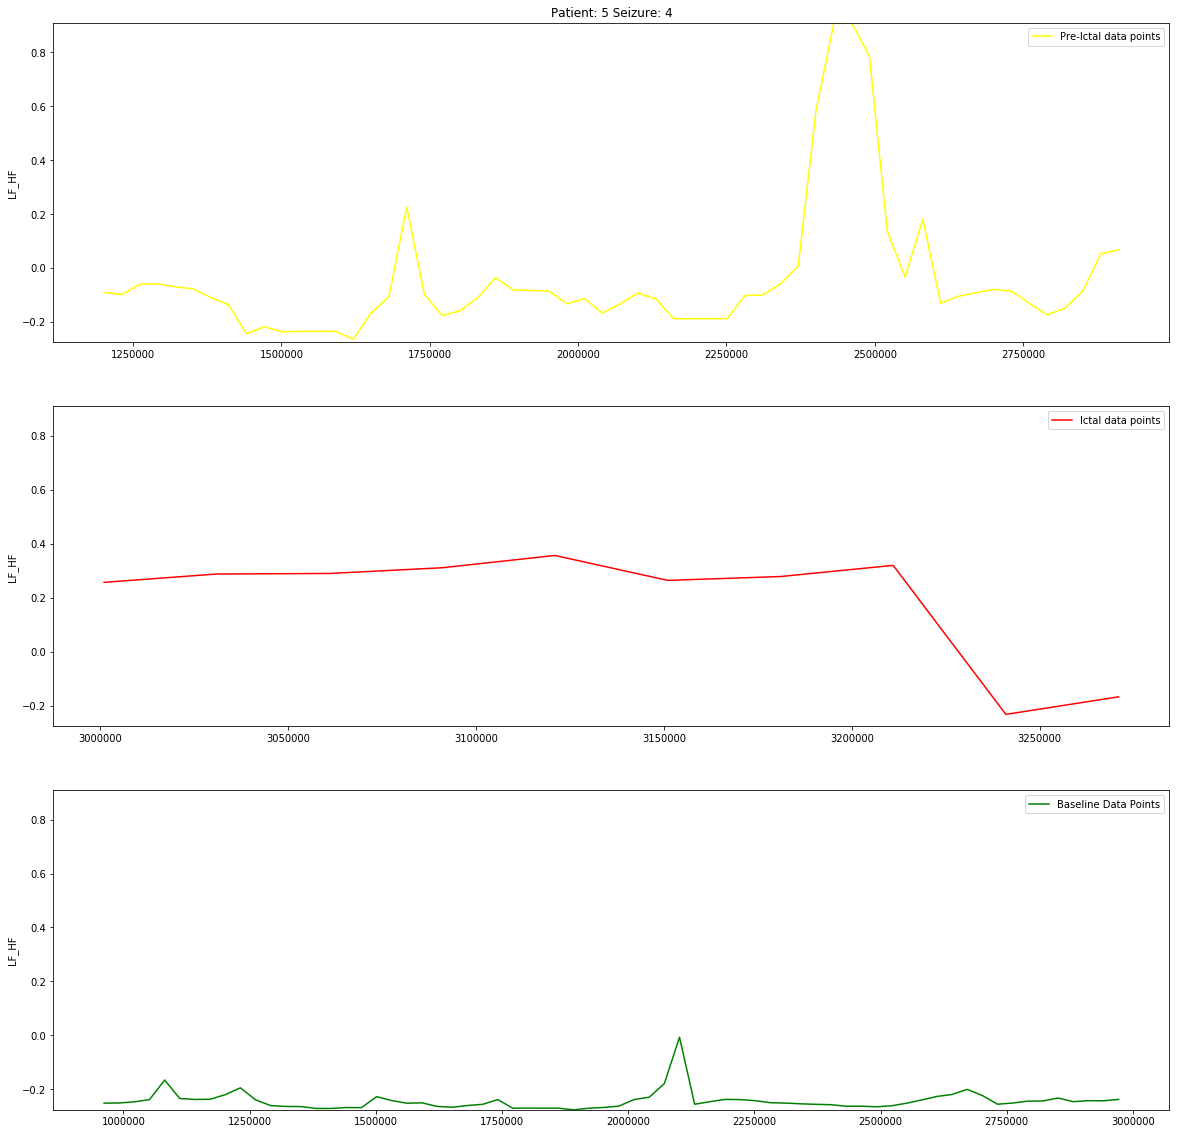

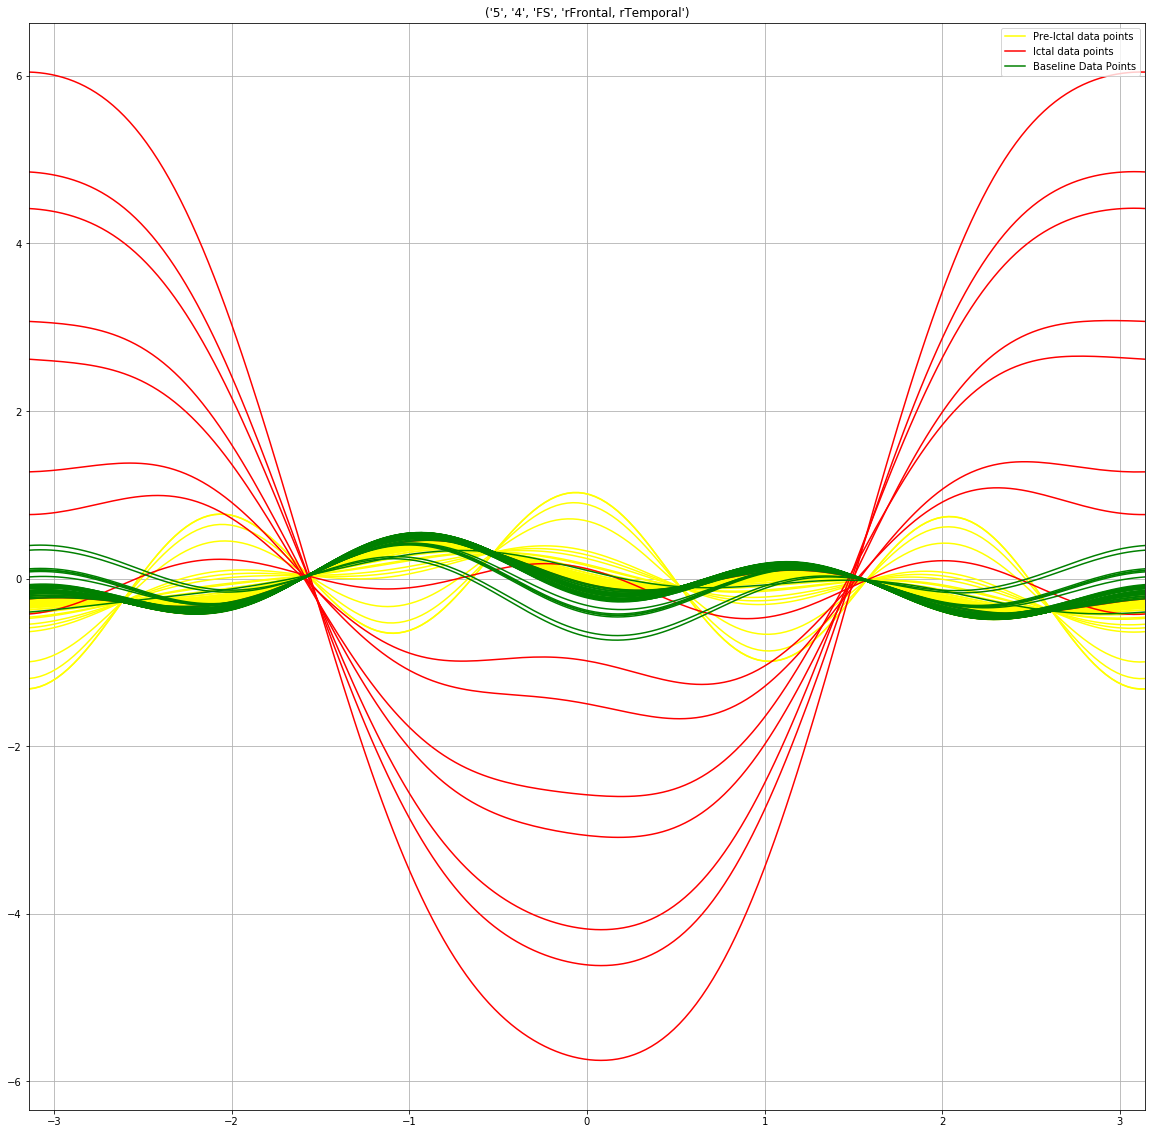

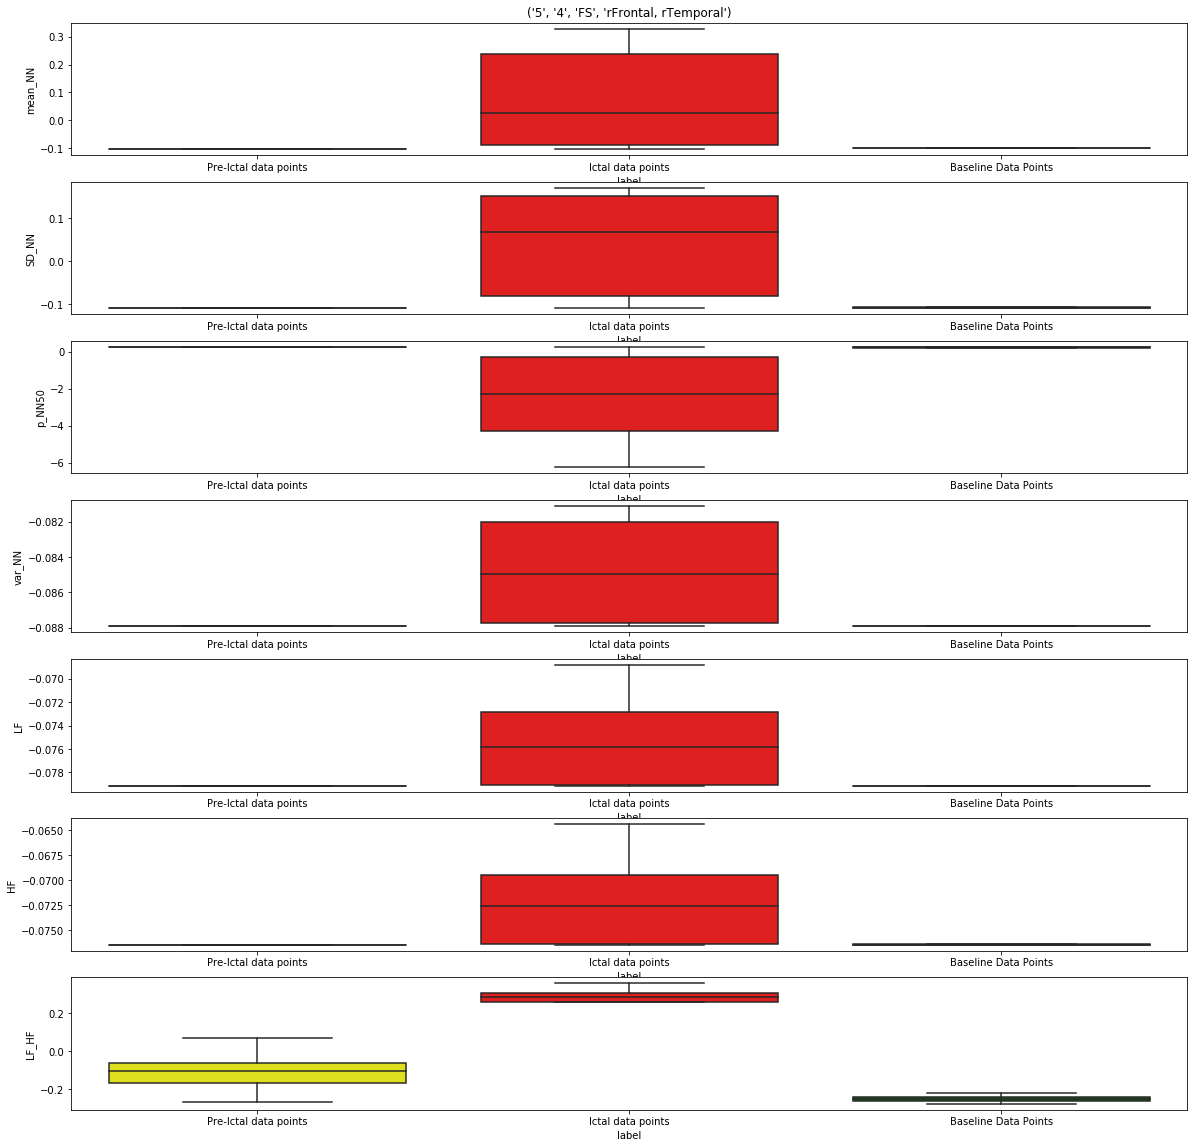

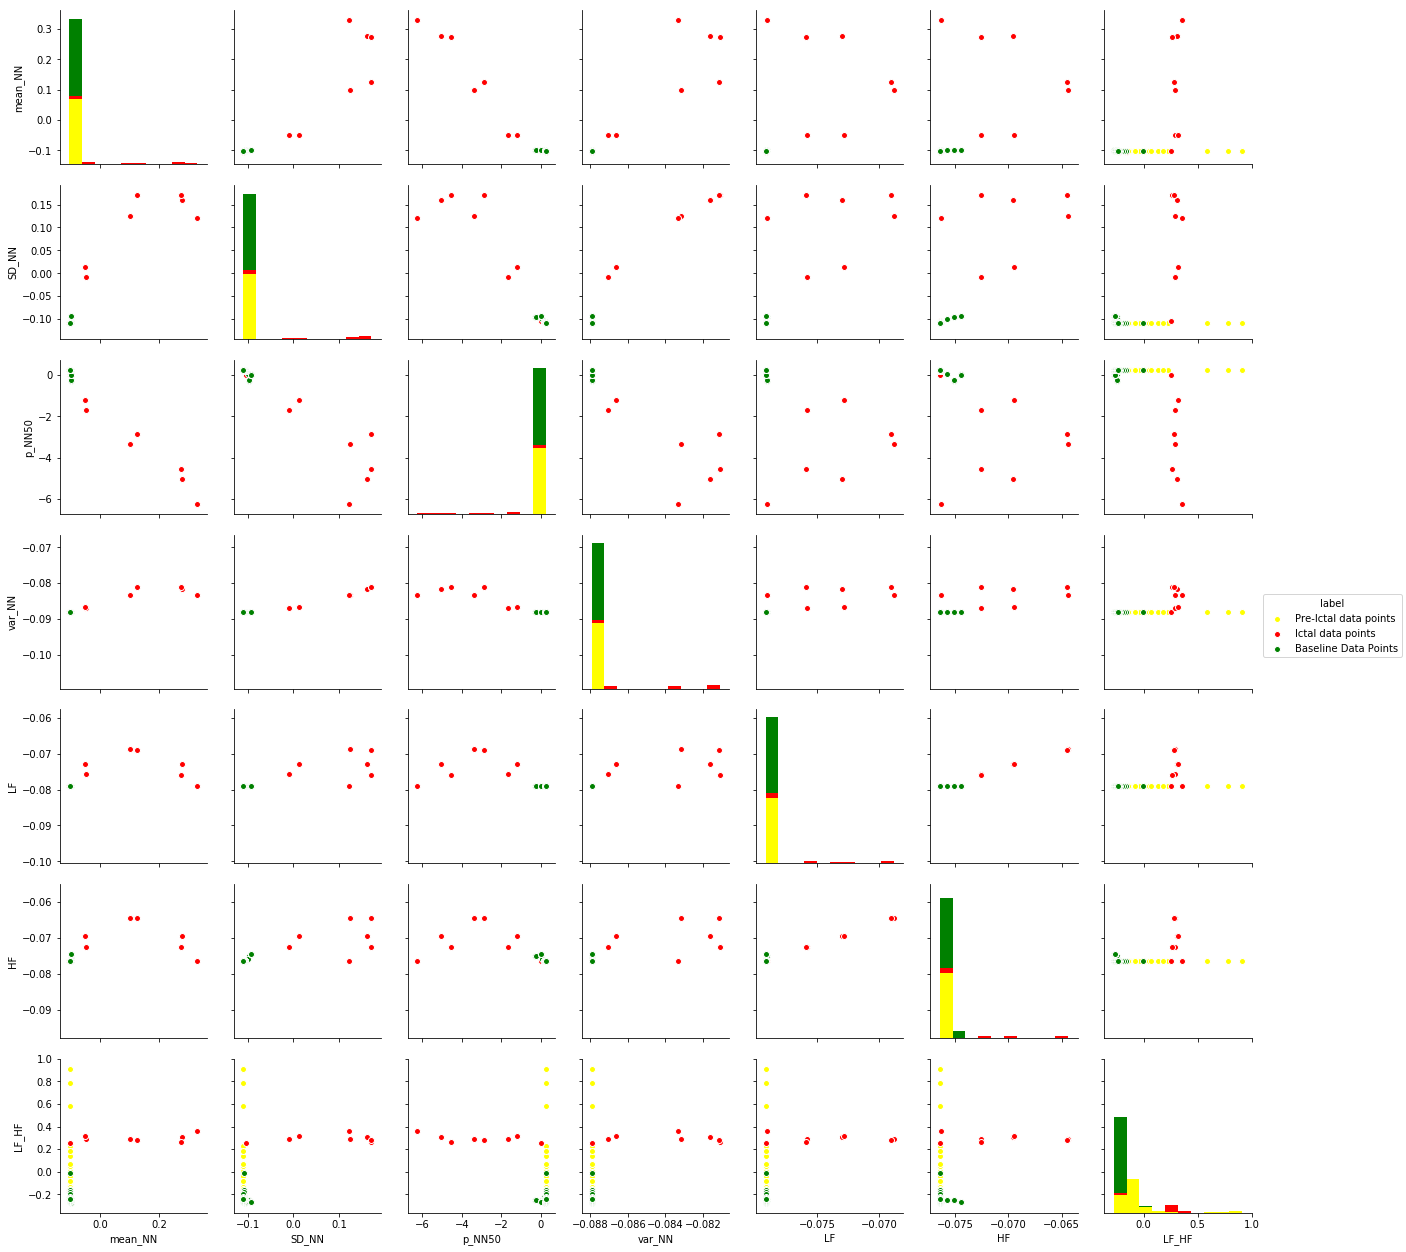

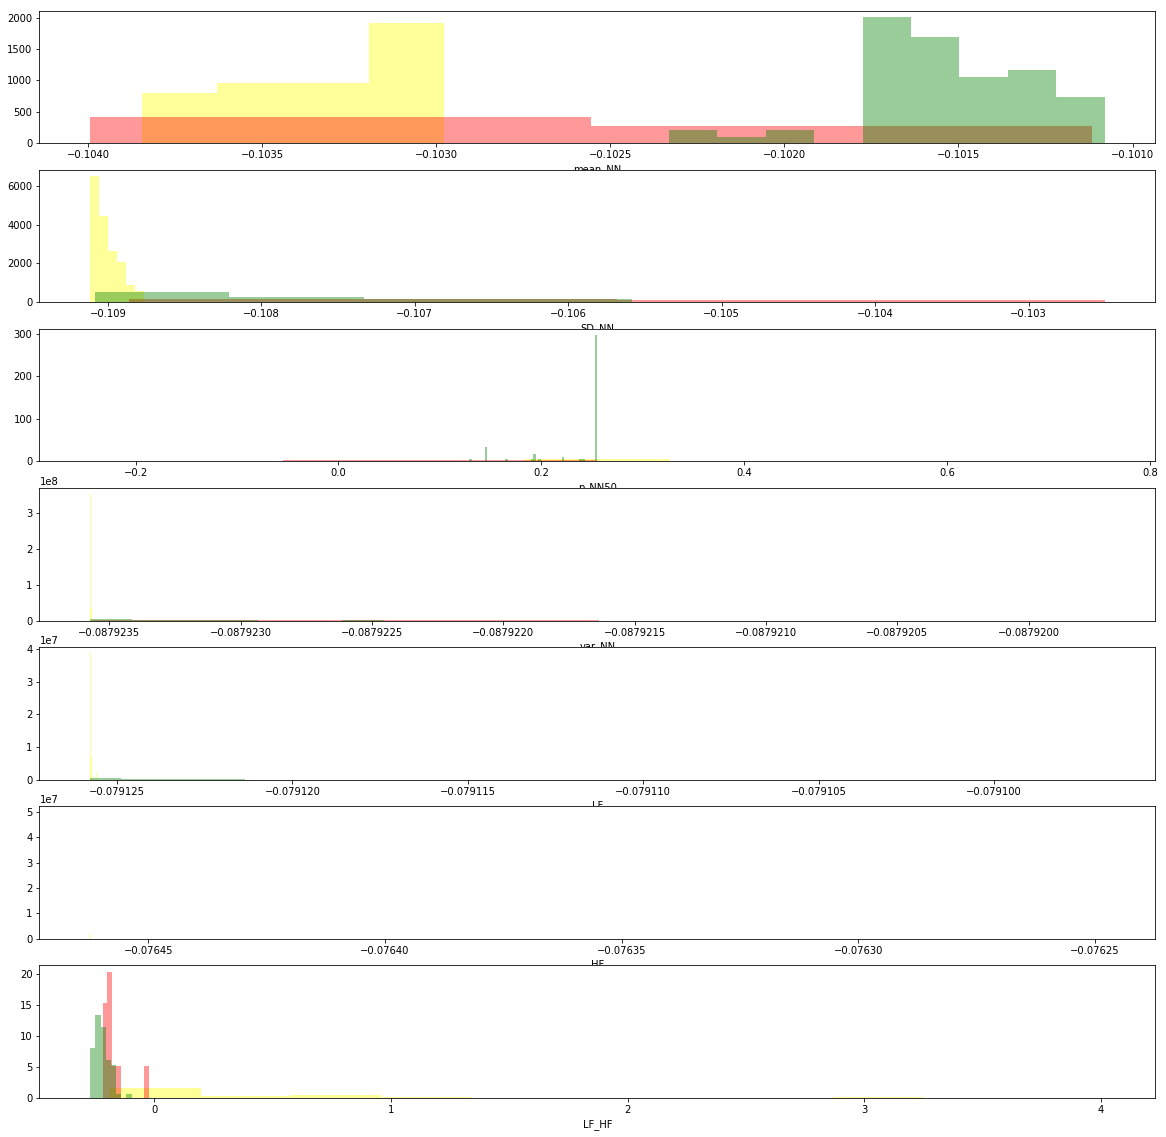

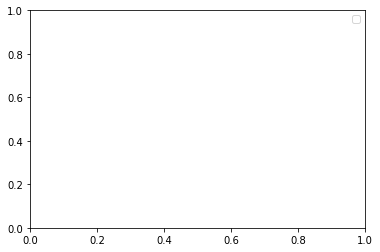

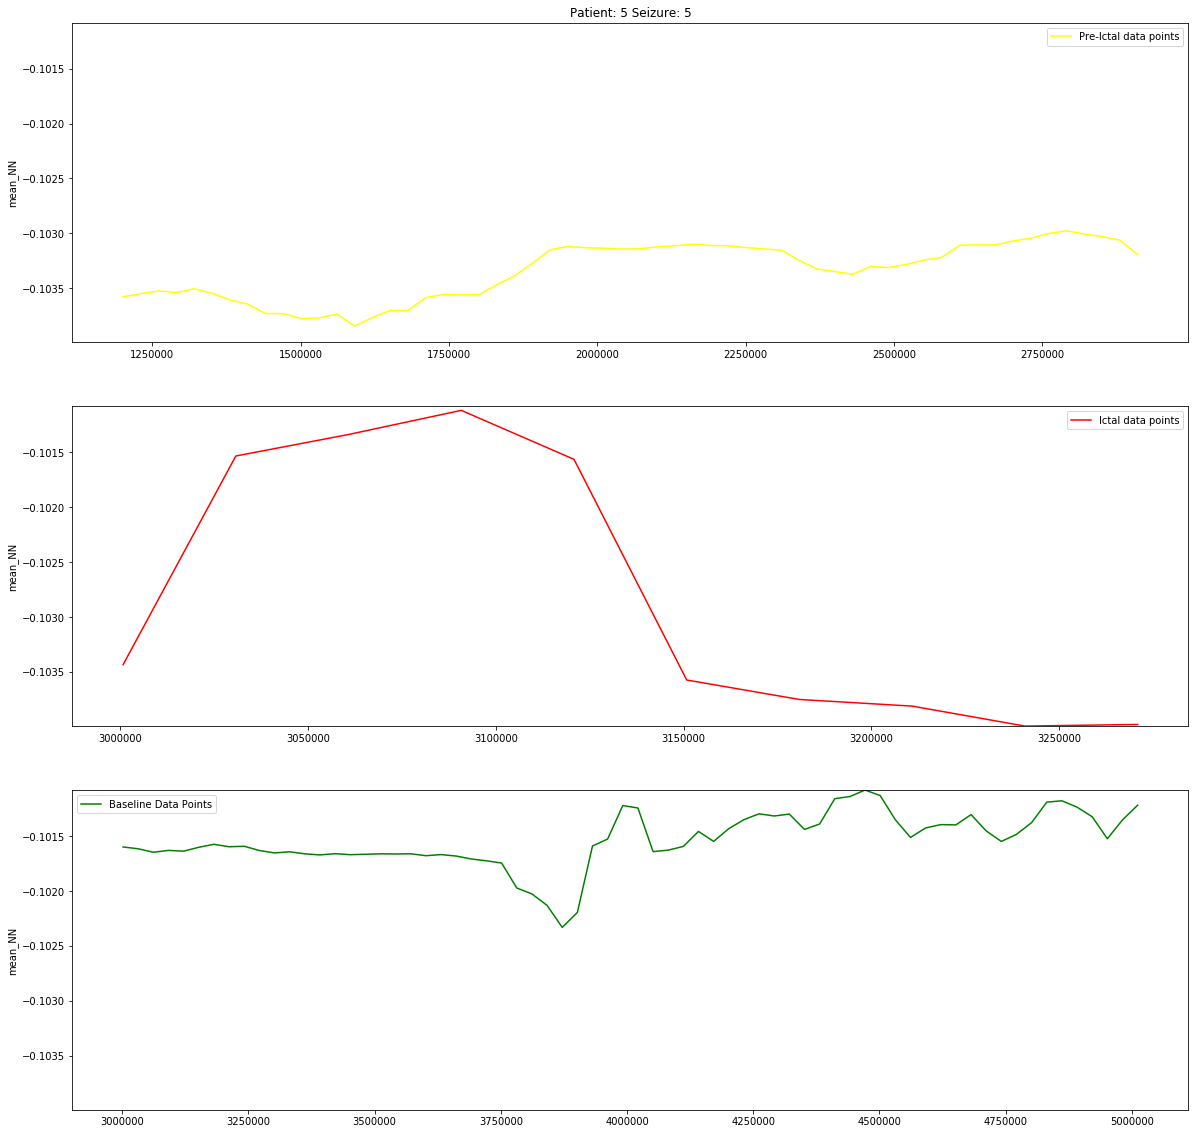

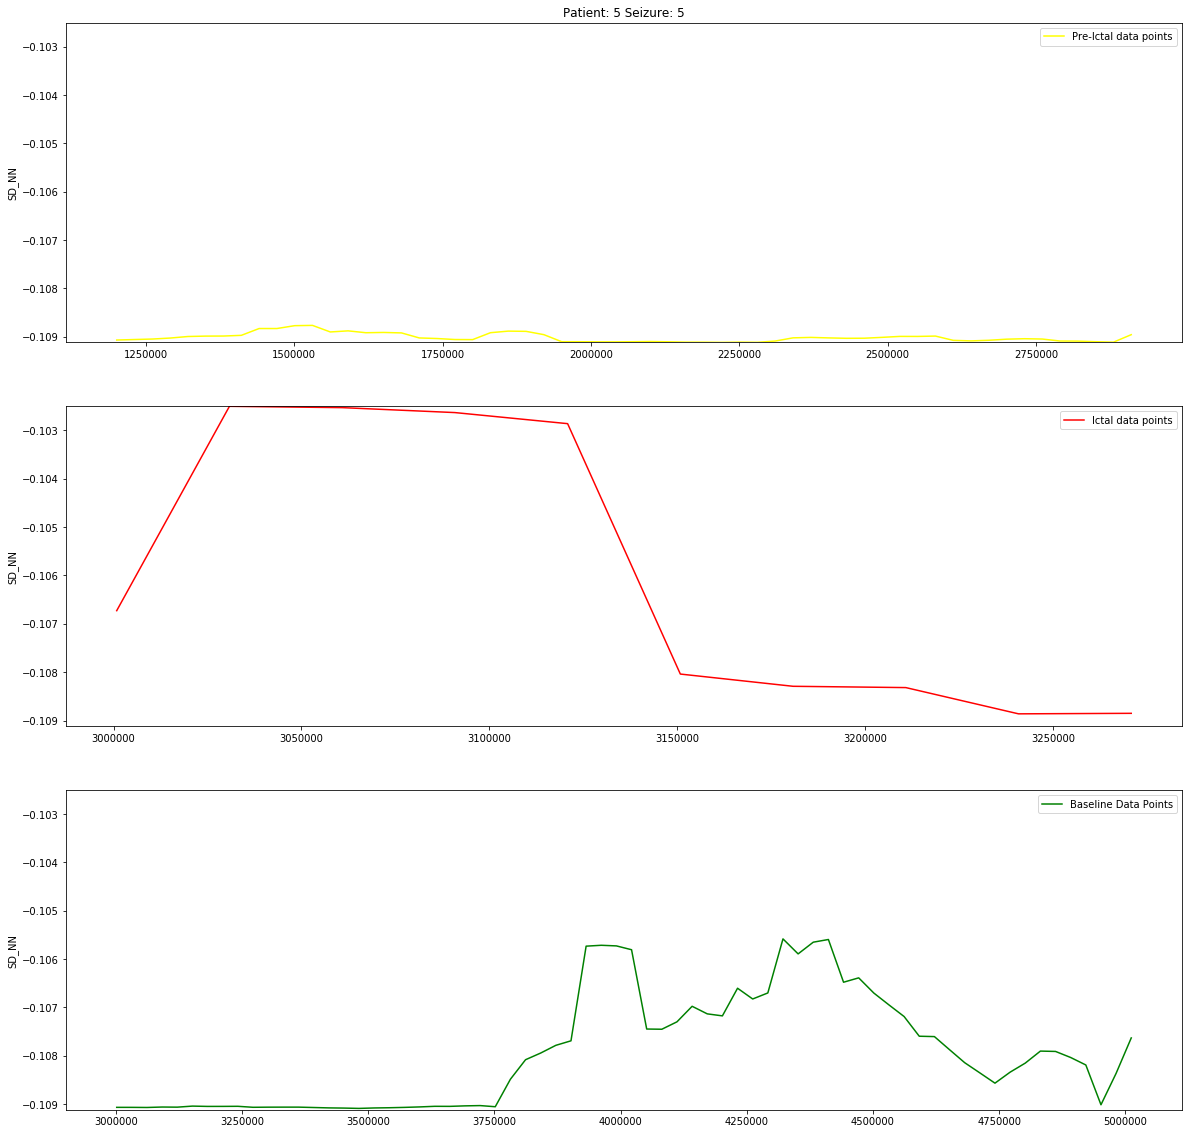

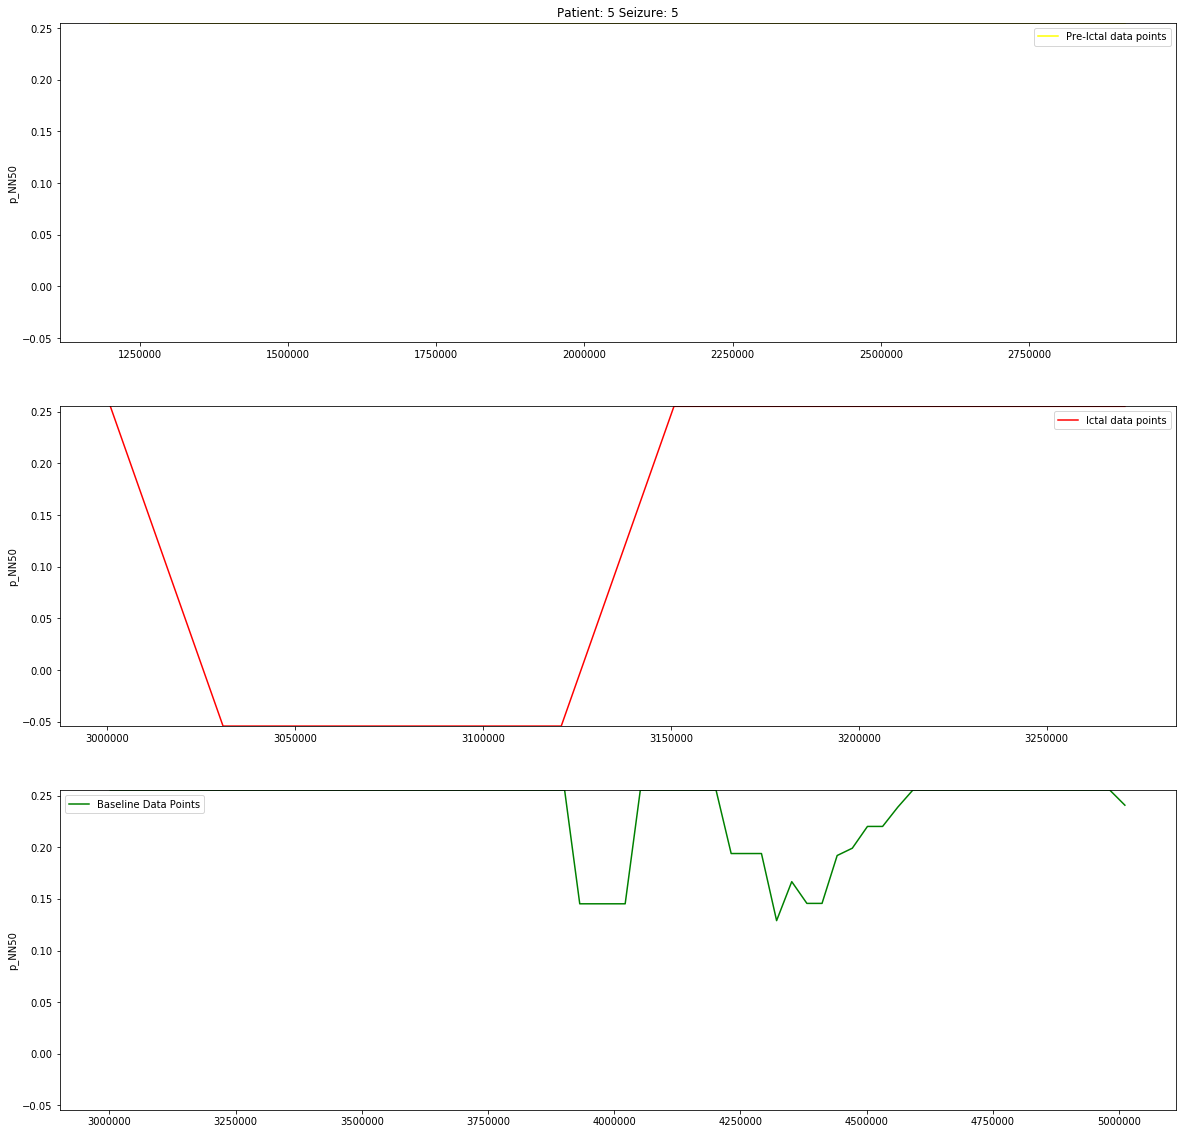

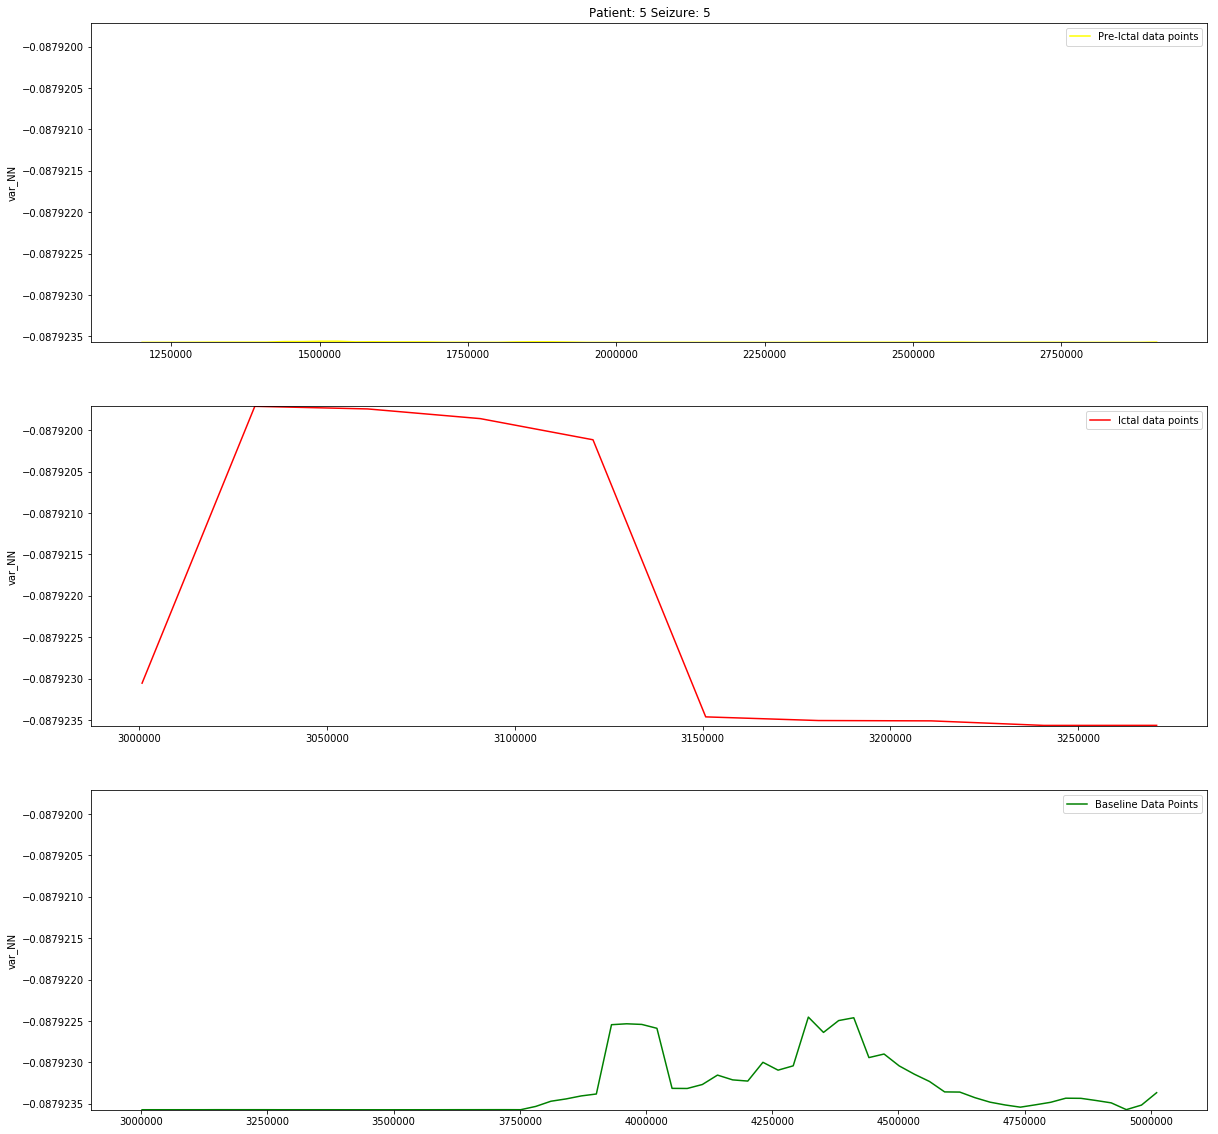

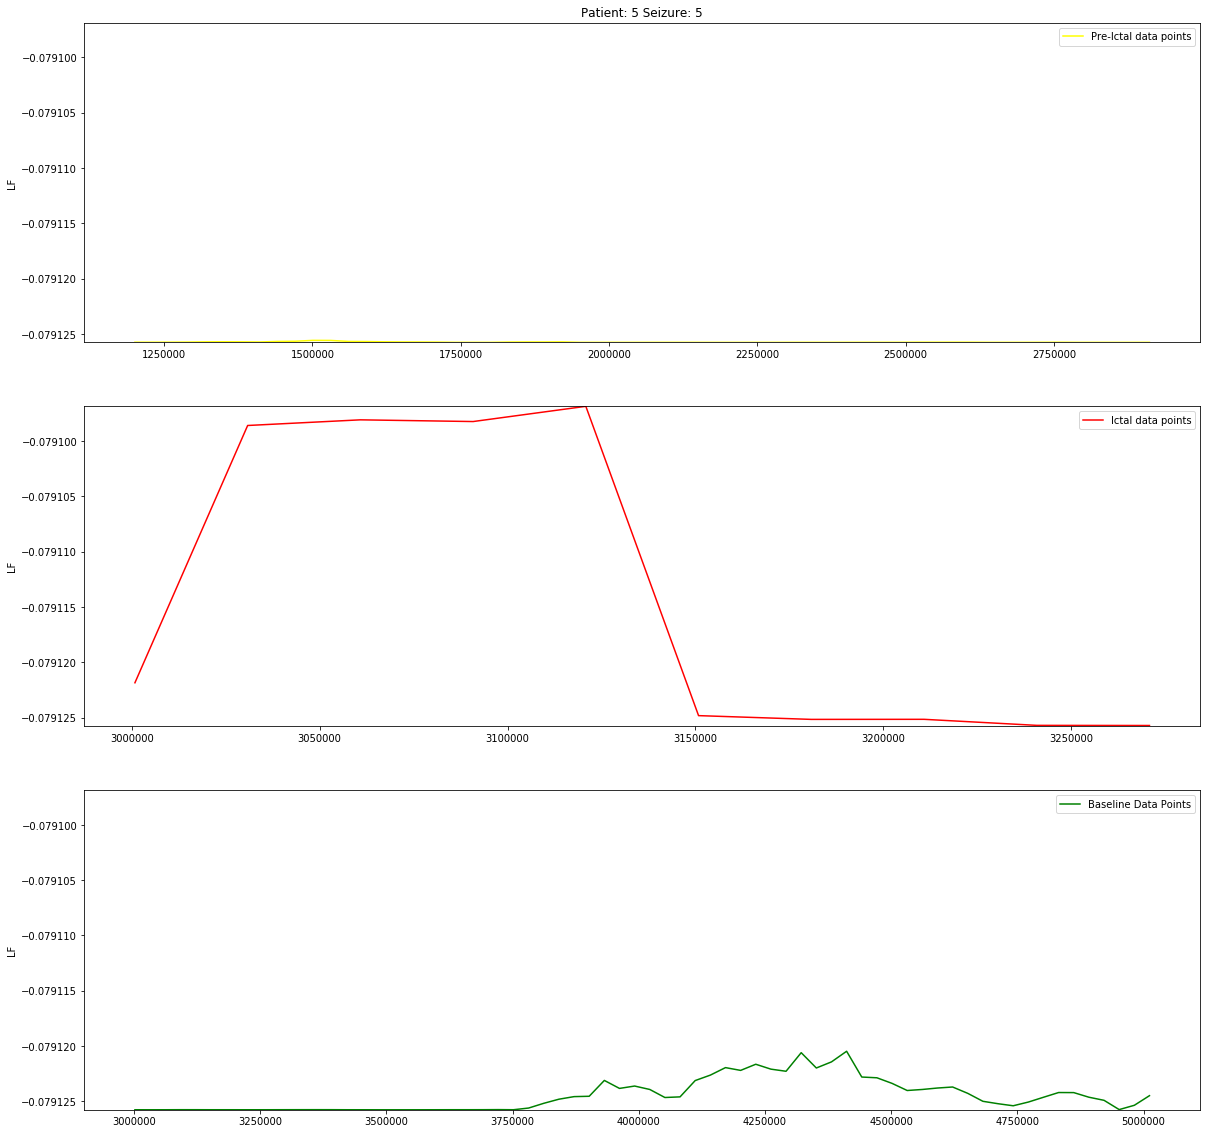

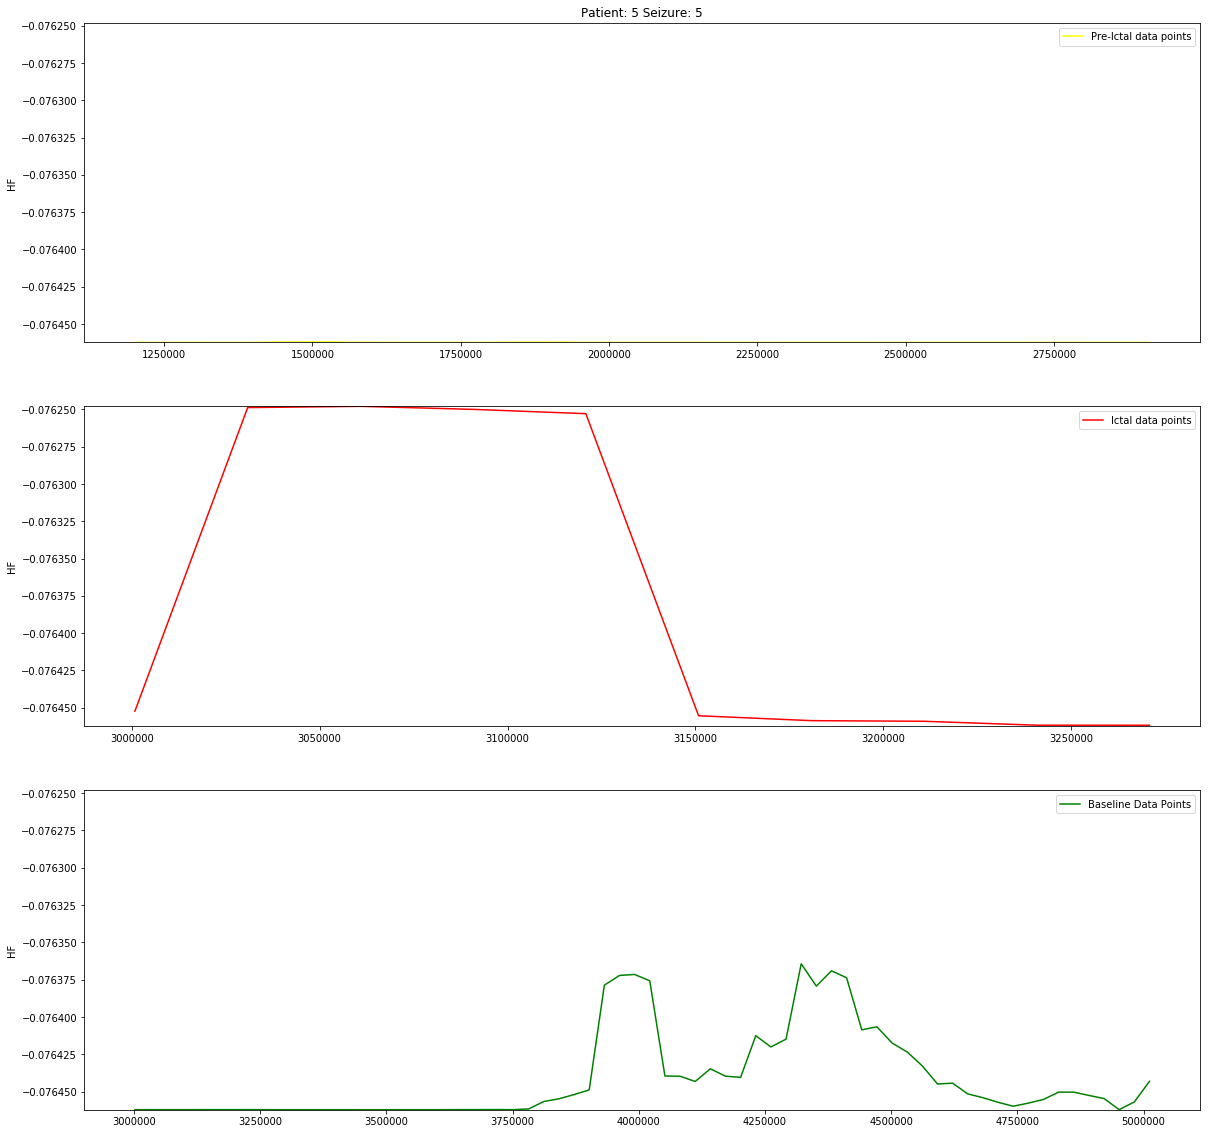

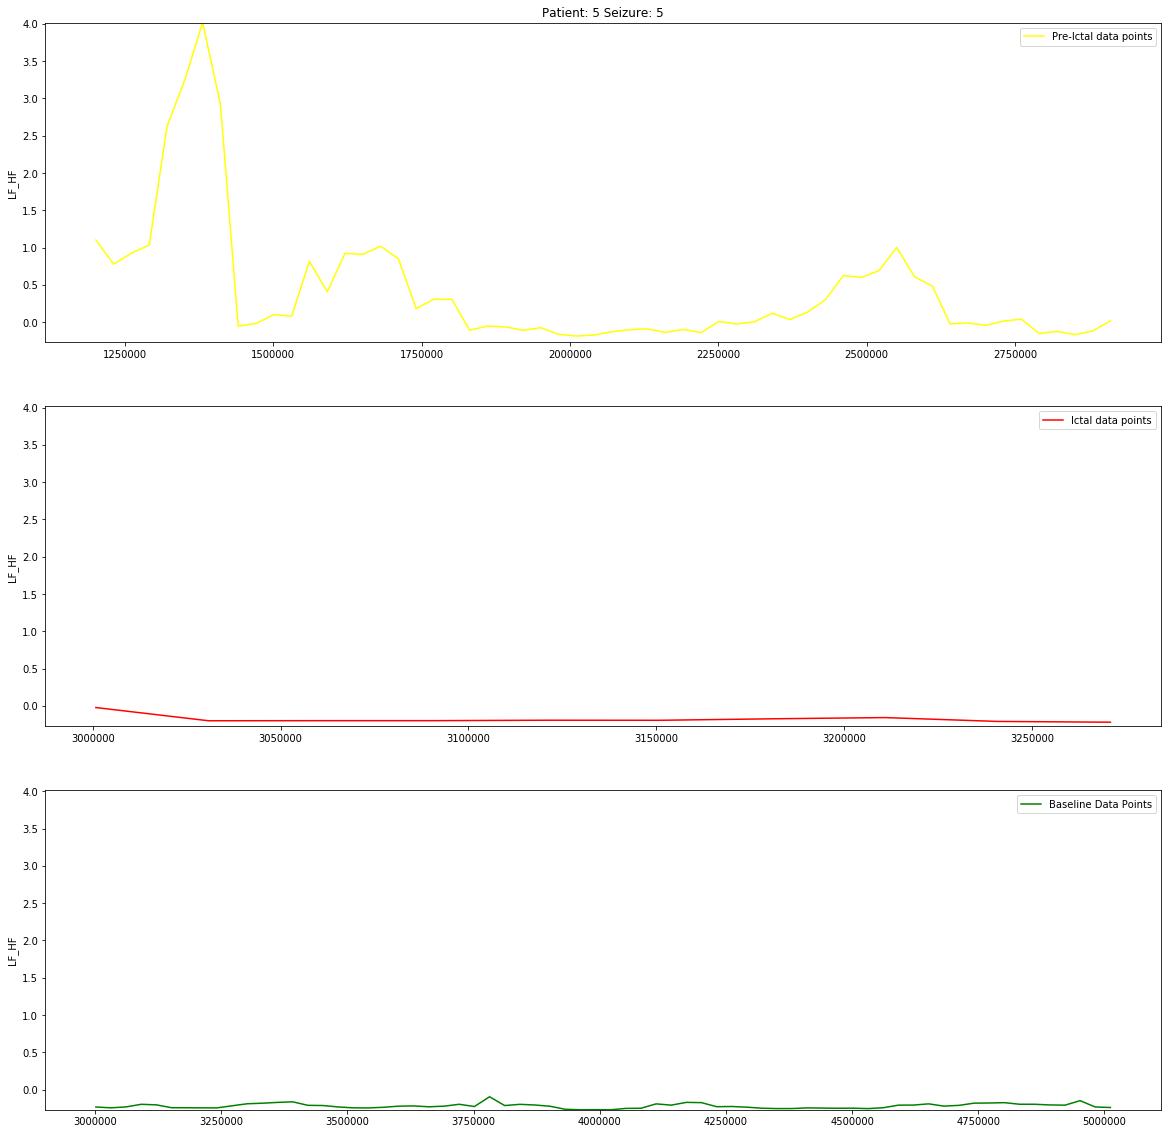

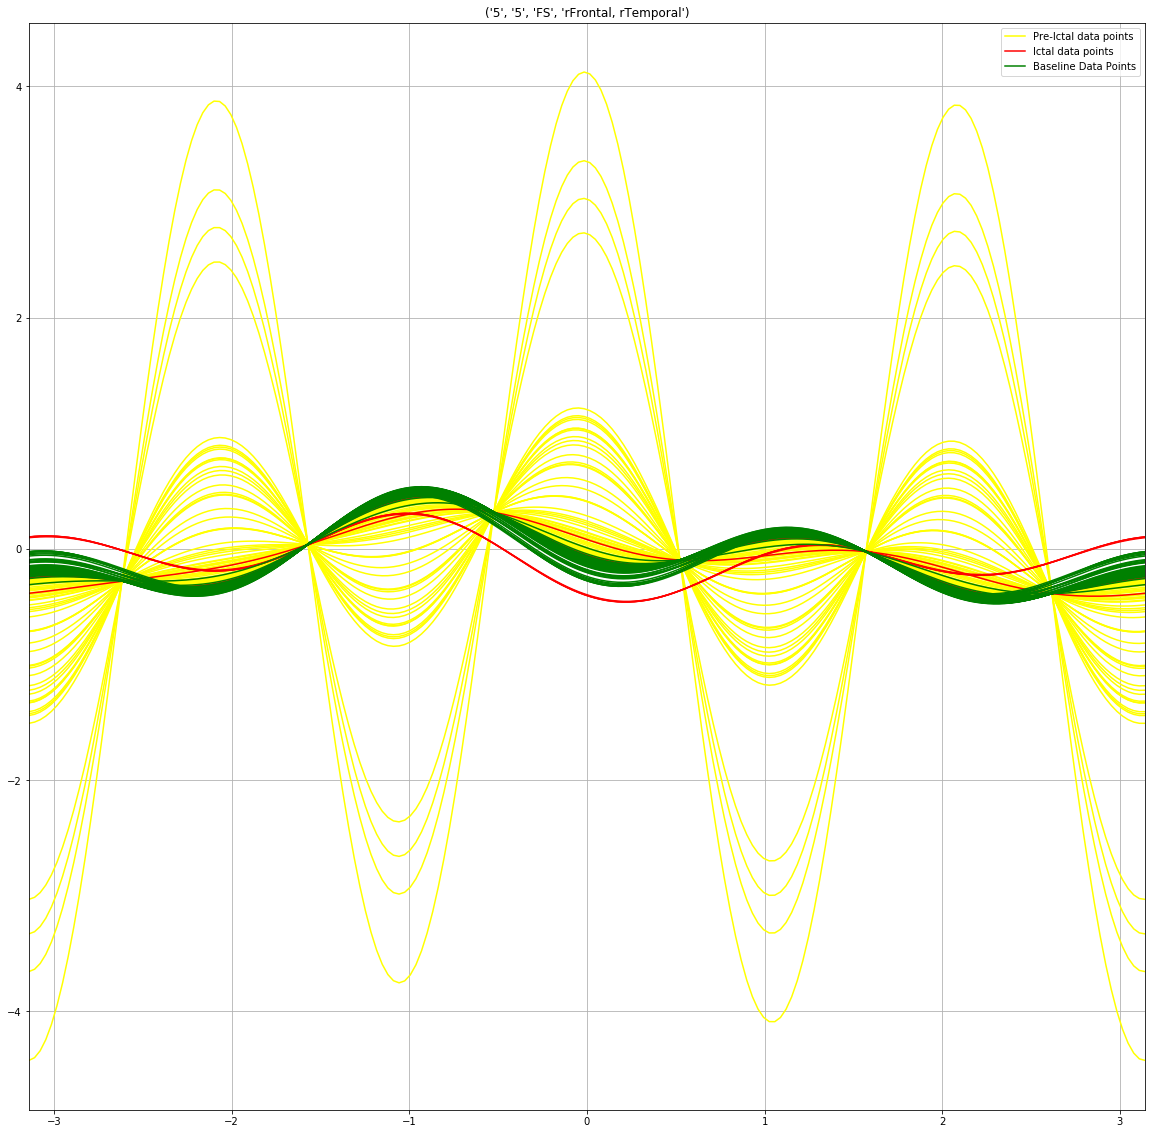

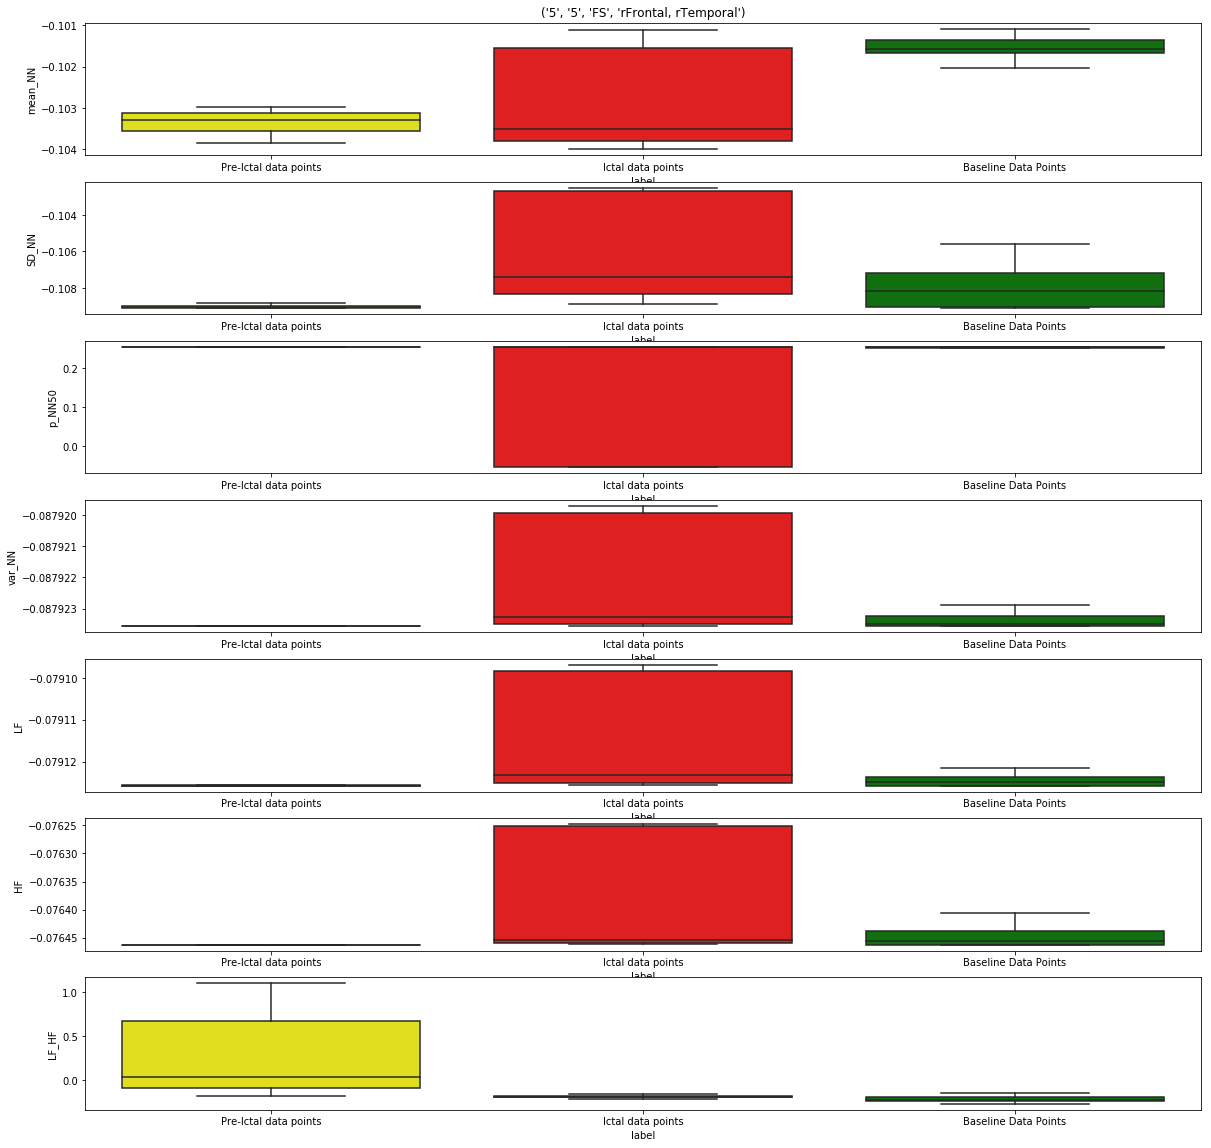

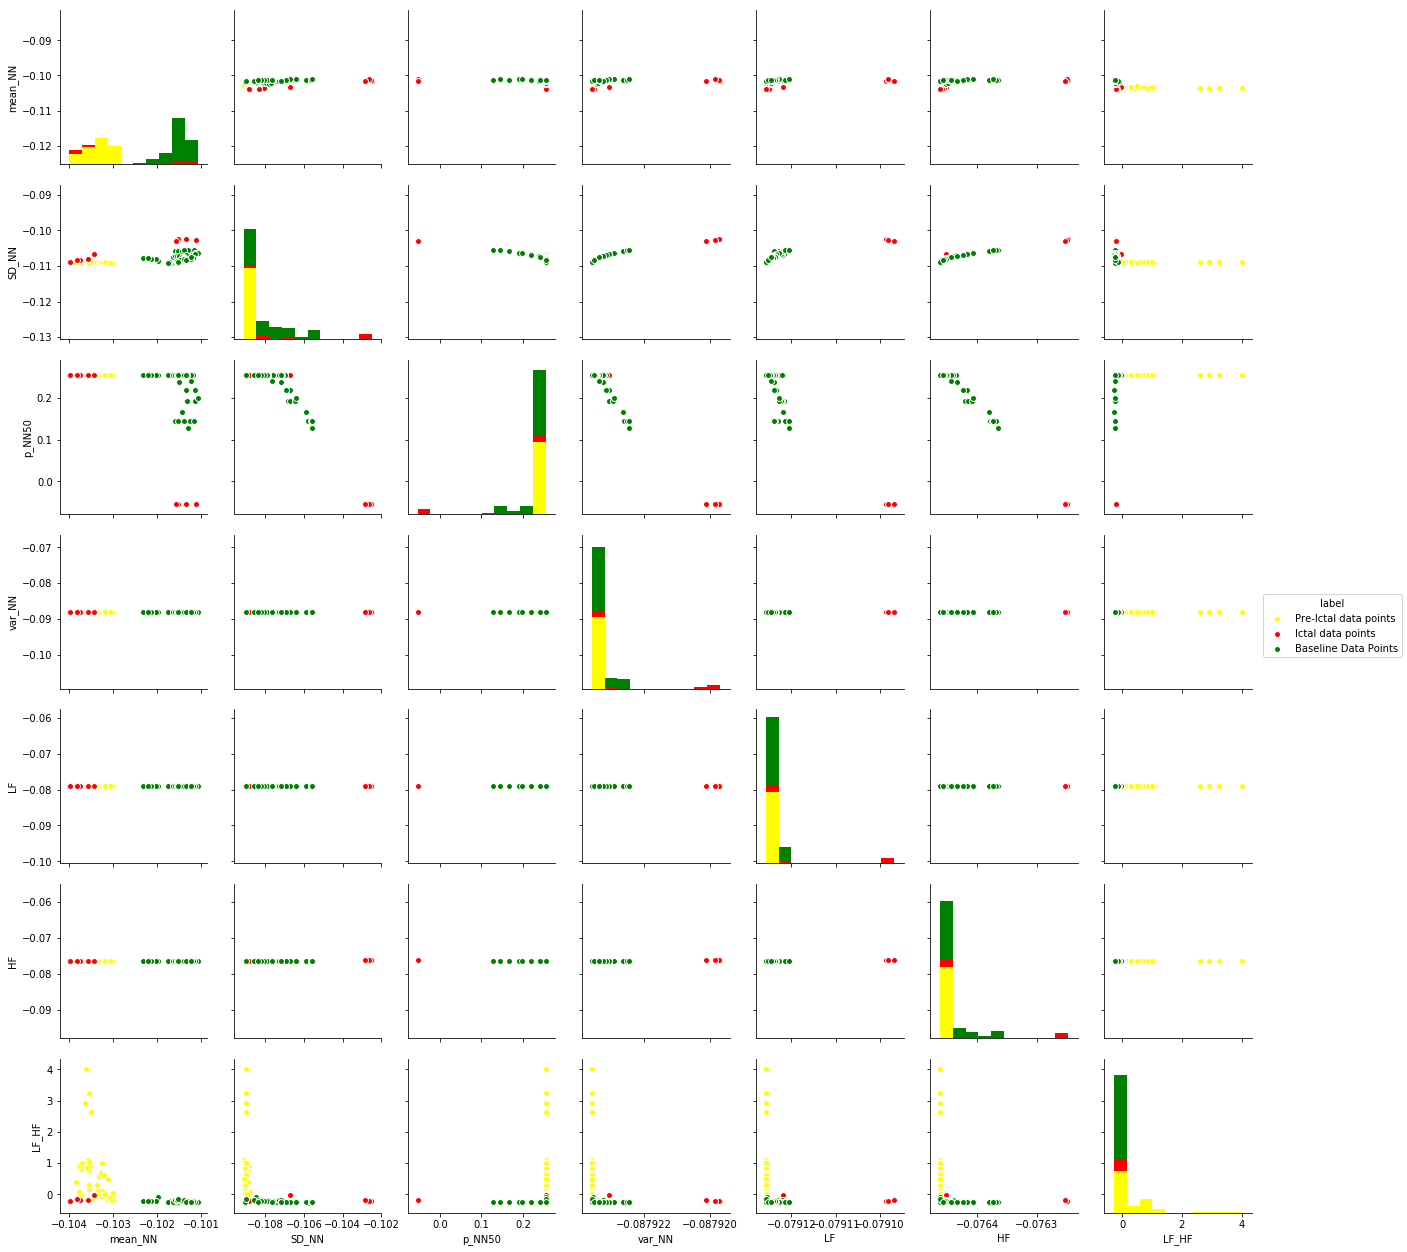

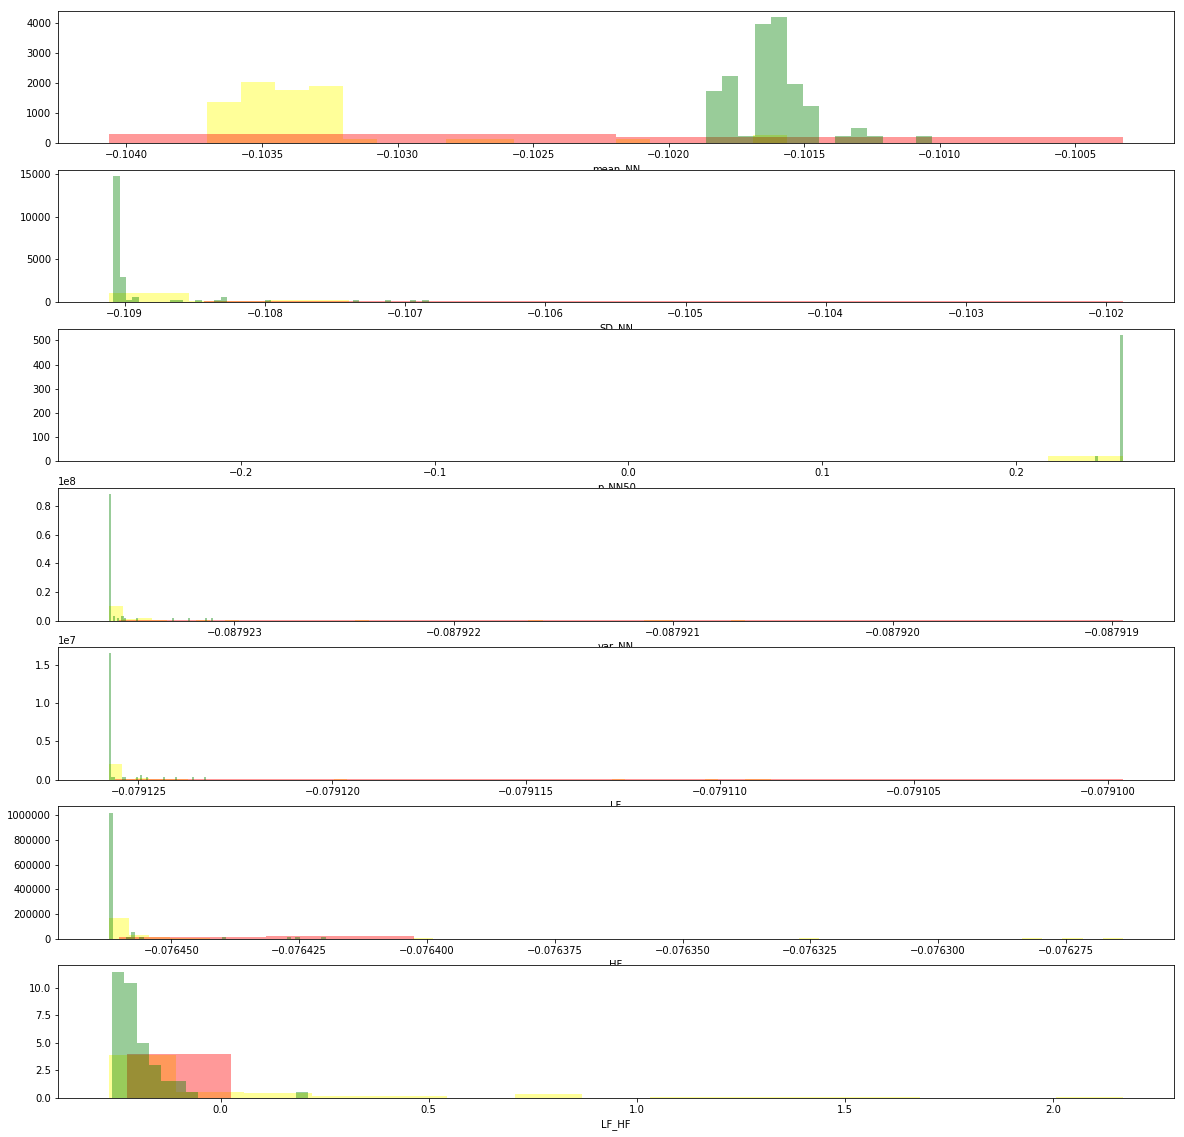

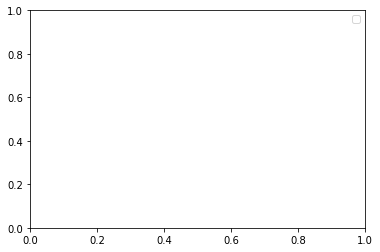

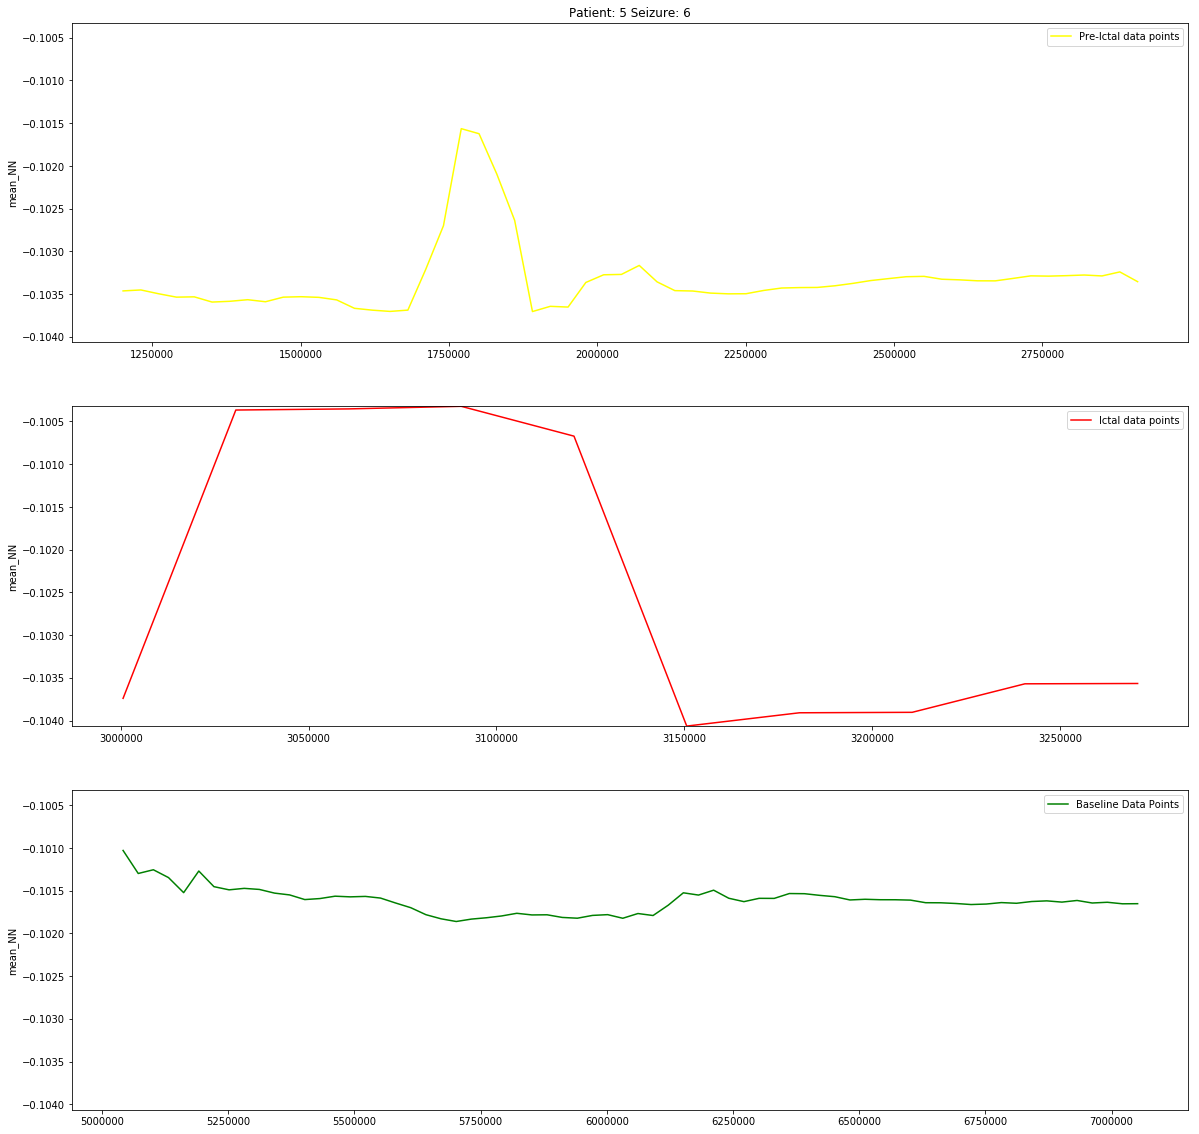

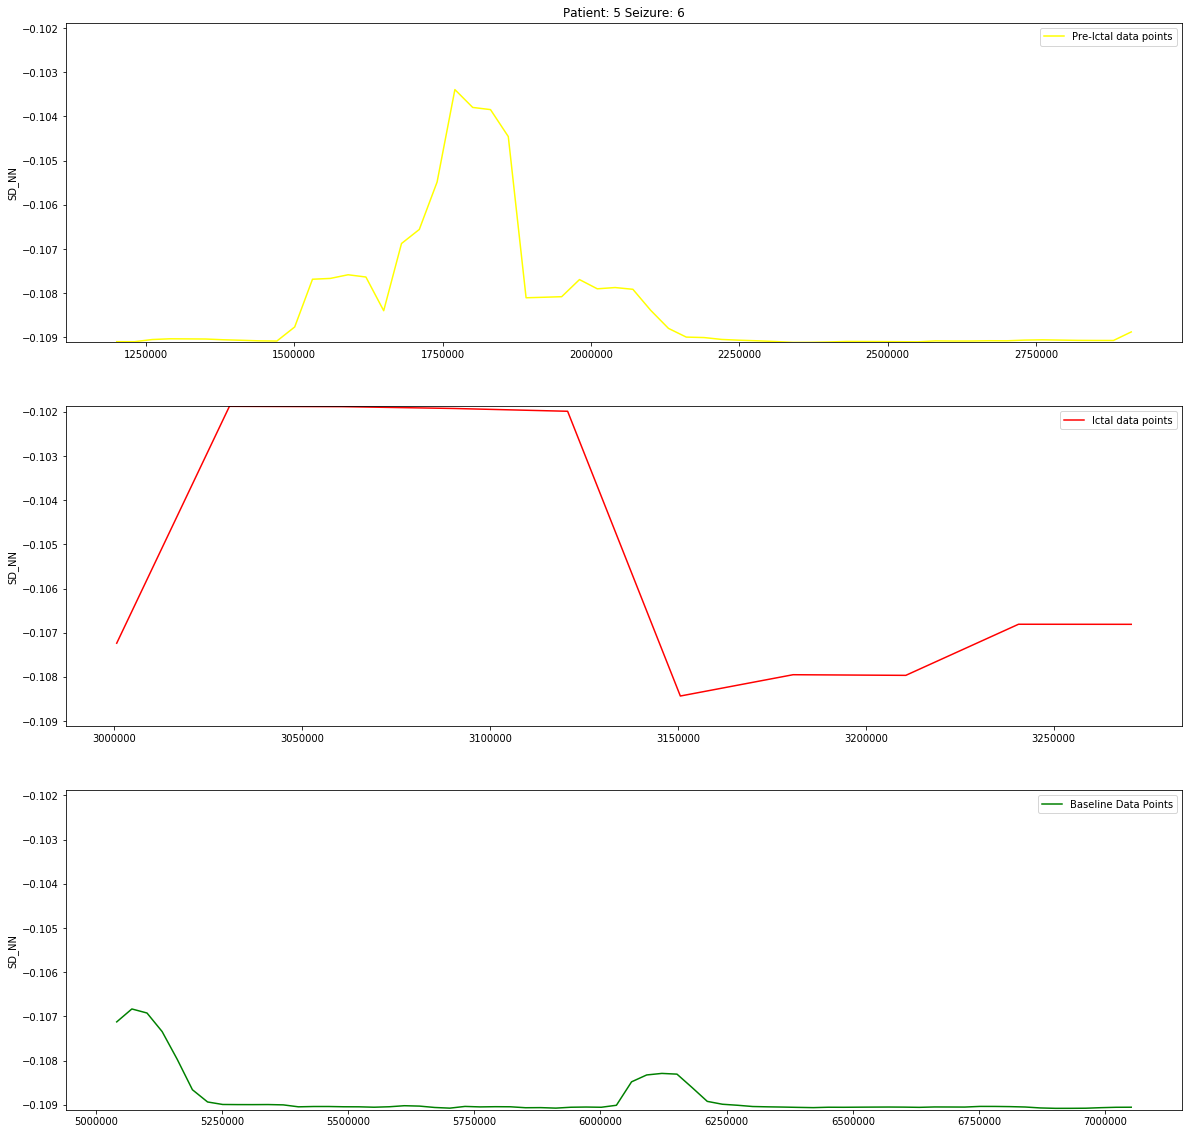

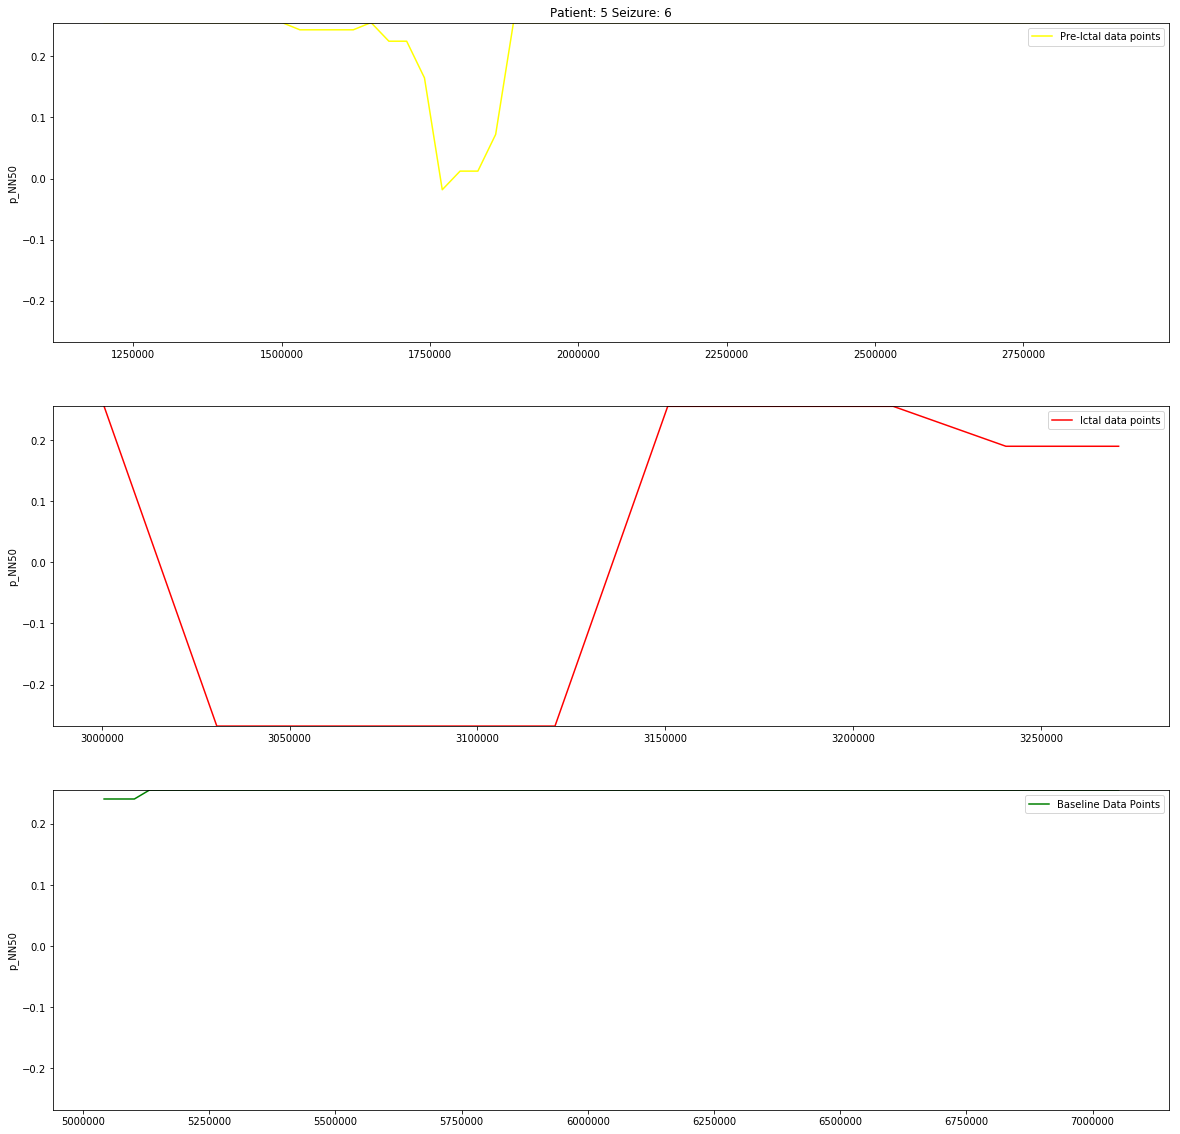

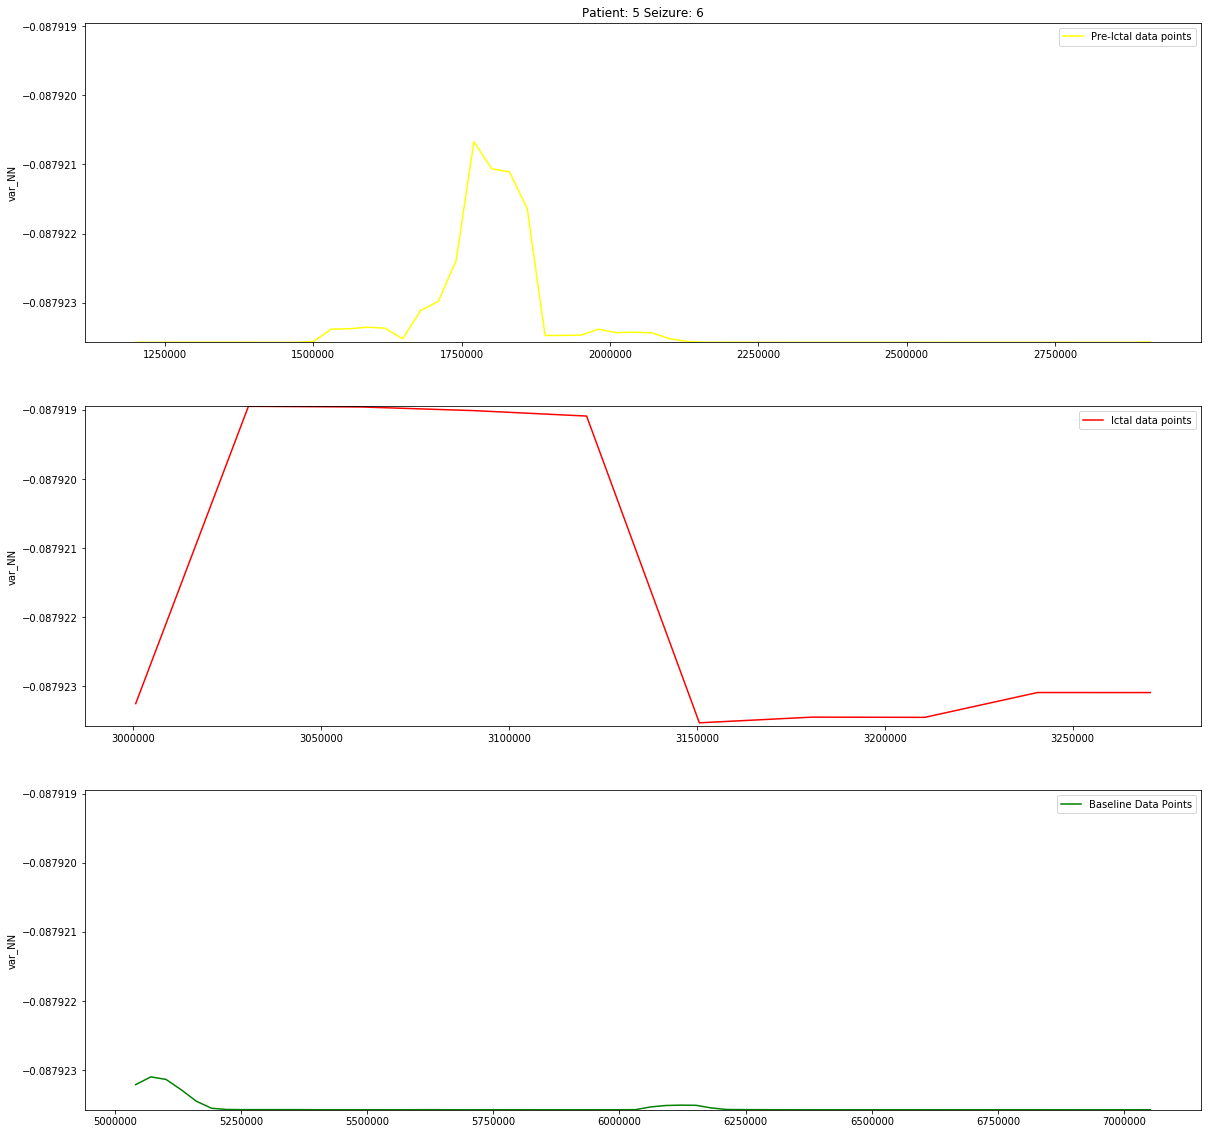

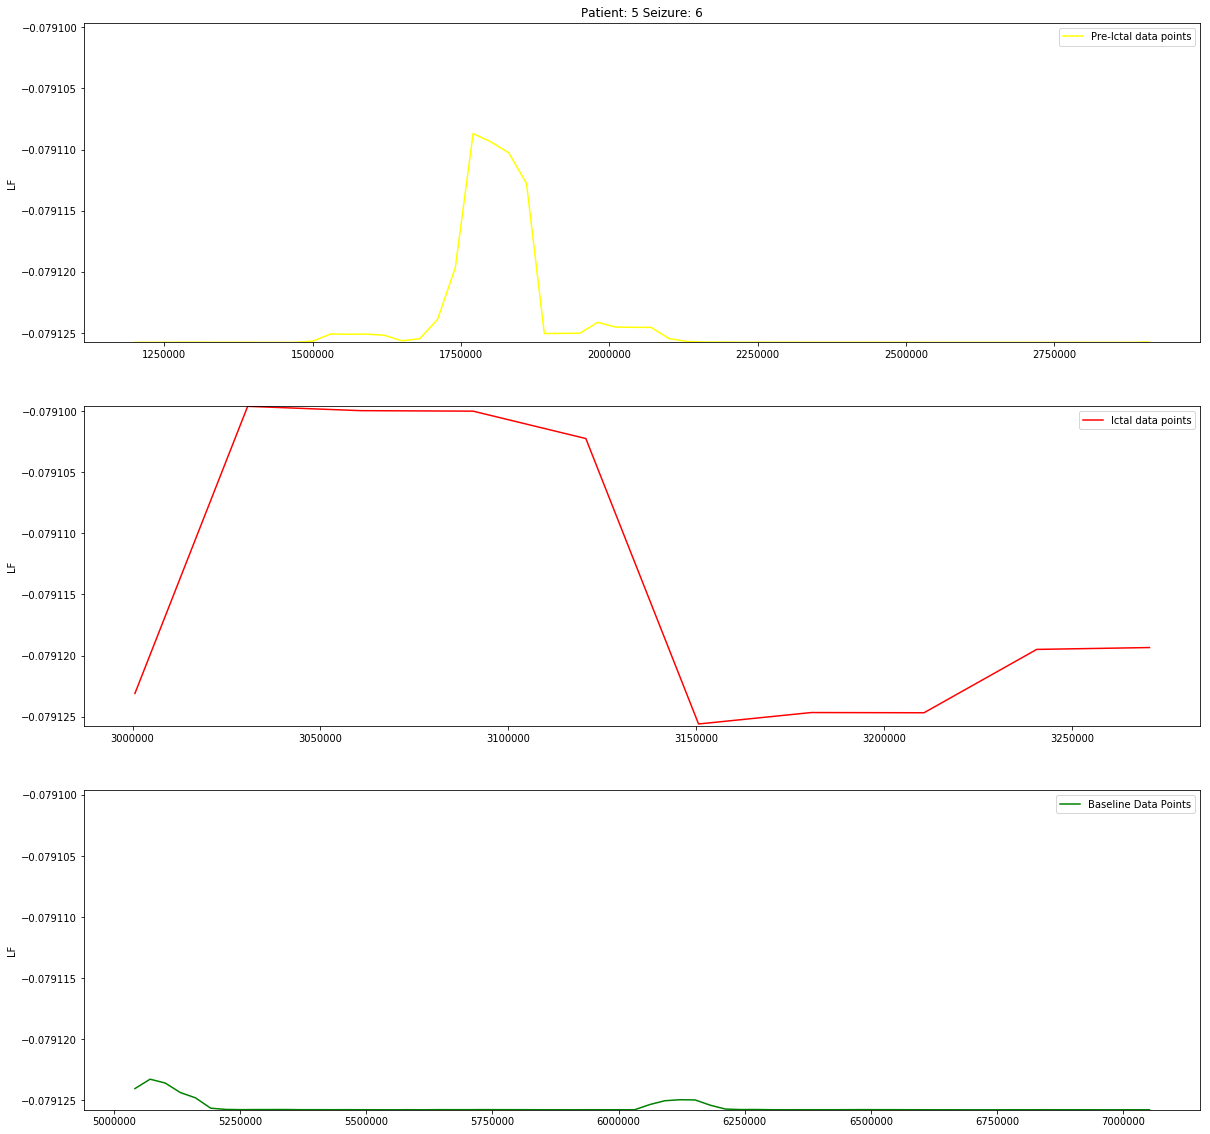

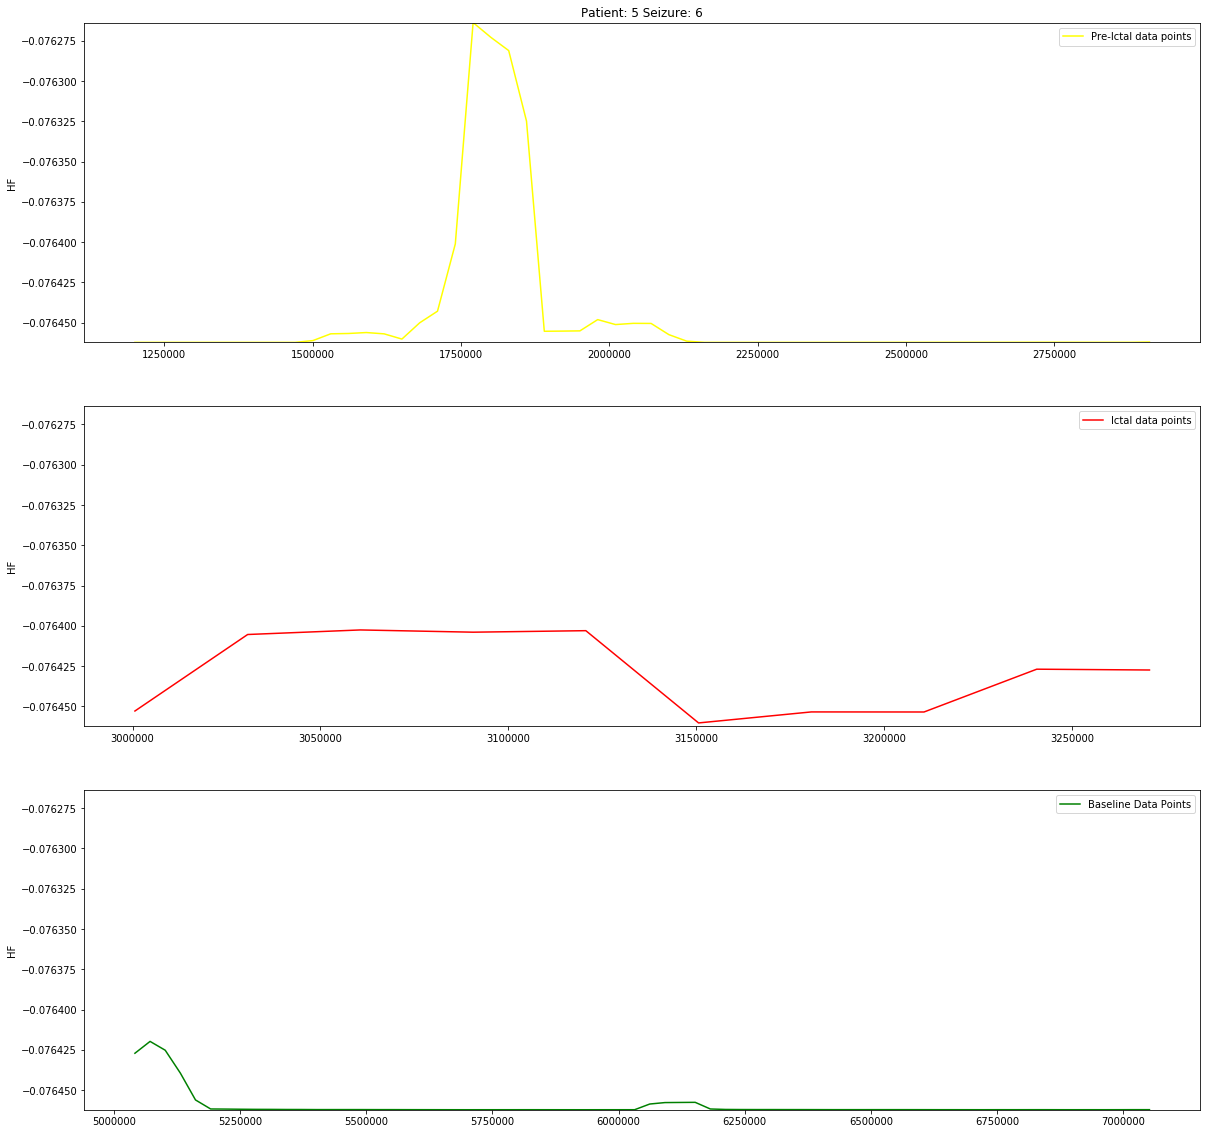

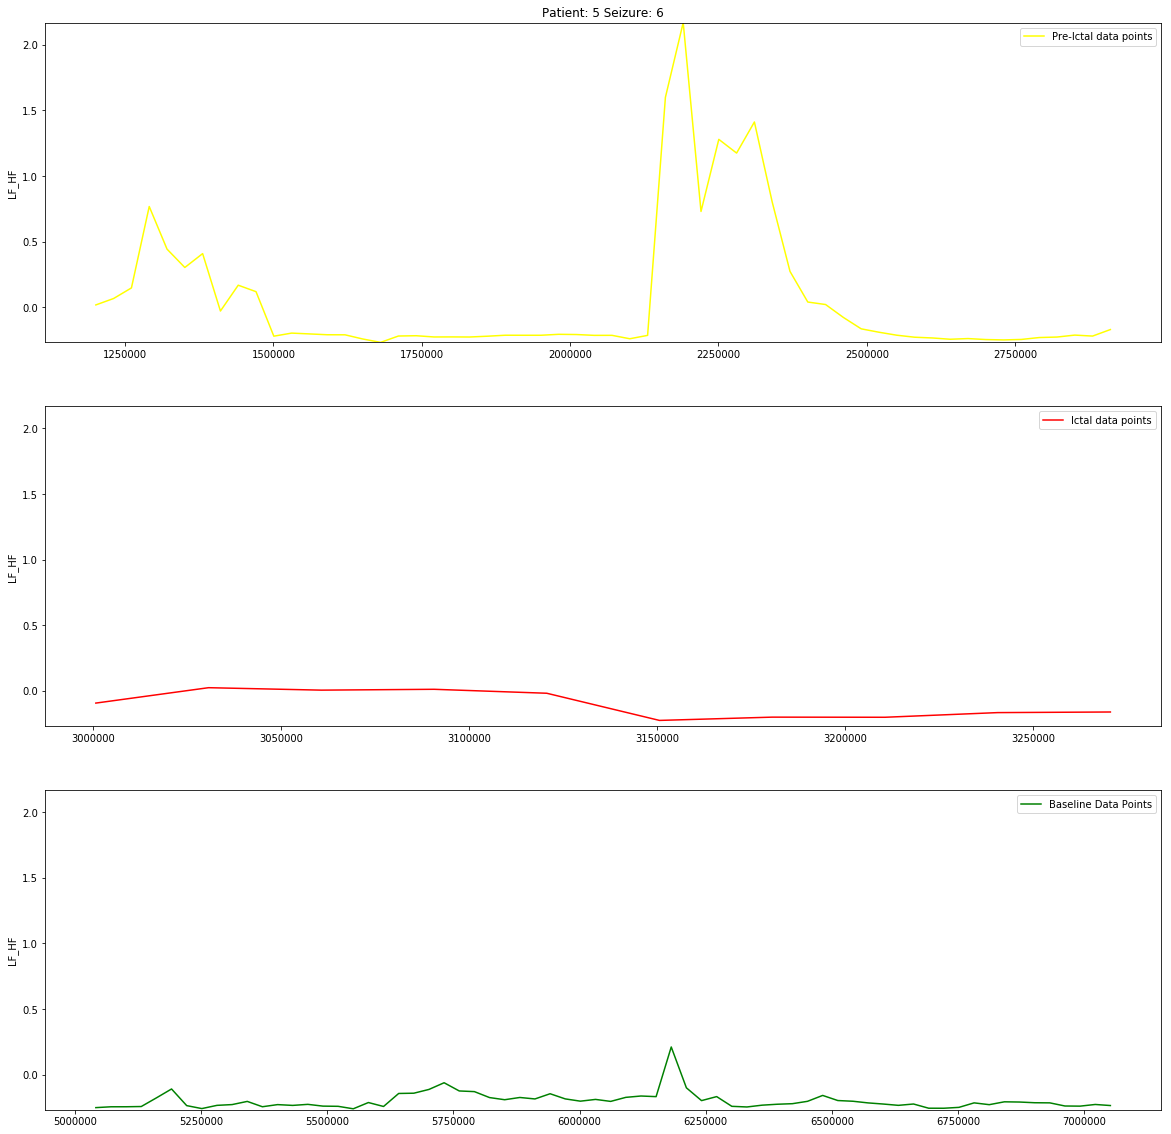

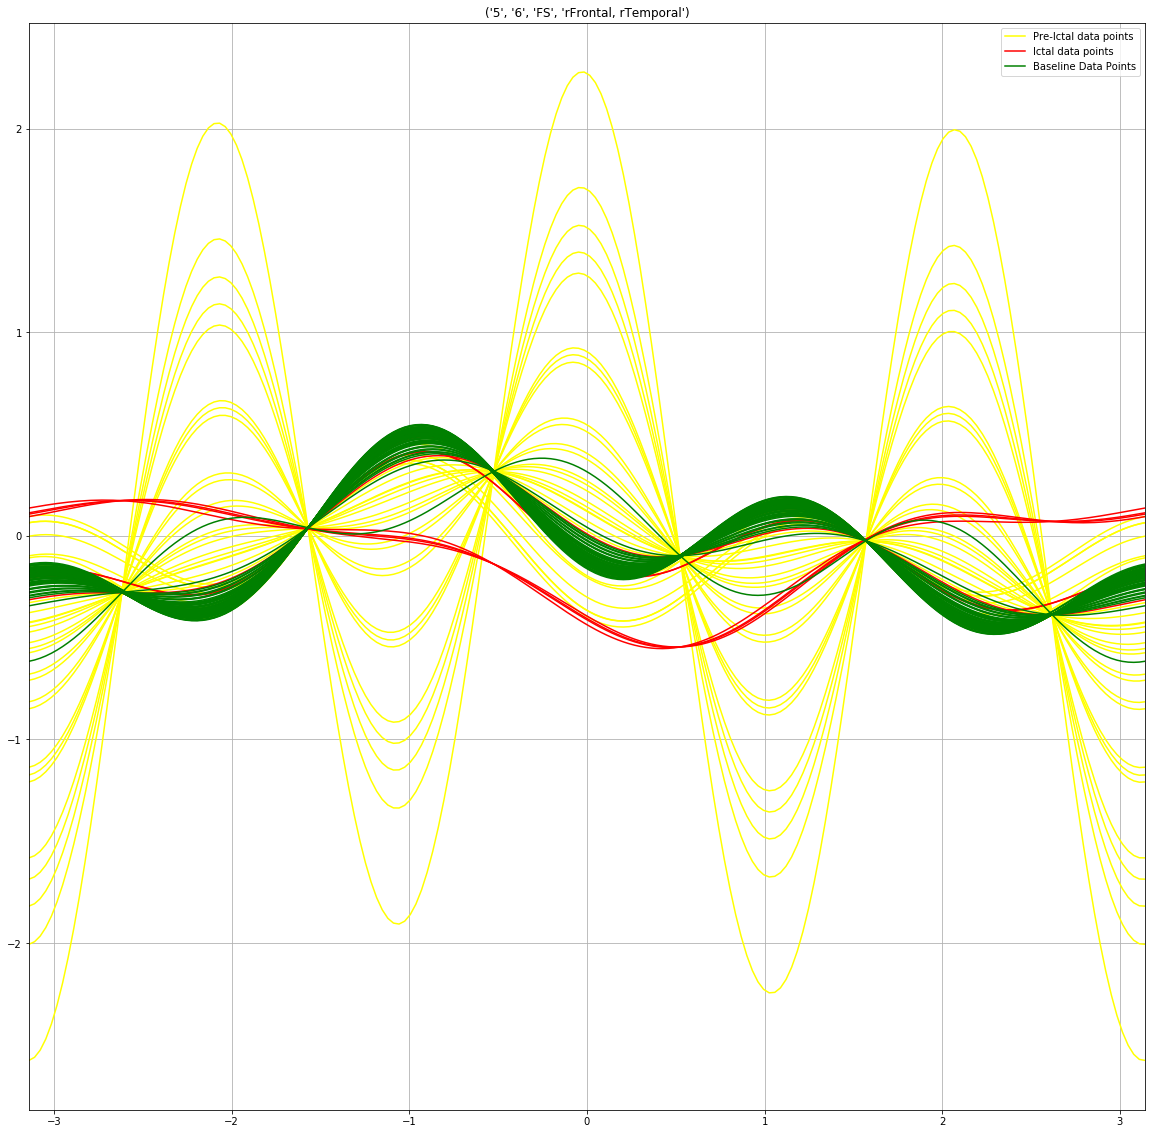

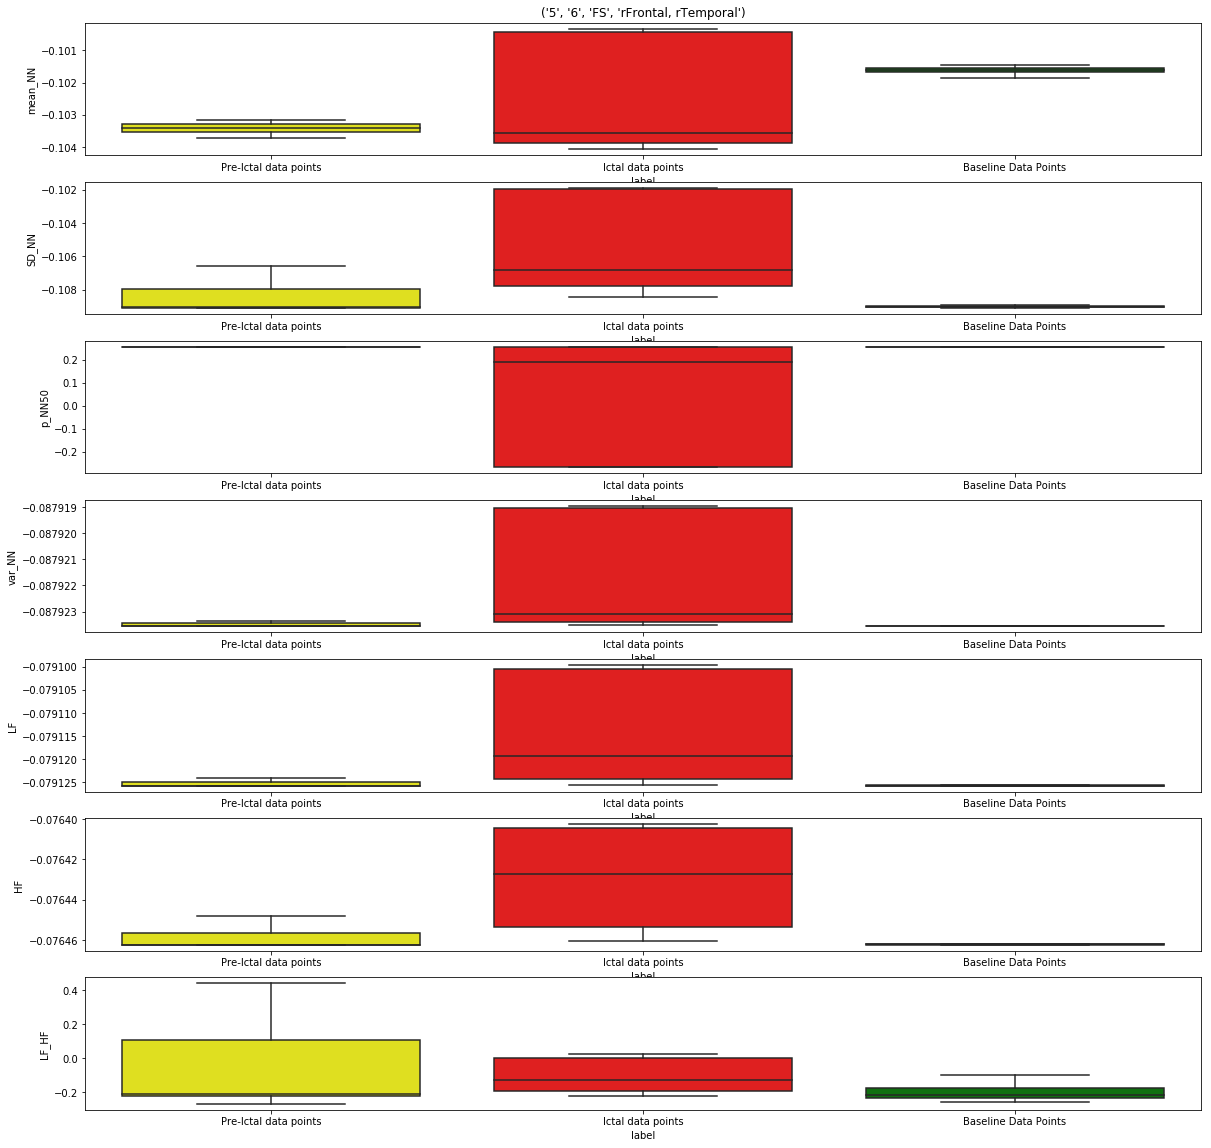

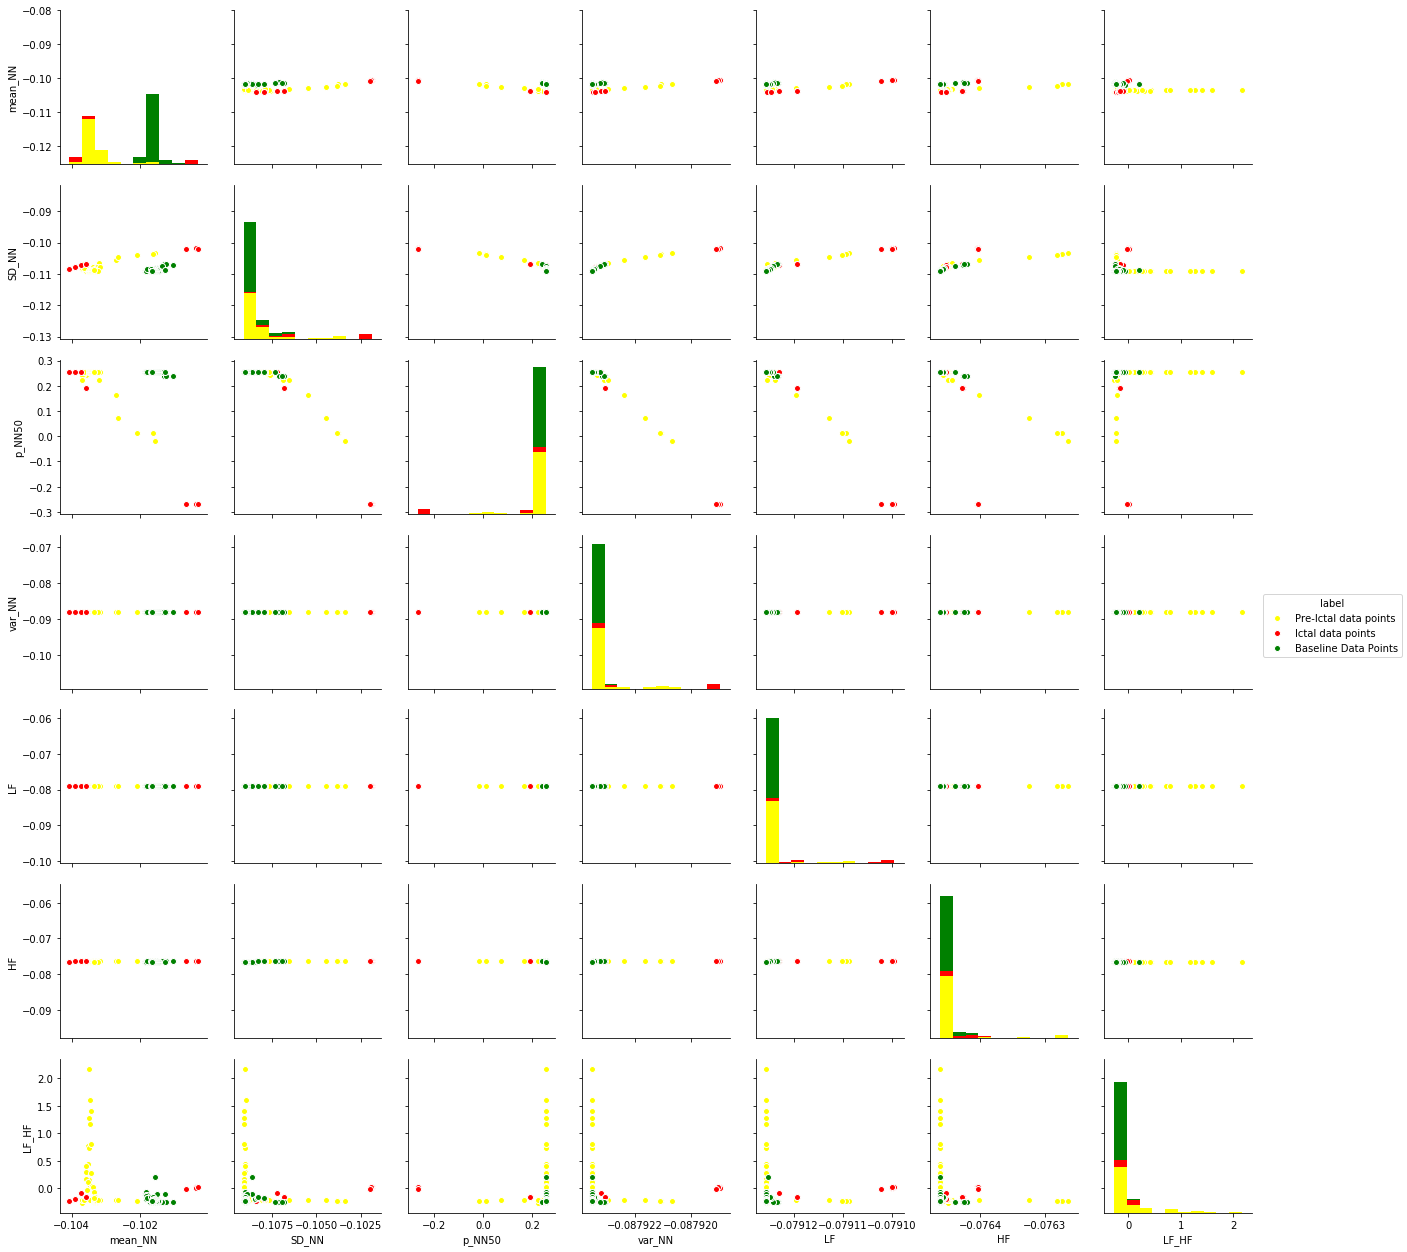

In [12]:

import classification.eda.hist as plt_hist
import classification.eda.andrews as plt_and
import classification.eda.series as plt_ts
import classification.eda.box as plt_box
import classification.eda.scatter as plt_sc
import matplotlib.pyplot as plt


    
if plot_eda_all_new:

    for data_patient_seizure in data_groups_list:

        if flag_hist:
            plt_hist.histogram(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color',
                                     bins=hist_bins,
                                     dist=dist)


        if flag_series:
            plt_ts.time_series_plot(path_to_save, data_patient_seizure[1],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_andrews:
            plt_and.andrews_curves(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_box:
            plt_box.box_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')

        if flag_pair:

            plt_sc.pair_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')
            
else:
    import os
    from IPython.display import Image
    a = [name for name in os.listdir(path_to_save) if name.endswith(".png")]
    for image in a:
        display(Image(filename=path_to_save + image))
    
    

In [13]:
import classification.cross_validation as cv

# ***********************************Learning****************************
# Learn from data_struct using nested cross_validation
# learninig is an optimization and respective test results
# for each partition of the dataset according to cv_out


# prepare data for classification - watch out for memory concerns
X = data[features]
y = data[label]
groups = data[group_id]

learning_results = cv.nested_cross_validation(path_to_save,
                                       X,y, groups,
                                       pipe,
                                       param_grid, scoring,
                                       compute_all_new, cv_out, cv_in,
                                       search_function)
#************************************************************************
groups = data_groups.groups.keys()

for learning_result, group in zip(learning_results, groups):
        learning_result['group'] = group
        
cv_object = learning_results

cv.generate_classification_report(cv_object)



Fitting 6 folds for each of 256 candidates, totalling 1536 fits


/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done 1536 out of 1536 | elapsed:  1.3min finished
classification/cross_validation.py:58: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['param_SVC__C', 'param_SVC__gamma', 'params']]

  for i, (train, test) in enumerate(cv_out)]


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/798952e8-3def-11e8-932f-b06ebfc25cc2/798952e9-3def-11e8-932f-b06ebfc25cc2hp_opt_results__0.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.019542         0.007362            0.500000            0.222222   
1         0.022359         0.008641            0.500000            0.222222   
2         0.019058         0.007140            0.500000            0.222222   
3         0.019795         0.007189            0.500000            0.222222   
4         0.016899         0.006066            0.500000            0.222222   
5         0.012886         0.004671            0.500000            0.222222   
6         0.013023         0.004545            0.500000            0.222222   
7         0.013173         0.004536            0.500000            0.222222   
8         0.013327         0.004548 

[Parallel(n_jobs=1)]: Done 1536 out of 1536 | elapsed:  1.5min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/798952e8-3def-11e8-932f-b06ebfc25cc2/798952e9-3def-11e8-932f-b06ebfc25cc2hp_opt_results__1.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.019210         0.007174            0.502439            0.222938   
1         0.019160         0.007166            0.502439            0.222938   
2         0.019388         0.007381            0.502439            0.222938   
3         0.019317         0.007263            0.502439            0.222938   
4         0.019249         0.007176            0.502439            0.222938   
5         0.019929         0.007203            0.502439            0.222938   
6         0.020114         0.007198            0.502439            0.222938   
7         0.020029         0.007230            0.502439            0.222938   
8         0.020173         0.007335 

[Parallel(n_jobs=1)]: Done 1536 out of 1536 | elapsed:  1.5min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/798952e8-3def-11e8-932f-b06ebfc25cc2/798952e9-3def-11e8-932f-b06ebfc25cc2hp_opt_results__2.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.018673         0.006809            0.502439            0.222938   
1         0.018850         0.006791            0.502439            0.222938   
2         0.019105         0.006792            0.502439            0.222938   
3         0.019575         0.006915            0.502439            0.222938   
4         0.019505         0.006868            0.502439            0.222938   
5         0.019235         0.006863            0.502439            0.222938   
6         0.019379         0.006759            0.502439            0.222938   
7         0.019643         0.006814            0.502439            0.222938   
8         0.020231         0.006870 

[Parallel(n_jobs=1)]: Done 1536 out of 1536 | elapsed:  1.3min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/798952e8-3def-11e8-932f-b06ebfc25cc2/798952e9-3def-11e8-932f-b06ebfc25cc2hp_opt_results__3.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.018789         0.006971            0.502439            0.222938   
1         0.019312         0.006981            0.502439            0.222938   
2         0.019152         0.006878            0.502439            0.222938   
3         0.020141         0.006933            0.502439            0.222938   
4         0.019414         0.006797            0.502439            0.222938   
5         0.019003         0.006789            0.502439            0.222938   
6         0.019347         0.006793            0.502439            0.222938   
7         0.019818         0.006844            0.502439            0.222938   
8         0.020613         0.006887 

[Parallel(n_jobs=1)]: Done 1536 out of 1536 | elapsed:  1.0min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/798952e8-3def-11e8-932f-b06ebfc25cc2/798952e9-3def-11e8-932f-b06ebfc25cc2hp_opt_results__4.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.012810         0.004648            0.502439            0.222938   
1         0.012979         0.004696            0.502439            0.222938   
2         0.013275         0.004741            0.502439            0.222938   
3         0.013462         0.004688            0.502439            0.222938   
4         0.013384         0.004673            0.502439            0.222938   
5         0.013310         0.004702            0.502439            0.222938   
6         0.013227         0.004656            0.502439            0.222938   
7         0.013354         0.004664            0.502439            0.222938   
8         0.013907         0.004681 


Success in saving the dataframe

Success in saving the metadata
SAVEEEEEEEEEEEEEEEEEDDDDDDDDDDDDDDDDDDDDDDDDD
Fitting 6 folds for each of 256 candidates, totalling 1536 fits


[Parallel(n_jobs=1)]: Done 1536 out of 1536 | elapsed:  1.5min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/798952e8-3def-11e8-932f-b06ebfc25cc2/798952e9-3def-11e8-932f-b06ebfc25cc2hp_opt_results__5.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.018814         0.006968            0.502439            0.222938   
1         0.018882         0.006822            0.502439            0.222938   
2         0.019440         0.006852            0.502439            0.222938   
3         0.019957         0.006941            0.502439            0.222938   
4         0.019511         0.006765            0.502439            0.222938   
5         0.019446         0.006715            0.502439            0.222938   
6         0.019771         0.006909            0.502439            0.222938   
7         0.019637         0.006707            0.502439            0.222938   
8         0.019700         0.006683 

[Parallel(n_jobs=1)]: Done 1536 out of 1536 | elapsed:  1.5min finished
/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/798952e8-3def-11e8-932f-b06ebfc25cc2/798952e9-3def-11e8-932f-b06ebfc25cc2hp_opt_results__6.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.019349         0.007156            0.502439            0.222938   
1         0.018984         0.007000            0.502439            0.222938   
2         0.018954         0.006916            0.502439            0.222938   
3         0.019195         0.006862            0.502439            0.222938   
4         0.019312         0.007128            0.502439            0.222938   
5         0.019186         0.006861            0.502439            0.222938   
6         0.019571         0.006833            0.502439            0.222938   
7         0.019751         0.007012            0.502439            0.222938   
8         0.020066         0.006868 

precision  \
Model                                              Best Parameters                      Test Group                              Labels                             
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 0.5, 'SVC__C': 1024}  ('5', '5', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.5041   
                                                                                                                                Ictal data points         0.0000   
                                                                                                                                Pre-Ictal data points     0.0588   
                                                                                                                                avg / total               0.2836   
                                                                                        ('5', '2', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.7121   
                                                                                                                                Ictal data points         0.1633   
                                                                                                                                Pre-Ictal data points     0.0000   
                                                                                                                                avg / total               0.3681   
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 0.25, 'SVC__C': 512}  ('5', '0', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.5339   
                                                                                                                                Ictal data points         0.0000   
                                                                                                                                Pre-Ictal data points     0.5000   
                                                                                                                                avg / total               0.4802   
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 1, 'SVC__C': 1024}    ('5', '6', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.6768   
                                                                                                                                Ictal data points         0.0000   
                                                                                                                                Pre-Ictal data points     0.7297   
                                                                                                                                avg / total               0.6496   
                                                                                        ('5', '4', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.7882   
                                                                                                                                Ictal data points         1.0000   
                                                                                                                                Pre-Ictal data points     0.8542   
                                                                                                                                avg / total               0.8319   
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 0.25, 'SVC__C': 1024} ('5', '1', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.9054   
                                                                                                                                Ictal data points         0.0000   
                                                                                                                                Pre-Ictal data points     0.8871   
                                                   

In [14]:
import seaborn as sns
import itertools

if hyper_param_heat:
    for clf, test in learning_results:
        print clf.best_estimator_
        cv_results = clf.cv_results_
        keys = cv_results.keys()

        for grid in param_grid:
            estimator_params = [key 
                                for key in grid.keys()
                                if 'estimator' in key]
            print estimator_params
            param_bi_comb = itertools.combinations(estimator_params, r=2)

            for bi_comb in param_bi_comb:

                for key in keys:

                    if 'param' not in key and 'rank' not in key:
                        metric = cv_results[key]
                        df = metric.reshape(len([2**i for i in xrange(-5, 11)]), len([2**i for i in xrange(-15, 1)]))

                        #df = pd.DataFrame(df, columns=[str(2**i) for i in xrange(-15, 1)])
                        #df['ix'] = [str(2**i) for i in xrange(-5, 11)]
                        #df.set_index('ix')

                        plt.figure()
                        sns.heatmap(df,
                                    xticklabels=[2**i for i in xrange(-5, 11)],
                                    yticklabels=[2**i for i in xrange(-15, 1)],
                                    cbar_kws={'label': key},
                                   )
                        plt.title(key)
                        plt.xlabel(bi_comb[0])
                        plt.ylabel(bi_comb[1])
                        #plt.savefig(path_to_save + '/' + key)
                        plt.show()
                        
hyper_param_list=False                        
if hyper_param_list:
    for learning_result in learning_results:

        cv_results = learning_result['cv_results']
        keys = list(cv_results.keys())
        print keys
        
        for grid in param_grid:
            params = grid.keys()
            print params
            for param in params:
                
                key_param_variation = keys[keys.index('param_' + param)]
                param_variation = cv_results[key_param_variation]
                
                print param_variation
                stop
                
                

        

In [15]:
from classification.cross_validation import *

In [16]:
report = generate_classification_report(cv_object)
report.to_hdf(path_to_save + 'classification_resport.h5', '/report' )

pd.read_hdf(path_to_save + 'classification_resport.h5', '/report' )

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/io/pytables.py:280: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis0] [items->None]

  f(store)
/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis1_level3] [items->None]

  f = lambda store: store.put(key, value, **kwargs)
/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/io/pytables.py:280: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block0_items] [items->None]

  f(store)


precision  \
Model                                              Best Parameters                      Test Group                              Labels                             
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 0.5, 'SVC__C': 1024}  ('5', '5', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.5041   
                                                                                                                                Ictal data points         0.0000   
                                                                                                                                Pre-Ictal data points     0.0588   
                                                                                                                                avg / total               0.2836   
                                                                                        ('5', '2', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.7121   
                                                                                                                                Ictal data points         0.1633   
                                                                                                                                Pre-Ictal data points     0.0000   
                                                                                                                                avg / total               0.3681   
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 0.25, 'SVC__C': 512}  ('5', '0', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.5339   
                                                                                                                                Ictal data points         0.0000   
                                                                                                                                Pre-Ictal data points     0.5000   
                                                                                                                                avg / total               0.4802   
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 1, 'SVC__C': 1024}    ('5', '6', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.6768   
                                                                                                                                Ictal data points         0.0000   
                                                                                                                                Pre-Ictal data points     0.7297   
                                                                                                                                avg / total               0.6496   
                                                                                        ('5', '4', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.7882   
                                                                                                                                Ictal data points         1.0000   
                                                                                                                                Pre-Ictal data points     0.8542   
                                                                                                                                avg / total               0.8319   
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 0.25, 'SVC__C': 1024} ('5', '1', 'FS', 'rFrontal, rTemporal') Baseline Data Points      0.9054   
                                                                                                                                Ictal data points         0.0000   
                                                                                                                                Pre-Ictal data points     0.8871   
                                                   

In [17]:
string = report.to_latex()
print string.replace('\_', " ")

\begin{tabular}{llllrrrr}
\toprule
                                                                                                                                                                                                                                                                                 &                                      &                                         &                      &  precision &  recall &  f1-score &  support \\
Model & Best Parameters & Test Group & Labels &            &         &           &          \\
\midrule
Pipeline(memory=None,\textbackslashn     steps=[('SVC', SVC(C=1024, cache size=200, class weight=None, coef0=0.0,\textbackslashn  decision function shape='ovr', degree=3, gamma=0.5, kernel='rbf',\textbackslashn  max iter=-1, probability=False, random state=None, shrinking=True,\textbackslashn  tol=0.001, verbose=False))]) & \{'SVC  gamma': 0.5, 'SVC  C': 1024\} & ('5', '5', 'FS', 'rFrontal, rTemporal') & Baseline Data Points &     

In [18]:
import numpy as np
import pandas as pd
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
s = pd.DataFrame(np.random.randn(8, 4), index=arrays)
s


0         1         2         3
bar one -2.726943  0.224905 -0.174122  0.160984
    two  0.578769 -2.346440 -0.731361  0.417437
baz one -0.485260  1.720806  0.164282 -1.334995
    two -0.012853  1.079428 -0.861622 -1.001415
foo one -1.408521  2.053494  0.119430  0.569604
    two  0.472912  0.543595 -0.340676 -2.259718
qux one -0.991295  1.455034 -0.712184 -0.429522
    two  0.680813 -1.389878 -0.861640 -0.982344

In [19]:
print s.to_latex()

\begin{tabular}{llrrrr}
\toprule
    &     &         0 &         1 &         2 &         3 \\
\midrule
bar & one & -2.726943 &  0.224905 & -0.174122 &  0.160984 \\
    & two &  0.578769 & -2.346440 & -0.731361 &  0.417437 \\
baz & one & -0.485260 &  1.720806 &  0.164282 & -1.334995 \\
    & two & -0.012853 &  1.079428 & -0.861622 & -1.001415 \\
foo & one & -1.408521 &  2.053494 &  0.119430 &  0.569604 \\
    & two &  0.472912 &  0.543595 & -0.340676 & -2.259718 \\
qux & one & -0.991295 &  1.455034 & -0.712184 & -0.429522 \\
    & two &  0.680813 & -1.389878 & -0.861640 & -0.982344 \\
\bottomrule
\end{tabular}



In [20]:
del classification_report

In [21]:
best_params

NameError: name 'best_params' is not defined

In [ ]:
learning_results